done

In [1]:
ARCHITECTURE = 'cnn'
#EXPERIMENT_NAME = 'cnn-global-magnitude-unstruct'
ITERATIONS = 10

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
import foolbox as fb
import random
import json
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, carlini_wagner_l2


#tf.compat.v1.enable_eager_execution()
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 3)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [10]:
run_experiment(
    structure='unstructured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

938/938 [==============================] - 3s 3ms/step - loss: 1.5949 - accuracy: 0.8878 - val_loss: 1.5180 - val_accuracy: 0.9495



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5059 - accuracy: 0.9587 - val_loss: 1.4945 - val_accuracy: 0.9693
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4931 - accuracy: 0.9701 - val_loss: 1.4897 - val_accuracy: 0.9730
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4870 - accuracy: 0.9754 - val_loss: 1.4849 - val_accuracy: 0.9774
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4826 - accuracy: 0.9796 - val_loss: 1.4800 - val_accuracy: 0.9821
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4800 - accuracy: 0.9822 - val_loss: 1.4815 - val_accuracy: 0.9805
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9834 - val_loss: 1.4789 - val_accuracy: 0.9832
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:57, 297.66s/it]

current pruning ratio is0.5, current iteration is 0
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4825 - accuracy: 0.9849 - val_loss: 1.4782 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4731 - accuracy: 0.9905 - val_loss: 1.4744 - val_accuracy: 0.9890
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4710 - accuracy: 0.9919 - val_loss: 1.4737 - val_accuracy: 0.9884
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4700 - accuracy: 0.9926 - val_loss: 1.4735 - val_accuracy: 0.9887
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9937 - val_loss: 1.4760 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9940 - val_loss: 1.4736 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] - 


2it [08:55, 279.83s/it]

current pruning ratio is0.75, current iteration is 0
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5099 - accuracy: 0.9690 - val_loss: 1.4864 - val_accuracy: 0.9814
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9847 - val_loss: 1.4811 - val_accuracy: 0.9834
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4776 - accuracy: 0.9876 - val_loss: 1.4782 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4745 - accuracy: 0.9896 - val_loss: 1.4773 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4729 - accuracy: 0.9906 - val_loss: 1.4762 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4718 - accuracy: 0.9915 - val_loss: 1.4762 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] 


3it [13:28, 277.60s/it]

current pruning ratio is0.875, current iteration is 0
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5733 - accuracy: 0.9190 - val_loss: 1.5128 - val_accuracy: 0.9620
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5052 - accuracy: 0.9671 - val_loss: 1.4954 - val_accuracy: 0.9737
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4933 - accuracy: 0.9754 - val_loss: 1.4895 - val_accuracy: 0.9772
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4876 - accuracy: 0.9795 - val_loss: 1.4872 - val_accuracy: 0.9786
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4839 - accuracy: 0.9816 - val_loss: 1.4837 - val_accuracy: 0.9804
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9841 - val_loss: 1.4818 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================] 


4it [18:29, 284.75s/it]

current pruning ratio is0.9375, current iteration is 0
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8550 - accuracy: 0.6197 - val_loss: 1.6477 - val_accuracy: 0.8295
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6369 - accuracy: 0.8356 - val_loss: 1.6240 - val_accuracy: 0.8440
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6187 - accuracy: 0.8493 - val_loss: 1.6106 - val_accuracy: 0.8544
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6061 - accuracy: 0.8604 - val_loss: 1.5527 - val_accuracy: 0.9255
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5320 - accuracy: 0.9408 - val_loss: 1.5215 - val_accuracy: 0.9491
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5191 - accuracy: 0.9507 - val_loss: 1.5155 - val_accuracy: 0.9518
Epoch 7/500
938/938 [==============================]


5it [24:17, 303.52s/it]

current pruning ratio is0.96875, current iteration is 0
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8537 - accuracy: 0.6247 - val_loss: 1.6834 - val_accuracy: 0.7985
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6368 - accuracy: 0.8461 - val_loss: 1.5938 - val_accuracy: 0.8859
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5885 - accuracy: 0.8885 - val_loss: 1.5717 - val_accuracy: 0.9027
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5726 - accuracy: 0.9009 - val_loss: 1.5600 - val_accuracy: 0.9136
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5630 - accuracy: 0.9092 - val_loss: 1.5553 - val_accuracy: 0.9156
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5562 - accuracy: 0.9144 - val_loss: 1.5484 - val_accuracy: 0.9202
Epoch 7/500
938/938 [==============================


6it [31:27, 341.50s/it]

current pruning ratio is0.984375, current iteration is 0
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0565 - accuracy: 0.3868 - val_loss: 2.0015 - val_accuracy: 0.4651
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9821 - accuracy: 0.4866 - val_loss: 1.9341 - val_accuracy: 0.5391
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9392 - accuracy: 0.5307 - val_loss: 1.9169 - val_accuracy: 0.5511
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9281 - accuracy: 0.5389 - val_loss: 1.9102 - val_accuracy: 0.5557
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9215 - accuracy: 0.5431 - val_loss: 1.9060 - val_accuracy: 0.5577
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9163 - accuracy: 0.5474 - val_loss: 1.9027 - val_accuracy: 0.5601
Epoch 7/500
938/938 [=============================


7it [39:03, 334.81s/it]
 10%|█         | 1/10 [39:06<5:52:02, 2346.99s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5893 - accuracy: 0.8962 - val_loss: 1.5141 - val_accuracy: 0.9522



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5035 - accuracy: 0.9609 - val_loss: 1.4951 - val_accuracy: 0.9682
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9727 - val_loss: 1.4867 - val_accuracy: 0.9759
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4851 - accuracy: 0.9773 - val_loss: 1.4829 - val_accuracy: 0.9786
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4813 - accuracy: 0.9809 - val_loss: 1.4893 - val_accuracy: 0.9733
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9829 - val_loss: 1.4824 - val_accuracy: 0.9796
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9855 - val_loss: 1.4781 - val_accuracy: 0.9839
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:48, 288.91s/it]

current pruning ratio is0.5, current iteration is 1
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4820 - accuracy: 0.9846 - val_loss: 1.4770 - val_accuracy: 0.9873
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4726 - accuracy: 0.9910 - val_loss: 1.4741 - val_accuracy: 0.9894
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9931 - val_loss: 1.4744 - val_accuracy: 0.9884
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9942 - val_loss: 1.4748 - val_accuracy: 0.9870
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9945 - val_loss: 1.4751 - val_accuracy: 0.9869
(0.5008296730112249, 30786, 61470)



2it [09:11, 280.93s/it]

current pruning ratio is0.75, current iteration is 1
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5216 - accuracy: 0.9639 - val_loss: 1.4885 - val_accuracy: 0.9802
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4843 - accuracy: 0.9830 - val_loss: 1.4809 - val_accuracy: 0.9852
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4787 - accuracy: 0.9866 - val_loss: 1.4777 - val_accuracy: 0.9868
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4754 - accuracy: 0.9889 - val_loss: 1.4774 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4735 - accuracy: 0.9902 - val_loss: 1.4759 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4720 - accuracy: 0.9916 - val_loss: 1.4745 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] 


3it [13:47, 279.53s/it]

current pruning ratio is0.875, current iteration is 1
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5453 - accuracy: 0.9389 - val_loss: 1.5021 - val_accuracy: 0.9688
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4975 - accuracy: 0.9725 - val_loss: 1.4905 - val_accuracy: 0.9768
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4887 - accuracy: 0.9791 - val_loss: 1.4860 - val_accuracy: 0.9808
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4844 - accuracy: 0.9818 - val_loss: 1.4845 - val_accuracy: 0.9801
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4814 - accuracy: 0.9840 - val_loss: 1.4808 - val_accuracy: 0.9834
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9855 - val_loss: 1.4795 - val_accuracy: 0.9843
Epoch 7/500
938/938 [==============================] 


4it [18:45, 284.97s/it]

current pruning ratio is0.9375, current iteration is 1
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7704 - accuracy: 0.7150 - val_loss: 1.6562 - val_accuracy: 0.8190
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6461 - accuracy: 0.8277 - val_loss: 1.5891 - val_accuracy: 0.8869
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5405 - accuracy: 0.9321 - val_loss: 1.5284 - val_accuracy: 0.9414
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5253 - accuracy: 0.9446 - val_loss: 1.5195 - val_accuracy: 0.9484
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5173 - accuracy: 0.9509 - val_loss: 1.5146 - val_accuracy: 0.9526
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5117 - accuracy: 0.9555 - val_loss: 1.5089 - val_accuracy: 0.9577
Epoch 7/500
938/938 [==============================]


5it [25:00, 312.11s/it]

current pruning ratio is0.96875, current iteration is 1
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8450 - accuracy: 0.6458 - val_loss: 1.6934 - val_accuracy: 0.7916
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6649 - accuracy: 0.8153 - val_loss: 1.6341 - val_accuracy: 0.8399
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6227 - accuracy: 0.8541 - val_loss: 1.6066 - val_accuracy: 0.8684
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5987 - accuracy: 0.8781 - val_loss: 1.5885 - val_accuracy: 0.8836
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5856 - accuracy: 0.8882 - val_loss: 1.5792 - val_accuracy: 0.8913
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5777 - accuracy: 0.8952 - val_loss: 1.5726 - val_accuracy: 0.8966
Epoch 7/500
938/938 [==============================

938/938 [==============================] - 3s 3ms/step - loss: 1.5187 - accuracy: 0.9463 - val_loss: 1.5247 - val_accuracy: 0.9395
Epoch 58/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5183 - accuracy: 0.9467 - val_loss: 1.5212 - val_accuracy: 0.9426
Epoch 59/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5182 - accuracy: 0.9465 - val_loss: 1.5211 - val_accuracy: 0.9430
Epoch 60/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5179 - accuracy: 0.9469 - val_loss: 1.5223 - val_accuracy: 0.9417
Epoch 61/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5177 - accuracy: 0.9470 - val_loss: 1.5212 - val_accuracy: 0.9427
Epoch 62/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5176 - accuracy: 0.9469 - val_loss: 1.5214 - val_accuracy: 0.9429
(0.03162518301610542, 1944, 61470)



6it [32:15, 348.82s/it]

current pruning ratio is0.984375, current iteration is 1
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9895 - accuracy: 0.4790 - val_loss: 1.9007 - val_accuracy: 0.5692
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8914 - accuracy: 0.5809 - val_loss: 1.8677 - val_accuracy: 0.5993
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8686 - accuracy: 0.5985 - val_loss: 1.8519 - val_accuracy: 0.6116
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8565 - accuracy: 0.6083 - val_loss: 1.8427 - val_accuracy: 0.6209
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8488 - accuracy: 0.6148 - val_loss: 1.8371 - val_accuracy: 0.6260
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8432 - accuracy: 0.6198 - val_loss: 1.8334 - val_accuracy: 0.6284
Epoch 7/500
938/938 [=============================


7it [39:04, 334.89s/it]
 20%|██        | 2/10 [1:18:14<5:12:57, 2347.18s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5895 - accuracy: 0.8916 - val_loss: 1.5131 - val_accuracy: 0.9524



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5026 - accuracy: 0.9617 - val_loss: 1.4945 - val_accuracy: 0.9690
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4909 - accuracy: 0.9724 - val_loss: 1.4895 - val_accuracy: 0.9733
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4852 - accuracy: 0.9773 - val_loss: 1.4835 - val_accuracy: 0.9789
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4809 - accuracy: 0.9816 - val_loss: 1.4809 - val_accuracy: 0.9815
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4781 - accuracy: 0.9839 - val_loss: 1.4828 - val_accuracy: 0.9789
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4764 - accuracy: 0.9855 - val_loss: 1.4781 - val_accuracy: 0.9838
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:05, 245.46s/it]

current pruning ratio is0.5, current iteration is 2
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4869 - accuracy: 0.9822 - val_loss: 1.4810 - val_accuracy: 0.9836
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4756 - accuracy: 0.9887 - val_loss: 1.4784 - val_accuracy: 0.9846
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4731 - accuracy: 0.9904 - val_loss: 1.4765 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4715 - accuracy: 0.9915 - val_loss: 1.4762 - val_accuracy: 0.9874
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4707 - accuracy: 0.9920 - val_loss: 1.4749 - val_accuracy: 0.9871
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4695 - accuracy: 0.9929 - val_loss: 1.4755 - val_accuracy: 0.9867
Epoch 7/500
938/938 [==============================] - 


2it [08:09, 245.13s/it]

current pruning ratio is0.75, current iteration is 2
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5170 - accuracy: 0.9627 - val_loss: 1.4874 - val_accuracy: 0.9807
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4843 - accuracy: 0.9833 - val_loss: 1.4813 - val_accuracy: 0.9839
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4788 - accuracy: 0.9866 - val_loss: 1.4796 - val_accuracy: 0.9848
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4758 - accuracy: 0.9886 - val_loss: 1.4783 - val_accuracy: 0.9853
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9901 - val_loss: 1.4778 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4723 - accuracy: 0.9914 - val_loss: 1.4762 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] 


3it [12:37, 252.00s/it]

current pruning ratio is0.875, current iteration is 2
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5842 - accuracy: 0.9090 - val_loss: 1.5121 - val_accuracy: 0.9641
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5047 - accuracy: 0.9670 - val_loss: 1.4972 - val_accuracy: 0.9720
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4938 - accuracy: 0.9743 - val_loss: 1.4892 - val_accuracy: 0.9771
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4882 - accuracy: 0.9781 - val_loss: 1.4865 - val_accuracy: 0.9787
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4848 - accuracy: 0.9808 - val_loss: 1.4837 - val_accuracy: 0.9814
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9826 - val_loss: 1.4827 - val_accuracy: 0.9824
Epoch 7/500
938/938 [==============================] 


4it [17:49, 269.76s/it]

current pruning ratio is0.9375, current iteration is 2
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6631 - accuracy: 0.8267 - val_loss: 1.5479 - val_accuracy: 0.9319
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5396 - accuracy: 0.9361 - val_loss: 1.5253 - val_accuracy: 0.9469
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5229 - accuracy: 0.9489 - val_loss: 1.5135 - val_accuracy: 0.9580
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5138 - accuracy: 0.9554 - val_loss: 1.5103 - val_accuracy: 0.9576
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5077 - accuracy: 0.9606 - val_loss: 1.5034 - val_accuracy: 0.9642
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9637 - val_loss: 1.5006 - val_accuracy: 0.9651
Epoch 7/500
938/938 [==============================]


5it [23:36, 292.98s/it]

current pruning ratio is0.96875, current iteration is 2
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8649 - accuracy: 0.6171 - val_loss: 1.6813 - val_accuracy: 0.8156
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6380 - accuracy: 0.8569 - val_loss: 1.5981 - val_accuracy: 0.8890
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5924 - accuracy: 0.8911 - val_loss: 1.5754 - val_accuracy: 0.9028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5743 - accuracy: 0.9042 - val_loss: 1.5646 - val_accuracy: 0.9102
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5632 - accuracy: 0.9122 - val_loss: 1.5553 - val_accuracy: 0.9169
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5556 - accuracy: 0.9179 - val_loss: 1.5500 - val_accuracy: 0.9224
Epoch 7/500
938/938 [==============================


6it [30:52, 336.10s/it]

current pruning ratio is0.984375, current iteration is 2
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9599 - accuracy: 0.5056 - val_loss: 1.8170 - val_accuracy: 0.6572
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7979 - accuracy: 0.6770 - val_loss: 1.7744 - val_accuracy: 0.6981
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7672 - accuracy: 0.7054 - val_loss: 1.7542 - val_accuracy: 0.7181
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7513 - accuracy: 0.7193 - val_loss: 1.7421 - val_accuracy: 0.7279
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7412 - accuracy: 0.7279 - val_loss: 1.7331 - val_accuracy: 0.7355
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7338 - accuracy: 0.7339 - val_loss: 1.7297 - val_accuracy: 0.7385
Epoch 7/500
938/938 [=============================


7it [38:51, 333.10s/it]
 30%|███       | 3/10 [1:57:09<4:33:24, 2343.46s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5852 - accuracy: 0.9011 - val_loss: 1.5110 - val_accuracy: 0.9537



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5019 - accuracy: 0.9624 - val_loss: 1.4953 - val_accuracy: 0.9672
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4898 - accuracy: 0.9735 - val_loss: 1.4876 - val_accuracy: 0.9753
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4850 - accuracy: 0.9778 - val_loss: 1.4875 - val_accuracy: 0.9742
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4814 - accuracy: 0.9809 - val_loss: 1.4809 - val_accuracy: 0.9808
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4796 - accuracy: 0.9823 - val_loss: 1.4832 - val_accuracy: 0.9786
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4769 - accuracy: 0.9850 - val_loss: 1.4823 - val_accuracy: 0.9801
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:40, 280.37s/it]

current pruning ratio is0.5, current iteration is 3
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4833 - accuracy: 0.9833 - val_loss: 1.4787 - val_accuracy: 0.9842
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9912 - val_loss: 1.4770 - val_accuracy: 0.9856
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9931 - val_loss: 1.4767 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9942 - val_loss: 1.4763 - val_accuracy: 0.9859
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9942 - val_loss: 1.4759 - val_accuracy: 0.9861
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9951 - val_loss: 1.4752 - val_accuracy: 0.9868
Epoch 7/500
938/938 [==============================] - 


2it [08:43, 269.26s/it]

current pruning ratio is0.75, current iteration is 3
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5177 - accuracy: 0.9603 - val_loss: 1.4873 - val_accuracy: 0.9815
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4829 - accuracy: 0.9843 - val_loss: 1.4805 - val_accuracy: 0.9844
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9878 - val_loss: 1.4791 - val_accuracy: 0.9845
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4744 - accuracy: 0.9898 - val_loss: 1.4769 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4727 - accuracy: 0.9910 - val_loss: 1.4775 - val_accuracy: 0.9859
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accuracy: 0.9922 - val_loss: 1.4755 - val_accuracy: 0.9872
Epoch 7/500
938/938 [==============================] 


3it [13:22, 272.25s/it]

current pruning ratio is0.875, current iteration is 3
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5626 - accuracy: 0.9287 - val_loss: 1.5108 - val_accuracy: 0.9632
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - accuracy: 0.9672 - val_loss: 1.4946 - val_accuracy: 0.9743
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4932 - accuracy: 0.9747 - val_loss: 1.4900 - val_accuracy: 0.9754
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4878 - accuracy: 0.9786 - val_loss: 1.4868 - val_accuracy: 0.9781
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4843 - accuracy: 0.9814 - val_loss: 1.4837 - val_accuracy: 0.9799
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9832 - val_loss: 1.4823 - val_accuracy: 0.9819
Epoch 7/500
938/938 [==============================] 


4it [18:38, 285.17s/it]

current pruning ratio is0.9375, current iteration is 3
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7262 - accuracy: 0.7758 - val_loss: 1.5652 - val_accuracy: 0.9183
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5544 - accuracy: 0.9247 - val_loss: 1.5367 - val_accuracy: 0.9372
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5330 - accuracy: 0.9407 - val_loss: 1.5232 - val_accuracy: 0.9478
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5214 - accuracy: 0.9496 - val_loss: 1.5150 - val_accuracy: 0.9539
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5139 - accuracy: 0.9545 - val_loss: 1.5089 - val_accuracy: 0.9592
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5085 - accuracy: 0.9593 - val_loss: 1.5060 - val_accuracy: 0.9605
Epoch 7/500
938/938 [==============================]


5it [24:52, 311.88s/it]

current pruning ratio is0.96875, current iteration is 3
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9645 - accuracy: 0.5130 - val_loss: 1.7907 - val_accuracy: 0.6923
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7457 - accuracy: 0.7346 - val_loss: 1.7121 - val_accuracy: 0.7636
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6414 - accuracy: 0.8384 - val_loss: 1.5930 - val_accuracy: 0.8847
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5898 - accuracy: 0.8865 - val_loss: 1.5775 - val_accuracy: 0.8981
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5770 - accuracy: 0.8977 - val_loss: 1.5682 - val_accuracy: 0.9043
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5687 - accuracy: 0.9042 - val_loss: 1.5612 - val_accuracy: 0.9106
Epoch 7/500
938/938 [==============================

938/938 [==============================] - 3s 3ms/step - loss: 1.5118 - accuracy: 0.9523 - val_loss: 1.5129 - val_accuracy: 0.9503
Epoch 58/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5114 - accuracy: 0.9532 - val_loss: 1.5130 - val_accuracy: 0.9500
Epoch 59/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5110 - accuracy: 0.9537 - val_loss: 1.5123 - val_accuracy: 0.9504
Epoch 60/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5109 - accuracy: 0.9536 - val_loss: 1.5134 - val_accuracy: 0.9505
Epoch 61/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5110 - accuracy: 0.9536 - val_loss: 1.5145 - val_accuracy: 0.9486
Epoch 62/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5104 - accuracy: 0.9540 - val_loss: 1.5126 - val_accuracy: 0.9502
(0.03162518301610542, 1944, 61470)



6it [32:22, 353.33s/it]

current pruning ratio is0.984375, current iteration is 3
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0387 - accuracy: 0.4253 - val_loss: 1.9200 - val_accuracy: 0.5453
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8884 - accuracy: 0.5828 - val_loss: 1.8495 - val_accuracy: 0.6223
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8426 - accuracy: 0.6252 - val_loss: 1.8212 - val_accuracy: 0.6482
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8211 - accuracy: 0.6449 - val_loss: 1.8049 - val_accuracy: 0.6613
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7684 - accuracy: 0.6974 - val_loss: 1.7415 - val_accuracy: 0.7255
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7394 - accuracy: 0.7275 - val_loss: 1.7268 - val_accuracy: 0.7399
Epoch 7/500
938/938 [=============================


7it [39:07, 335.36s/it]
 40%|████      | 4/10 [2:36:19<3:54:33, 2345.59s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5910 - accuracy: 0.8925 - val_loss: 1.5115 - val_accuracy: 0.9535



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9611 - val_loss: 1.4946 - val_accuracy: 0.9681
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4906 - accuracy: 0.9723 - val_loss: 1.4880 - val_accuracy: 0.9746
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9782 - val_loss: 1.4846 - val_accuracy: 0.9779
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4802 - accuracy: 0.9822 - val_loss: 1.4805 - val_accuracy: 0.9820
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9848 - val_loss: 1.4808 - val_accuracy: 0.9804
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4762 - accuracy: 0.9857 - val_loss: 1.4822 - val_accuracy: 0.9798
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:25, 265.95s/it]

current pruning ratio is0.5, current iteration is 4
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4875 - accuracy: 0.9823 - val_loss: 1.4820 - val_accuracy: 0.9825
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4758 - accuracy: 0.9884 - val_loss: 1.4771 - val_accuracy: 0.9864
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9907 - val_loss: 1.4768 - val_accuracy: 0.9857
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4716 - accuracy: 0.9916 - val_loss: 1.4753 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9926 - val_loss: 1.4780 - val_accuracy: 0.9839
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9927 - val_loss: 1.4740 - val_accuracy: 0.9887
Epoch 7/500
938/938 [==============================] - 


2it [08:25, 258.07s/it]

current pruning ratio is0.75, current iteration is 4
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5061 - accuracy: 0.9720 - val_loss: 1.4857 - val_accuracy: 0.9826
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9852 - val_loss: 1.4823 - val_accuracy: 0.9826
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9877 - val_loss: 1.4780 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - accuracy: 0.9894 - val_loss: 1.4783 - val_accuracy: 0.9852
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4728 - accuracy: 0.9910 - val_loss: 1.4776 - val_accuracy: 0.9856
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4718 - accuracy: 0.9917 - val_loss: 1.4768 - val_accuracy: 0.9863
Epoch 7/500
938/938 [==============================] 


3it [12:51, 260.41s/it]

current pruning ratio is0.875, current iteration is 4
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5858 - accuracy: 0.9037 - val_loss: 1.5212 - val_accuracy: 0.9540
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5118 - accuracy: 0.9600 - val_loss: 1.5027 - val_accuracy: 0.9675
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4987 - accuracy: 0.9695 - val_loss: 1.4936 - val_accuracy: 0.9742
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4921 - accuracy: 0.9748 - val_loss: 1.4895 - val_accuracy: 0.9765
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4875 - accuracy: 0.9784 - val_loss: 1.4880 - val_accuracy: 0.9774
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9811 - val_loss: 1.4841 - val_accuracy: 0.9813
Epoch 7/500
938/938 [==============================] 


4it [17:59, 274.62s/it]

current pruning ratio is0.9375, current iteration is 4
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7342 - accuracy: 0.7595 - val_loss: 1.5576 - val_accuracy: 0.9259
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5469 - accuracy: 0.9307 - val_loss: 1.5320 - val_accuracy: 0.9421
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5291 - accuracy: 0.9434 - val_loss: 1.5207 - val_accuracy: 0.9495
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5190 - accuracy: 0.9513 - val_loss: 1.5131 - val_accuracy: 0.9556
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5121 - accuracy: 0.9568 - val_loss: 1.5082 - val_accuracy: 0.9603
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5066 - accuracy: 0.9616 - val_loss: 1.5038 - val_accuracy: 0.9632
Epoch 7/500
938/938 [==============================]


5it [24:09, 303.37s/it]

current pruning ratio is0.96875, current iteration is 4
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8392 - accuracy: 0.6587 - val_loss: 1.6659 - val_accuracy: 0.8323
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6407 - accuracy: 0.8491 - val_loss: 1.6105 - val_accuracy: 0.8743
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6078 - accuracy: 0.8730 - val_loss: 1.5892 - val_accuracy: 0.8899
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5913 - accuracy: 0.8856 - val_loss: 1.5768 - val_accuracy: 0.9010
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5806 - accuracy: 0.8942 - val_loss: 1.5678 - val_accuracy: 0.9089
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5730 - accuracy: 0.9004 - val_loss: 1.5603 - val_accuracy: 0.9148
Epoch 7/500
938/938 [==============================


6it [31:12, 339.13s/it]

current pruning ratio is0.984375, current iteration is 4
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9032 - accuracy: 0.5722 - val_loss: 1.7843 - val_accuracy: 0.7177
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7563 - accuracy: 0.7328 - val_loss: 1.7241 - val_accuracy: 0.7578
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7218 - accuracy: 0.7573 - val_loss: 1.7043 - val_accuracy: 0.7720
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7077 - accuracy: 0.7670 - val_loss: 1.6940 - val_accuracy: 0.7785
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6994 - accuracy: 0.7724 - val_loss: 1.6861 - val_accuracy: 0.7849
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6933 - accuracy: 0.7767 - val_loss: 1.6808 - val_accuracy: 0.7893
Epoch 7/500
938/938 [=============================


7it [38:22, 328.86s/it]
 50%|█████     | 5/10 [3:14:44<3:14:27, 2333.41s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5969 - accuracy: 0.8845 - val_loss: 1.5126 - val_accuracy: 0.9539



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5054 - accuracy: 0.9592 - val_loss: 1.4944 - val_accuracy: 0.9686
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4919 - accuracy: 0.9713 - val_loss: 1.4881 - val_accuracy: 0.9744
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4865 - accuracy: 0.9760 - val_loss: 1.4838 - val_accuracy: 0.9795
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4833 - accuracy: 0.9792 - val_loss: 1.4863 - val_accuracy: 0.9760
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4798 - accuracy: 0.9824 - val_loss: 1.4854 - val_accuracy: 0.9769
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9838 - val_loss: 1.4811 - val_accuracy: 0.9802
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:47, 287.76s/it]

current pruning ratio is0.5, current iteration is 5
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4865 - accuracy: 0.9804 - val_loss: 1.4810 - val_accuracy: 0.9830
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4738 - accuracy: 0.9900 - val_loss: 1.4786 - val_accuracy: 0.9850
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accuracy: 0.9923 - val_loss: 1.4770 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accuracy: 0.9933 - val_loss: 1.4766 - val_accuracy: 0.9858
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9942 - val_loss: 1.4766 - val_accuracy: 0.9858
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9944 - val_loss: 1.4767 - val_accuracy: 0.9853
Epoch 7/500
938/938 [==============================] - 


2it [08:56, 276.02s/it]

current pruning ratio is0.75, current iteration is 5
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5121 - accuracy: 0.9678 - val_loss: 1.4891 - val_accuracy: 0.9788
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4834 - accuracy: 0.9836 - val_loss: 1.4813 - val_accuracy: 0.9837
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9876 - val_loss: 1.4795 - val_accuracy: 0.9852
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4748 - accuracy: 0.9896 - val_loss: 1.4779 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4730 - accuracy: 0.9906 - val_loss: 1.4759 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4716 - accuracy: 0.9919 - val_loss: 1.4758 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] 


3it [13:28, 274.94s/it]

current pruning ratio is0.875, current iteration is 5
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6043 - accuracy: 0.8871 - val_loss: 1.5134 - val_accuracy: 0.9618
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5073 - accuracy: 0.9643 - val_loss: 1.4983 - val_accuracy: 0.9705
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4958 - accuracy: 0.9723 - val_loss: 1.4913 - val_accuracy: 0.9750
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4899 - accuracy: 0.9764 - val_loss: 1.4881 - val_accuracy: 0.9769
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4862 - accuracy: 0.9796 - val_loss: 1.4875 - val_accuracy: 0.9773
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4835 - accuracy: 0.9813 - val_loss: 1.4832 - val_accuracy: 0.9814
Epoch 7/500
938/938 [==============================] 


4it [18:43, 287.00s/it]

current pruning ratio is0.9375, current iteration is 5
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7273 - accuracy: 0.7652 - val_loss: 1.5605 - val_accuracy: 0.9234
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5494 - accuracy: 0.9286 - val_loss: 1.5337 - val_accuracy: 0.9405
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5305 - accuracy: 0.9420 - val_loss: 1.5239 - val_accuracy: 0.9460
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5209 - accuracy: 0.9492 - val_loss: 1.5155 - val_accuracy: 0.9529
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5145 - accuracy: 0.9537 - val_loss: 1.5105 - val_accuracy: 0.9560
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5097 - accuracy: 0.9579 - val_loss: 1.5059 - val_accuracy: 0.9608
Epoch 7/500
938/938 [==============================]


5it [24:53, 311.84s/it]

current pruning ratio is0.96875, current iteration is 5
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9176 - accuracy: 0.5687 - val_loss: 1.7518 - val_accuracy: 0.7360
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7211 - accuracy: 0.7591 - val_loss: 1.7006 - val_accuracy: 0.7754
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6903 - accuracy: 0.7833 - val_loss: 1.6837 - val_accuracy: 0.7861
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6766 - accuracy: 0.7939 - val_loss: 1.6739 - val_accuracy: 0.7944
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6676 - accuracy: 0.8018 - val_loss: 1.6657 - val_accuracy: 0.8019
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6452 - accuracy: 0.8242 - val_loss: 1.5641 - val_accuracy: 0.9094
Epoch 7/500
938/938 [==============================


6it [32:03, 347.19s/it]

current pruning ratio is0.984375, current iteration is 5
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0482 - accuracy: 0.4193 - val_loss: 1.9563 - val_accuracy: 0.5128
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9475 - accuracy: 0.5165 - val_loss: 1.9328 - val_accuracy: 0.5311
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9319 - accuracy: 0.5282 - val_loss: 1.9201 - val_accuracy: 0.5401
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9227 - accuracy: 0.5329 - val_loss: 1.9118 - val_accuracy: 0.5434
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9156 - accuracy: 0.5349 - val_loss: 1.9067 - val_accuracy: 0.5449
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9103 - accuracy: 0.5414 - val_loss: 1.9032 - val_accuracy: 0.5501
Epoch 7/500
938/938 [=============================


7it [40:11, 344.49s/it]
 60%|██████    | 6/10 [3:54:59<2:37:11, 2357.78s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5917 - accuracy: 0.8876 - val_loss: 1.5090 - val_accuracy: 0.9577



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5034 - accuracy: 0.9613 - val_loss: 1.4976 - val_accuracy: 0.9657
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9725 - val_loss: 1.4930 - val_accuracy: 0.9698
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4848 - accuracy: 0.9779 - val_loss: 1.4859 - val_accuracy: 0.9769
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4814 - accuracy: 0.9811 - val_loss: 1.4830 - val_accuracy: 0.9800
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9836 - val_loss: 1.4789 - val_accuracy: 0.9833
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9849 - val_loss: 1.4826 - val_accuracy: 0.9795
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:05, 245.06s/it]

current pruning ratio is0.5, current iteration is 6
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4860 - accuracy: 0.9825 - val_loss: 1.4795 - val_accuracy: 0.9856
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4744 - accuracy: 0.9895 - val_loss: 1.4784 - val_accuracy: 0.9845
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4713 - accuracy: 0.9921 - val_loss: 1.4763 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9926 - val_loss: 1.4759 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9939 - val_loss: 1.4758 - val_accuracy: 0.9865
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9943 - val_loss: 1.4742 - val_accuracy: 0.9880
Epoch 7/500
938/938 [==============================] - 


2it [08:20, 248.15s/it]

current pruning ratio is0.75, current iteration is 6
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5228 - accuracy: 0.9555 - val_loss: 1.4894 - val_accuracy: 0.9785
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4842 - accuracy: 0.9826 - val_loss: 1.4809 - val_accuracy: 0.9845
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4786 - accuracy: 0.9866 - val_loss: 1.4787 - val_accuracy: 0.9853
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4754 - accuracy: 0.9891 - val_loss: 1.4781 - val_accuracy: 0.9849
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4734 - accuracy: 0.9904 - val_loss: 1.4763 - val_accuracy: 0.9869
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4717 - accuracy: 0.9918 - val_loss: 1.4784 - val_accuracy: 0.9840
Epoch 7/500
938/938 [==============================] 


3it [13:12, 261.25s/it]

current pruning ratio is0.875, current iteration is 6
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5744 - accuracy: 0.9175 - val_loss: 1.5135 - val_accuracy: 0.9598
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5068 - accuracy: 0.9649 - val_loss: 1.4995 - val_accuracy: 0.9685
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4951 - accuracy: 0.9733 - val_loss: 1.4930 - val_accuracy: 0.9731
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4893 - accuracy: 0.9773 - val_loss: 1.4876 - val_accuracy: 0.9783
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4854 - accuracy: 0.9803 - val_loss: 1.4855 - val_accuracy: 0.9796
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4827 - accuracy: 0.9823 - val_loss: 1.4859 - val_accuracy: 0.9783
Epoch 7/500
938/938 [==============================] 


4it [18:04, 270.59s/it]

current pruning ratio is0.9375, current iteration is 6
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7280 - accuracy: 0.7584 - val_loss: 1.6335 - val_accuracy: 0.8440
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6245 - accuracy: 0.8492 - val_loss: 1.6116 - val_accuracy: 0.8578
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5426 - accuracy: 0.9344 - val_loss: 1.5215 - val_accuracy: 0.9502
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5196 - accuracy: 0.9529 - val_loss: 1.5130 - val_accuracy: 0.9575
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5122 - accuracy: 0.9573 - val_loss: 1.5086 - val_accuracy: 0.9609
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5070 - accuracy: 0.9614 - val_loss: 1.5034 - val_accuracy: 0.9642
Epoch 7/500
938/938 [==============================]


5it [24:03, 297.06s/it]

current pruning ratio is0.96875, current iteration is 6
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9893 - accuracy: 0.4881 - val_loss: 1.8487 - val_accuracy: 0.6436
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6926 - accuracy: 0.8086 - val_loss: 1.6334 - val_accuracy: 0.8590
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6212 - accuracy: 0.8649 - val_loss: 1.6020 - val_accuracy: 0.8798
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5980 - accuracy: 0.8816 - val_loss: 1.5870 - val_accuracy: 0.8903
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5837 - accuracy: 0.8926 - val_loss: 1.5742 - val_accuracy: 0.9002
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5742 - accuracy: 0.8997 - val_loss: 1.5662 - val_accuracy: 0.9089
Epoch 7/500
938/938 [==============================


6it [31:11, 336.30s/it]

current pruning ratio is0.984375, current iteration is 6
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0018 - accuracy: 0.4578 - val_loss: 1.9062 - val_accuracy: 0.5612
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8499 - accuracy: 0.6178 - val_loss: 1.8218 - val_accuracy: 0.6444
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8126 - accuracy: 0.6525 - val_loss: 1.7977 - val_accuracy: 0.6752
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7917 - accuracy: 0.6824 - val_loss: 1.7806 - val_accuracy: 0.6914
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7773 - accuracy: 0.6947 - val_loss: 1.7687 - val_accuracy: 0.7019
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7667 - accuracy: 0.7032 - val_loss: 1.7593 - val_accuracy: 0.7103
Epoch 7/500
938/938 [=============================


7it [38:29, 329.86s/it]
 70%|███████   | 7/10 [4:33:32<1:57:12, 2344.23s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5915 - accuracy: 0.8901 - val_loss: 1.5143 - val_accuracy: 0.9522



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9612 - val_loss: 1.4956 - val_accuracy: 0.9679
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9721 - val_loss: 1.4876 - val_accuracy: 0.9751
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9779 - val_loss: 1.4857 - val_accuracy: 0.9773
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9804 - val_loss: 1.4825 - val_accuracy: 0.9797
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4783 - accuracy: 0.9838 - val_loss: 1.4820 - val_accuracy: 0.9806
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9851 - val_loss: 1.4796 - val_accuracy: 0.9821
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:33, 273.90s/it]

current pruning ratio is0.5, current iteration is 7
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4872 - accuracy: 0.9817 - val_loss: 1.4784 - val_accuracy: 0.9869
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4743 - accuracy: 0.9901 - val_loss: 1.4773 - val_accuracy: 0.9860
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4717 - accuracy: 0.9918 - val_loss: 1.4743 - val_accuracy: 0.9885
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9921 - val_loss: 1.4769 - val_accuracy: 0.9861
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9934 - val_loss: 1.4775 - val_accuracy: 0.9856
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9937 - val_loss: 1.4744 - val_accuracy: 0.9873
(0.5008296730112249, 30786, 61470)



2it [08:41, 266.12s/it]

current pruning ratio is0.75, current iteration is 7
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5331 - accuracy: 0.9501 - val_loss: 1.4903 - val_accuracy: 0.9796
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4860 - accuracy: 0.9818 - val_loss: 1.4818 - val_accuracy: 0.9839
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9863 - val_loss: 1.4794 - val_accuracy: 0.9851
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4762 - accuracy: 0.9882 - val_loss: 1.4802 - val_accuracy: 0.9834
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4739 - accuracy: 0.9900 - val_loss: 1.4777 - val_accuracy: 0.9855
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4723 - accuracy: 0.9912 - val_loss: 1.4752 - val_accuracy: 0.9872
Epoch 7/500
938/938 [==============================] 


3it [13:01, 264.15s/it]

current pruning ratio is0.875, current iteration is 7
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5730 - accuracy: 0.9155 - val_loss: 1.5095 - val_accuracy: 0.9639
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5021 - accuracy: 0.9695 - val_loss: 1.4943 - val_accuracy: 0.9730
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4917 - accuracy: 0.9761 - val_loss: 1.4905 - val_accuracy: 0.9769
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4866 - accuracy: 0.9797 - val_loss: 1.4867 - val_accuracy: 0.9788
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4832 - accuracy: 0.9822 - val_loss: 1.4838 - val_accuracy: 0.9802
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4804 - accuracy: 0.9848 - val_loss: 1.4833 - val_accuracy: 0.9804
Epoch 7/500
938/938 [==============================] 


4it [17:47, 270.60s/it]

current pruning ratio is0.9375, current iteration is 7
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7161 - accuracy: 0.7711 - val_loss: 1.6301 - val_accuracy: 0.8443
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5593 - accuracy: 0.9183 - val_loss: 1.5303 - val_accuracy: 0.9433
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5260 - accuracy: 0.9463 - val_loss: 1.5177 - val_accuracy: 0.9542
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5155 - accuracy: 0.9541 - val_loss: 1.5125 - val_accuracy: 0.9574
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5090 - accuracy: 0.9594 - val_loss: 1.5054 - val_accuracy: 0.9624
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5039 - accuracy: 0.9637 - val_loss: 1.5017 - val_accuracy: 0.9631
Epoch 7/500
938/938 [==============================]


5it [23:37, 294.62s/it]

current pruning ratio is0.96875, current iteration is 7
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9985 - accuracy: 0.4739 - val_loss: 1.8582 - val_accuracy: 0.6176
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8464 - accuracy: 0.6233 - val_loss: 1.8279 - val_accuracy: 0.6403
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8245 - accuracy: 0.6434 - val_loss: 1.7867 - val_accuracy: 0.6898
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7729 - accuracy: 0.6988 - val_loss: 1.7505 - val_accuracy: 0.7204
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7534 - accuracy: 0.7154 - val_loss: 1.7386 - val_accuracy: 0.7294
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7443 - accuracy: 0.7225 - val_loss: 1.7342 - val_accuracy: 0.7319
Epoch 7/500
938/938 [==============================


6it [30:38, 332.46s/it]

current pruning ratio is0.984375, current iteration is 7
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0364 - accuracy: 0.4484 - val_loss: 1.9757 - val_accuracy: 0.5036
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9648 - accuracy: 0.5090 - val_loss: 1.9498 - val_accuracy: 0.5219
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9158 - accuracy: 0.5586 - val_loss: 1.9015 - val_accuracy: 0.5714
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8867 - accuracy: 0.5832 - val_loss: 1.8805 - val_accuracy: 0.5889
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8702 - accuracy: 0.5972 - val_loss: 1.8666 - val_accuracy: 0.6025
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8593 - accuracy: 0.6070 - val_loss: 1.8577 - val_accuracy: 0.6069
Epoch 7/500
938/938 [=============================


7it [38:40, 331.51s/it]
 80%|████████  | 8/10 [5:12:16<1:17:56, 2338.18s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5935 - accuracy: 0.8914 - val_loss: 1.5142 - val_accuracy: 0.9505



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5048 - accuracy: 0.9600 - val_loss: 1.4987 - val_accuracy: 0.9652
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4926 - accuracy: 0.9707 - val_loss: 1.4926 - val_accuracy: 0.9712
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4866 - accuracy: 0.9761 - val_loss: 1.4864 - val_accuracy: 0.9759
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4817 - accuracy: 0.9807 - val_loss: 1.4837 - val_accuracy: 0.9784
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4798 - accuracy: 0.9825 - val_loss: 1.4805 - val_accuracy: 0.9822
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4775 - accuracy: 0.9845 - val_loss: 1.4807 - val_accuracy: 0.9821
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:29, 269.29s/it]

current pruning ratio is0.5, current iteration is 8
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4832 - accuracy: 0.9850 - val_loss: 1.4804 - val_accuracy: 0.9839
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4740 - accuracy: 0.9898 - val_loss: 1.4759 - val_accuracy: 0.9871
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4714 - accuracy: 0.9915 - val_loss: 1.4749 - val_accuracy: 0.9877
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9923 - val_loss: 1.4753 - val_accuracy: 0.9875
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9934 - val_loss: 1.4745 - val_accuracy: 0.9877
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9937 - val_loss: 1.4741 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 


2it [09:06, 271.73s/it]

current pruning ratio is0.75, current iteration is 8
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5140 - accuracy: 0.9643 - val_loss: 1.4879 - val_accuracy: 0.9808
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4836 - accuracy: 0.9831 - val_loss: 1.4810 - val_accuracy: 0.9835
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9868 - val_loss: 1.4794 - val_accuracy: 0.9836
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4752 - accuracy: 0.9891 - val_loss: 1.4775 - val_accuracy: 0.9857
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4733 - accuracy: 0.9904 - val_loss: 1.4763 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4718 - accuracy: 0.9916 - val_loss: 1.4756 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] 


3it [13:20, 266.27s/it]

current pruning ratio is0.875, current iteration is 8
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5850 - accuracy: 0.9022 - val_loss: 1.5138 - val_accuracy: 0.9603
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5066 - accuracy: 0.9650 - val_loss: 1.4979 - val_accuracy: 0.9713
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4951 - accuracy: 0.9728 - val_loss: 1.4914 - val_accuracy: 0.9751
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4894 - accuracy: 0.9773 - val_loss: 1.4872 - val_accuracy: 0.9792
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4856 - accuracy: 0.9801 - val_loss: 1.4863 - val_accuracy: 0.9791
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4830 - accuracy: 0.9822 - val_loss: 1.4841 - val_accuracy: 0.9804
Epoch 7/500
938/938 [==============================] 


4it [18:16, 275.24s/it]

current pruning ratio is0.9375, current iteration is 8
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6464 - accuracy: 0.8376 - val_loss: 1.5343 - val_accuracy: 0.9383
Epoch 2/500
938/938 [==============================] - 2s 2ms/step - loss: 1.5280 - accuracy: 0.9438 - val_loss: 1.5152 - val_accuracy: 0.9539
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5148 - accuracy: 0.9537 - val_loss: 1.5077 - val_accuracy: 0.9608
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5074 - accuracy: 0.9602 - val_loss: 1.5022 - val_accuracy: 0.9650
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5027 - accuracy: 0.9640 - val_loss: 1.4992 - val_accuracy: 0.9672
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4991 - accuracy: 0.9667 - val_loss: 1.4974 - val_accuracy: 0.9683
Epoch 7/500
938/938 [==============================]


5it [23:40, 289.94s/it]

current pruning ratio is0.96875, current iteration is 8
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8275 - accuracy: 0.6655 - val_loss: 1.6280 - val_accuracy: 0.8663
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6103 - accuracy: 0.8748 - val_loss: 1.5855 - val_accuracy: 0.8928
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5822 - accuracy: 0.8950 - val_loss: 1.5684 - val_accuracy: 0.9062
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5683 - accuracy: 0.9060 - val_loss: 1.5584 - val_accuracy: 0.9150
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5598 - accuracy: 0.9122 - val_loss: 1.5543 - val_accuracy: 0.9168
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5534 - accuracy: 0.9176 - val_loss: 1.5480 - val_accuracy: 0.9213
Epoch 7/500
938/938 [==============================


6it [30:55, 333.40s/it]

current pruning ratio is0.984375, current iteration is 8
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9294 - accuracy: 0.5358 - val_loss: 1.8428 - val_accuracy: 0.6410
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8260 - accuracy: 0.6460 - val_loss: 1.8013 - val_accuracy: 0.6694
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7968 - accuracy: 0.6701 - val_loss: 1.7801 - val_accuracy: 0.7039
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7763 - accuracy: 0.7093 - val_loss: 1.7629 - val_accuracy: 0.7225
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7582 - accuracy: 0.7250 - val_loss: 1.7459 - val_accuracy: 0.7355
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7405 - accuracy: 0.7400 - val_loss: 1.7304 - val_accuracy: 0.7489
Epoch 7/500
938/938 [=============================


7it [38:31, 330.21s/it]
 90%|█████████ | 9/10 [5:50:50<38:51, 2331.11s/it]  

938/938 [==============================] - 2s 3ms/step - loss: 1.5929 - accuracy: 0.8899 - val_loss: 1.5161 - val_accuracy: 0.9510



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5042 - accuracy: 0.9598 - val_loss: 1.4953 - val_accuracy: 0.9684
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4913 - accuracy: 0.9718 - val_loss: 1.4933 - val_accuracy: 0.9695
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4850 - accuracy: 0.9776 - val_loss: 1.4830 - val_accuracy: 0.9790
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4818 - accuracy: 0.9804 - val_loss: 1.4828 - val_accuracy: 0.9794
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4791 - accuracy: 0.9831 - val_loss: 1.4816 - val_accuracy: 0.9803
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4772 - accuracy: 0.9847 - val_loss: 1.4785 - val_accuracy: 0.9829
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:38, 278.02s/it]

current pruning ratio is0.5, current iteration is 9
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4884 - accuracy: 0.9813 - val_loss: 1.4808 - val_accuracy: 0.9839
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4754 - accuracy: 0.9890 - val_loss: 1.4766 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9907 - val_loss: 1.4756 - val_accuracy: 0.9868
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4706 - accuracy: 0.9923 - val_loss: 1.4757 - val_accuracy: 0.9866
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9929 - val_loss: 1.4741 - val_accuracy: 0.9886
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4688 - accuracy: 0.9935 - val_loss: 1.4734 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] - 


2it [08:28, 263.79s/it]

current pruning ratio is0.75, current iteration is 9
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5177 - accuracy: 0.9641 - val_loss: 1.4902 - val_accuracy: 0.9783
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4848 - accuracy: 0.9828 - val_loss: 1.4832 - val_accuracy: 0.9824
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4792 - accuracy: 0.9863 - val_loss: 1.4793 - val_accuracy: 0.9852
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4758 - accuracy: 0.9888 - val_loss: 1.4774 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4735 - accuracy: 0.9904 - val_loss: 1.4761 - val_accuracy: 0.9865
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9911 - val_loss: 1.4767 - val_accuracy: 0.9859
Epoch 7/500
938/938 [==============================] 


3it [12:52, 263.97s/it]

current pruning ratio is0.875, current iteration is 9
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5869 - accuracy: 0.9045 - val_loss: 1.5130 - val_accuracy: 0.9617
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5055 - accuracy: 0.9665 - val_loss: 1.4974 - val_accuracy: 0.9723
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4938 - accuracy: 0.9748 - val_loss: 1.4901 - val_accuracy: 0.9765
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4879 - accuracy: 0.9788 - val_loss: 1.4867 - val_accuracy: 0.9790
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4841 - accuracy: 0.9818 - val_loss: 1.4844 - val_accuracy: 0.9804
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4815 - accuracy: 0.9839 - val_loss: 1.4823 - val_accuracy: 0.9820
Epoch 7/500
938/938 [==============================] 


4it [17:45, 272.66s/it]

current pruning ratio is0.9375, current iteration is 9
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7005 - accuracy: 0.7867 - val_loss: 1.6260 - val_accuracy: 0.8456
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5981 - accuracy: 0.8748 - val_loss: 1.5331 - val_accuracy: 0.9413
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5288 - accuracy: 0.9441 - val_loss: 1.5180 - val_accuracy: 0.9528
Epoch 4/500
938/938 [==============================] - 2s 2ms/step - loss: 1.5169 - accuracy: 0.9538 - val_loss: 1.5126 - val_accuracy: 0.9569
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5102 - accuracy: 0.9586 - val_loss: 1.5051 - val_accuracy: 0.9624
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5053 - accuracy: 0.9628 - val_loss: 1.5024 - val_accuracy: 0.9648
Epoch 7/500
938/938 [==============================]


5it [23:26, 293.04s/it]

current pruning ratio is0.96875, current iteration is 9
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8836 - accuracy: 0.6074 - val_loss: 1.7362 - val_accuracy: 0.7550
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6573 - accuracy: 0.8307 - val_loss: 1.6037 - val_accuracy: 0.8791
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5930 - accuracy: 0.8883 - val_loss: 1.5775 - val_accuracy: 0.9000
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5755 - accuracy: 0.9020 - val_loss: 1.5665 - val_accuracy: 0.9100
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5651 - accuracy: 0.9094 - val_loss: 1.5580 - val_accuracy: 0.9135
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5577 - accuracy: 0.9145 - val_loss: 1.5517 - val_accuracy: 0.9207
Epoch 7/500
938/938 [==============================


6it [30:47, 337.41s/it]

current pruning ratio is0.984375, current iteration is 9
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0983 - accuracy: 0.3622 - val_loss: 2.0454 - val_accuracy: 0.4214
Epoch 2/500
938/938 [==============================] - 2s 2ms/step - loss: 2.0005 - accuracy: 0.4703 - val_loss: 1.9506 - val_accuracy: 0.5201
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8862 - accuracy: 0.5866 - val_loss: 1.8523 - val_accuracy: 0.6178
Epoch 4/500
938/938 [==============================] - 2s 2ms/step - loss: 1.8438 - accuracy: 0.6259 - val_loss: 1.8401 - val_accuracy: 0.6290
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8336 - accuracy: 0.6338 - val_loss: 1.8320 - val_accuracy: 0.6341
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8267 - accuracy: 0.6390 - val_loss: 1.8265 - val_accuracy: 0.6386
Epoch 7/500
938/938 [=============================


7it [37:40, 322.87s/it]
100%|██████████| 10/10 [6:28:33<00:00, 2331.38s/it]


In [11]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

938/938 [==============================] - 2s 3ms/step - loss: 1.5896 - accuracy: 0.8942 - val_loss: 1.5133 - val_accuracy: 0.9523



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5034 - accuracy: 0.9613 - val_loss: 1.4961 - val_accuracy: 0.9678
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4918 - accuracy: 0.9714 - val_loss: 1.4878 - val_accuracy: 0.9750
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4861 - accuracy: 0.9763 - val_loss: 1.4836 - val_accuracy: 0.9787
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4819 - accuracy: 0.9806 - val_loss: 1.4843 - val_accuracy: 0.9776
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4792 - accuracy: 0.9830 - val_loss: 1.4829 - val_accuracy: 0.9790
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4779 - accuracy: 0.9844 - val_loss: 1.4800 - val_accuracy: 0.9815
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:04, 244.80s/it]

current pruning ratio is0.5, current iteration is 0
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9925 - val_loss: 1.4755 - val_accuracy: 0.9857
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accuracy: 0.9940 - val_loss: 1.4754 - val_accuracy: 0.9861
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9946 - val_loss: 1.4763 - val_accuracy: 0.9858
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4671 - accuracy: 0.9945 - val_loss: 1.4751 - val_accuracy: 0.9859
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9952 - val_loss: 1.4746 - val_accuracy: 0.9872
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4660 - accuracy: 0.9955 - val_loss: 1.4754 - val_accuracy: 0.9861
Epoch 7/500
938/938 [==============================] - 


2it [08:09, 244.66s/it]

current pruning ratio is0.75, current iteration is 0
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4723 - accuracy: 0.9917 - val_loss: 1.4763 - val_accuracy: 0.9870
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4673 - accuracy: 0.9954 - val_loss: 1.4748 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4659 - accuracy: 0.9963 - val_loss: 1.4743 - val_accuracy: 0.9884
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4654 - accuracy: 0.9966 - val_loss: 1.4733 - val_accuracy: 0.9893
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9969 - val_loss: 1.4733 - val_accuracy: 0.9883
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4647 - accuracy: 0.9970 - val_loss: 1.4735 - val_accuracy: 0.9884
Epoch 7/500
938/938 [==============================] 


3it [12:10, 243.63s/it]

current pruning ratio is0.875, current iteration is 0
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4973 - accuracy: 0.9743 - val_loss: 1.4829 - val_accuracy: 0.9830
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4768 - accuracy: 0.9885 - val_loss: 1.4782 - val_accuracy: 0.9861
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4730 - accuracy: 0.9915 - val_loss: 1.4762 - val_accuracy: 0.9870
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4708 - accuracy: 0.9930 - val_loss: 1.4752 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4692 - accuracy: 0.9943 - val_loss: 1.4750 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9950 - val_loss: 1.4756 - val_accuracy: 0.9872
Epoch 7/500
938/938 [==============================] 


4it [17:02, 258.19s/it]

current pruning ratio is0.9375, current iteration is 0
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5293 - accuracy: 0.9445 - val_loss: 1.4935 - val_accuracy: 0.9745
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4881 - accuracy: 0.9793 - val_loss: 1.4869 - val_accuracy: 0.9786
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4820 - accuracy: 0.9842 - val_loss: 1.4841 - val_accuracy: 0.9803
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4788 - accuracy: 0.9866 - val_loss: 1.4823 - val_accuracy: 0.9817
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4768 - accuracy: 0.9879 - val_loss: 1.4814 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4754 - accuracy: 0.9891 - val_loss: 1.4804 - val_accuracy: 0.9829
Epoch 7/500
938/938 [==============================]


5it [22:29, 278.69s/it]

current pruning ratio is0.96875, current iteration is 0
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6182 - accuracy: 0.8635 - val_loss: 1.5401 - val_accuracy: 0.9353
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5306 - accuracy: 0.9430 - val_loss: 1.5201 - val_accuracy: 0.9495
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5163 - accuracy: 0.9539 - val_loss: 1.5112 - val_accuracy: 0.9576
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5095 - accuracy: 0.9589 - val_loss: 1.5072 - val_accuracy: 0.9595
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5050 - accuracy: 0.9627 - val_loss: 1.5038 - val_accuracy: 0.9621
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5020 - accuracy: 0.9652 - val_loss: 1.5014 - val_accuracy: 0.9643
Epoch 7/500
938/938 [==============================


6it [28:32, 303.97s/it]

current pruning ratio is0.984375, current iteration is 0
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6447 - accuracy: 0.8265 - val_loss: 1.6153 - val_accuracy: 0.8527
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5791 - accuracy: 0.8924 - val_loss: 1.5387 - val_accuracy: 0.9321
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5352 - accuracy: 0.9360 - val_loss: 1.5292 - val_accuracy: 0.9403
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5286 - accuracy: 0.9409 - val_loss: 1.5252 - val_accuracy: 0.9410
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5247 - accuracy: 0.9437 - val_loss: 1.5221 - val_accuracy: 0.9453
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5219 - accuracy: 0.9460 - val_loss: 1.5193 - val_accuracy: 0.9482
Epoch 7/500
938/938 [=============================


7it [35:04, 300.62s/it]
 10%|█         | 1/10 [35:07<5:16:04, 2107.20s/it]

938/938 [==============================] - 2s 3ms/step - loss: 1.5879 - accuracy: 0.8944 - val_loss: 1.5117 - val_accuracy: 0.9542



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5018 - accuracy: 0.9625 - val_loss: 1.4955 - val_accuracy: 0.9686
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4904 - accuracy: 0.9726 - val_loss: 1.4855 - val_accuracy: 0.9768
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4844 - accuracy: 0.9783 - val_loss: 1.4855 - val_accuracy: 0.9764
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4815 - accuracy: 0.9808 - val_loss: 1.4818 - val_accuracy: 0.9796
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4786 - accuracy: 0.9836 - val_loss: 1.4793 - val_accuracy: 0.9836
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4765 - accuracy: 0.9855 - val_loss: 1.4793 - val_accuracy: 0.9822
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:06, 246.75s/it]

current pruning ratio is0.5, current iteration is 1
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9936 - val_loss: 1.4745 - val_accuracy: 0.9873
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.9951 - val_loss: 1.4771 - val_accuracy: 0.9846
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4661 - accuracy: 0.9956 - val_loss: 1.4746 - val_accuracy: 0.9870
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4657 - accuracy: 0.9959 - val_loss: 1.4742 - val_accuracy: 0.9878
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9960 - val_loss: 1.4737 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9959 - val_loss: 1.4745 - val_accuracy: 0.9869
Epoch 7/500
938/938 [==============================] - 


2it [08:04, 243.97s/it]

current pruning ratio is0.75, current iteration is 1
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4728 - accuracy: 0.9912 - val_loss: 1.4758 - val_accuracy: 0.9875
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4668 - accuracy: 0.9958 - val_loss: 1.4745 - val_accuracy: 0.9882
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4654 - accuracy: 0.9969 - val_loss: 1.4739 - val_accuracy: 0.9884
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4647 - accuracy: 0.9973 - val_loss: 1.4739 - val_accuracy: 0.9877
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4645 - accuracy: 0.9974 - val_loss: 1.4736 - val_accuracy: 0.9885
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4641 - accuracy: 0.9976 - val_loss: 1.4736 - val_accuracy: 0.9876
Epoch 7/500
938/938 [==============================] 


3it [12:22, 248.27s/it]

current pruning ratio is0.875, current iteration is 1
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4875 - accuracy: 0.9786 - val_loss: 1.4782 - val_accuracy: 0.9854
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4724 - accuracy: 0.9913 - val_loss: 1.4760 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4694 - accuracy: 0.9938 - val_loss: 1.4750 - val_accuracy: 0.9875
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4679 - accuracy: 0.9952 - val_loss: 1.4742 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4668 - accuracy: 0.9960 - val_loss: 1.4736 - val_accuracy: 0.9891
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4660 - accuracy: 0.9965 - val_loss: 1.4738 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] 


4it [16:41, 251.56s/it]

current pruning ratio is0.9375, current iteration is 1
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5456 - accuracy: 0.9276 - val_loss: 1.4966 - val_accuracy: 0.9708
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4906 - accuracy: 0.9760 - val_loss: 1.4884 - val_accuracy: 0.9776
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4841 - accuracy: 0.9815 - val_loss: 1.4858 - val_accuracy: 0.9796
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4807 - accuracy: 0.9842 - val_loss: 1.4832 - val_accuracy: 0.9817
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4782 - accuracy: 0.9863 - val_loss: 1.4823 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4767 - accuracy: 0.9875 - val_loss: 1.4806 - val_accuracy: 0.9834
Epoch 7/500
938/938 [==============================]


5it [22:13, 275.71s/it]

current pruning ratio is0.96875, current iteration is 1
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6213 - accuracy: 0.8608 - val_loss: 1.5348 - val_accuracy: 0.9394
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5259 - accuracy: 0.9482 - val_loss: 1.5129 - val_accuracy: 0.9595
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5109 - accuracy: 0.9602 - val_loss: 1.5037 - val_accuracy: 0.9644
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5038 - accuracy: 0.9649 - val_loss: 1.4990 - val_accuracy: 0.9680
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4991 - accuracy: 0.9690 - val_loss: 1.4957 - val_accuracy: 0.9704
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4960 - accuracy: 0.9713 - val_loss: 1.4938 - val_accuracy: 0.9719
Epoch 7/500
938/938 [==============================


6it [28:54, 313.05s/it]

current pruning ratio is0.984375, current iteration is 1
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5749 - accuracy: 0.8969 - val_loss: 1.5313 - val_accuracy: 0.9377
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5290 - accuracy: 0.9402 - val_loss: 1.5212 - val_accuracy: 0.9456
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5211 - accuracy: 0.9471 - val_loss: 1.5174 - val_accuracy: 0.9490
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5173 - accuracy: 0.9499 - val_loss: 1.5155 - val_accuracy: 0.9508
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5149 - accuracy: 0.9522 - val_loss: 1.5115 - val_accuracy: 0.9543
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5133 - accuracy: 0.9533 - val_loss: 1.5101 - val_accuracy: 0.9558
Epoch 7/500
938/938 [=============================


7it [35:14, 302.14s/it]
 20%|██        | 2/10 [1:10:24<4:41:23, 2110.38s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5918 - accuracy: 0.8917 - val_loss: 1.5088 - val_accuracy: 0.9570



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9612 - val_loss: 1.4982 - val_accuracy: 0.9657
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4907 - accuracy: 0.9725 - val_loss: 1.4872 - val_accuracy: 0.9755
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4848 - accuracy: 0.9776 - val_loss: 1.4858 - val_accuracy: 0.9764
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4812 - accuracy: 0.9812 - val_loss: 1.4827 - val_accuracy: 0.9786
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4787 - accuracy: 0.9833 - val_loss: 1.4812 - val_accuracy: 0.9807
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4769 - accuracy: 0.9853 - val_loss: 1.4798 - val_accuracy: 0.9822
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:16, 256.52s/it]

current pruning ratio is0.5, current iteration is 2
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9942 - val_loss: 1.4737 - val_accuracy: 0.9882
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9959 - val_loss: 1.4732 - val_accuracy: 0.9881
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9966 - val_loss: 1.4725 - val_accuracy: 0.9893
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4648 - accuracy: 0.9967 - val_loss: 1.4733 - val_accuracy: 0.9882
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4645 - accuracy: 0.9968 - val_loss: 1.4740 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4641 - accuracy: 0.9973 - val_loss: 1.4734 - val_accuracy: 0.9879
(0.5008296730112249, 30786, 61470)



2it [07:33, 238.77s/it]

current pruning ratio is0.75, current iteration is 2
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4731 - accuracy: 0.9907 - val_loss: 1.4755 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4671 - accuracy: 0.9955 - val_loss: 1.4744 - val_accuracy: 0.9879
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4657 - accuracy: 0.9965 - val_loss: 1.4733 - val_accuracy: 0.9886
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4647 - accuracy: 0.9974 - val_loss: 1.4728 - val_accuracy: 0.9891
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4643 - accuracy: 0.9976 - val_loss: 1.4734 - val_accuracy: 0.9886
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4640 - accuracy: 0.9977 - val_loss: 1.4728 - val_accuracy: 0.9891
Epoch 7/500
938/938 [==============================] 


3it [11:42, 241.67s/it]

current pruning ratio is0.875, current iteration is 2
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4882 - accuracy: 0.9805 - val_loss: 1.4789 - val_accuracy: 0.9853
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4737 - accuracy: 0.9908 - val_loss: 1.4765 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4706 - accuracy: 0.9933 - val_loss: 1.4756 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4689 - accuracy: 0.9945 - val_loss: 1.4753 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4676 - accuracy: 0.9954 - val_loss: 1.4745 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accuracy: 0.9962 - val_loss: 1.4744 - val_accuracy: 0.9883
Epoch 7/500
938/938 [==============================] 


4it [16:28, 254.93s/it]

current pruning ratio is0.9375, current iteration is 2
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5311 - accuracy: 0.9502 - val_loss: 1.5001 - val_accuracy: 0.9704
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4920 - accuracy: 0.9775 - val_loss: 1.4914 - val_accuracy: 0.9753
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4852 - accuracy: 0.9823 - val_loss: 1.4876 - val_accuracy: 0.9778
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4814 - accuracy: 0.9851 - val_loss: 1.4855 - val_accuracy: 0.9792
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4790 - accuracy: 0.9869 - val_loss: 1.4827 - val_accuracy: 0.9818
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4771 - accuracy: 0.9884 - val_loss: 1.4831 - val_accuracy: 0.9803
Epoch 7/500
938/938 [==============================]


5it [21:40, 272.14s/it]

current pruning ratio is0.96875, current iteration is 2
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6130 - accuracy: 0.8742 - val_loss: 1.5302 - val_accuracy: 0.9486
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5229 - accuracy: 0.9527 - val_loss: 1.5135 - val_accuracy: 0.9604
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5108 - accuracy: 0.9607 - val_loss: 1.5069 - val_accuracy: 0.9644
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5046 - accuracy: 0.9652 - val_loss: 1.5026 - val_accuracy: 0.9656
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5007 - accuracy: 0.9675 - val_loss: 1.4986 - val_accuracy: 0.9686
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4981 - accuracy: 0.9693 - val_loss: 1.4974 - val_accuracy: 0.9699
Epoch 7/500
938/938 [==============================


6it [27:29, 295.15s/it]

current pruning ratio is0.984375, current iteration is 2
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6127 - accuracy: 0.8623 - val_loss: 1.5530 - val_accuracy: 0.9184
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5448 - accuracy: 0.9253 - val_loss: 1.5366 - val_accuracy: 0.9317
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5348 - accuracy: 0.9339 - val_loss: 1.5295 - val_accuracy: 0.9391
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5296 - accuracy: 0.9379 - val_loss: 1.5253 - val_accuracy: 0.9412
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5262 - accuracy: 0.9408 - val_loss: 1.5226 - val_accuracy: 0.9438
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5239 - accuracy: 0.9434 - val_loss: 1.5214 - val_accuracy: 0.9451
Epoch 7/500
938/938 [=============================


7it [34:04, 292.12s/it]
 30%|███       | 3/10 [1:44:32<4:04:00, 2091.57s/it]

938/938 [==============================] - 2s 3ms/step - loss: 1.5939 - accuracy: 0.8874 - val_loss: 1.5174 - val_accuracy: 0.9490



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5038 - accuracy: 0.9609 - val_loss: 1.4953 - val_accuracy: 0.9679
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4923 - accuracy: 0.9709 - val_loss: 1.4924 - val_accuracy: 0.9690
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4861 - accuracy: 0.9765 - val_loss: 1.4841 - val_accuracy: 0.9786
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4823 - accuracy: 0.9801 - val_loss: 1.4841 - val_accuracy: 0.9773
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4798 - accuracy: 0.9825 - val_loss: 1.4819 - val_accuracy: 0.9806
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4781 - accuracy: 0.9840 - val_loss: 1.4806 - val_accuracy: 0.9807
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:06, 246.20s/it]

current pruning ratio is0.5, current iteration is 3
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9934 - val_loss: 1.4747 - val_accuracy: 0.9870
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4668 - accuracy: 0.9949 - val_loss: 1.4734 - val_accuracy: 0.9886
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4662 - accuracy: 0.9955 - val_loss: 1.4745 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4659 - accuracy: 0.9958 - val_loss: 1.4744 - val_accuracy: 0.9873
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9962 - val_loss: 1.4741 - val_accuracy: 0.9871
(0.5008296730112249, 30786, 61470)



2it [07:56, 241.33s/it]

current pruning ratio is0.75, current iteration is 3
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4743 - accuracy: 0.9901 - val_loss: 1.4757 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accuracy: 0.9951 - val_loss: 1.4743 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9961 - val_loss: 1.4740 - val_accuracy: 0.9883
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4654 - accuracy: 0.9966 - val_loss: 1.4734 - val_accuracy: 0.9891
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9969 - val_loss: 1.4732 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4647 - accuracy: 0.9972 - val_loss: 1.4730 - val_accuracy: 0.9886
Epoch 7/500
938/938 [==============================] 


3it [12:15, 246.66s/it]

current pruning ratio is0.875, current iteration is 3
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9824 - val_loss: 1.4792 - val_accuracy: 0.9848
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4717 - accuracy: 0.9925 - val_loss: 1.4762 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9946 - val_loss: 1.4755 - val_accuracy: 0.9874
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.9956 - val_loss: 1.4746 - val_accuracy: 0.9884
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9963 - val_loss: 1.4739 - val_accuracy: 0.9881
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9969 - val_loss: 1.4740 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] 


4it [16:16, 245.09s/it]

current pruning ratio is0.9375, current iteration is 3
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5410 - accuracy: 0.9349 - val_loss: 1.4987 - val_accuracy: 0.9698
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4933 - accuracy: 0.9747 - val_loss: 1.4902 - val_accuracy: 0.9769
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4861 - accuracy: 0.9804 - val_loss: 1.4870 - val_accuracy: 0.9775
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4821 - accuracy: 0.9841 - val_loss: 1.4838 - val_accuracy: 0.9800
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4796 - accuracy: 0.9857 - val_loss: 1.4828 - val_accuracy: 0.9813
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4778 - accuracy: 0.9869 - val_loss: 1.4819 - val_accuracy: 0.9814
Epoch 7/500
938/938 [==============================]


5it [21:24, 263.78s/it]

current pruning ratio is0.96875, current iteration is 3
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6122 - accuracy: 0.8657 - val_loss: 1.5281 - val_accuracy: 0.9463
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5190 - accuracy: 0.9526 - val_loss: 1.5109 - val_accuracy: 0.9584
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5074 - accuracy: 0.9615 - val_loss: 1.5046 - val_accuracy: 0.9632
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5017 - accuracy: 0.9660 - val_loss: 1.4998 - val_accuracy: 0.9677
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4979 - accuracy: 0.9696 - val_loss: 1.4985 - val_accuracy: 0.9677
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4953 - accuracy: 0.9715 - val_loss: 1.4970 - val_accuracy: 0.9690
Epoch 7/500
938/938 [==============================


6it [27:21, 291.90s/it]

current pruning ratio is0.984375, current iteration is 3
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5572 - accuracy: 0.9177 - val_loss: 1.5372 - val_accuracy: 0.9345
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5307 - accuracy: 0.9405 - val_loss: 1.5280 - val_accuracy: 0.9408
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5238 - accuracy: 0.9456 - val_loss: 1.5232 - val_accuracy: 0.9450
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5196 - accuracy: 0.9495 - val_loss: 1.5212 - val_accuracy: 0.9463
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5171 - accuracy: 0.9507 - val_loss: 1.5185 - val_accuracy: 0.9481
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5150 - accuracy: 0.9527 - val_loss: 1.5161 - val_accuracy: 0.9501
Epoch 7/500
938/938 [=============================


7it [33:21, 285.95s/it]
 40%|████      | 4/10 [2:17:57<3:26:32, 2065.44s/it]

938/938 [==============================] - 2s 3ms/step - loss: 1.5893 - accuracy: 0.8936 - val_loss: 1.5097 - val_accuracy: 0.9556



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5025 - accuracy: 0.9615 - val_loss: 1.4915 - val_accuracy: 0.9713
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4904 - accuracy: 0.9726 - val_loss: 1.4855 - val_accuracy: 0.9770
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4845 - accuracy: 0.9780 - val_loss: 1.4831 - val_accuracy: 0.9795
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4817 - accuracy: 0.9806 - val_loss: 1.4817 - val_accuracy: 0.9797
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4790 - accuracy: 0.9832 - val_loss: 1.4794 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4773 - accuracy: 0.9848 - val_loss: 1.4789 - val_accuracy: 0.9823
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:43, 283.14s/it]

current pruning ratio is0.5, current iteration is 4
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.9951 - val_loss: 1.4725 - val_accuracy: 0.9890
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9964 - val_loss: 1.4727 - val_accuracy: 0.9885
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4648 - accuracy: 0.9967 - val_loss: 1.4734 - val_accuracy: 0.9880
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4732 - val_accuracy: 0.9877
(0.5008296730112249, 30786, 61470)



2it [08:04, 258.67s/it]

current pruning ratio is0.75, current iteration is 4
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4742 - accuracy: 0.9894 - val_loss: 1.4748 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.9952 - val_loss: 1.4740 - val_accuracy: 0.9882
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4657 - accuracy: 0.9966 - val_loss: 1.4740 - val_accuracy: 0.9881
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9970 - val_loss: 1.4737 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4646 - accuracy: 0.9971 - val_loss: 1.4730 - val_accuracy: 0.9889
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4642 - accuracy: 0.9974 - val_loss: 1.4732 - val_accuracy: 0.9879
Epoch 7/500
938/938 [==============================] 


3it [11:46, 247.66s/it]

current pruning ratio is0.875, current iteration is 4
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4877 - accuracy: 0.9797 - val_loss: 1.4810 - val_accuracy: 0.9827
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4730 - accuracy: 0.9914 - val_loss: 1.4783 - val_accuracy: 0.9856
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4702 - accuracy: 0.9934 - val_loss: 1.4767 - val_accuracy: 0.9865
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9947 - val_loss: 1.4759 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4673 - accuracy: 0.9955 - val_loss: 1.4763 - val_accuracy: 0.9862
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4666 - accuracy: 0.9959 - val_loss: 1.4757 - val_accuracy: 0.9863
Epoch 7/500
938/938 [==============================] 


4it [16:10, 252.49s/it]

current pruning ratio is0.9375, current iteration is 4
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5271 - accuracy: 0.9431 - val_loss: 1.4982 - val_accuracy: 0.9676
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4902 - accuracy: 0.9758 - val_loss: 1.4902 - val_accuracy: 0.9746
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4837 - accuracy: 0.9815 - val_loss: 1.4877 - val_accuracy: 0.9760
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4803 - accuracy: 0.9846 - val_loss: 1.4853 - val_accuracy: 0.9782
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4780 - accuracy: 0.9865 - val_loss: 1.4845 - val_accuracy: 0.9785
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4762 - accuracy: 0.9883 - val_loss: 1.4834 - val_accuracy: 0.9789
Epoch 7/500
938/938 [==============================]


5it [21:25, 271.27s/it]

current pruning ratio is0.96875, current iteration is 4
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6321 - accuracy: 0.8454 - val_loss: 1.5401 - val_accuracy: 0.9320
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5305 - accuracy: 0.9413 - val_loss: 1.5216 - val_accuracy: 0.9471
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5183 - accuracy: 0.9510 - val_loss: 1.5141 - val_accuracy: 0.9545
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5117 - accuracy: 0.9564 - val_loss: 1.5097 - val_accuracy: 0.9570
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5072 - accuracy: 0.9605 - val_loss: 1.5065 - val_accuracy: 0.9592
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5039 - accuracy: 0.9631 - val_loss: 1.5044 - val_accuracy: 0.9607
Epoch 7/500
938/938 [==============================


6it [27:01, 290.74s/it]

current pruning ratio is0.984375, current iteration is 4
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5696 - accuracy: 0.9078 - val_loss: 1.5416 - val_accuracy: 0.9292
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5351 - accuracy: 0.9372 - val_loss: 1.5305 - val_accuracy: 0.9405
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5265 - accuracy: 0.9440 - val_loss: 1.5237 - val_accuracy: 0.9466
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5215 - accuracy: 0.9477 - val_loss: 1.5208 - val_accuracy: 0.9491
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5184 - accuracy: 0.9502 - val_loss: 1.5170 - val_accuracy: 0.9511
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5162 - accuracy: 0.9517 - val_loss: 1.5151 - val_accuracy: 0.9526
Epoch 7/500
938/938 [=============================


7it [33:05, 283.62s/it]
 50%|█████     | 5/10 [2:51:05<2:50:11, 2042.25s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5965 - accuracy: 0.8829 - val_loss: 1.5104 - val_accuracy: 0.9561



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5010 - accuracy: 0.9638 - val_loss: 1.4930 - val_accuracy: 0.9706
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4899 - accuracy: 0.9733 - val_loss: 1.4890 - val_accuracy: 0.9737
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4845 - accuracy: 0.9782 - val_loss: 1.4835 - val_accuracy: 0.9790
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4817 - accuracy: 0.9805 - val_loss: 1.4823 - val_accuracy: 0.9798
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4784 - accuracy: 0.9837 - val_loss: 1.4806 - val_accuracy: 0.9805
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4759 - accuracy: 0.9861 - val_loss: 1.4797 - val_accuracy: 0.9824
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:33, 273.12s/it]

current pruning ratio is0.5, current iteration is 5
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9947 - val_loss: 1.4735 - val_accuracy: 0.9882
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4654 - accuracy: 0.9961 - val_loss: 1.4731 - val_accuracy: 0.9886
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4653 - accuracy: 0.9962 - val_loss: 1.4740 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9966 - val_loss: 1.4734 - val_accuracy: 0.9878
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4645 - accuracy: 0.9969 - val_loss: 1.4733 - val_accuracy: 0.9882
(0.5008296730112249, 30786, 61470)



2it [08:18, 258.74s/it]

current pruning ratio is0.75, current iteration is 5
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4738 - accuracy: 0.9903 - val_loss: 1.4762 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.9954 - val_loss: 1.4743 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4658 - accuracy: 0.9964 - val_loss: 1.4740 - val_accuracy: 0.9877
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4651 - accuracy: 0.9970 - val_loss: 1.4744 - val_accuracy: 0.9877
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4647 - accuracy: 0.9971 - val_loss: 1.4738 - val_accuracy: 0.9883
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4644 - accuracy: 0.9973 - val_loss: 1.4740 - val_accuracy: 0.9879
Epoch 7/500
938/938 [==============================] 


3it [12:31, 257.04s/it]

current pruning ratio is0.875, current iteration is 5
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4939 - accuracy: 0.9729 - val_loss: 1.4794 - val_accuracy: 0.9846
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9916 - val_loss: 1.4765 - val_accuracy: 0.9869
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4694 - accuracy: 0.9940 - val_loss: 1.4760 - val_accuracy: 0.9867
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accuracy: 0.9953 - val_loss: 1.4753 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4668 - accuracy: 0.9960 - val_loss: 1.4742 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4661 - accuracy: 0.9966 - val_loss: 1.4741 - val_accuracy: 0.9883
Epoch 7/500
938/938 [==============================] 


4it [16:55, 259.29s/it]

current pruning ratio is0.9375, current iteration is 5
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5341 - accuracy: 0.9407 - val_loss: 1.5017 - val_accuracy: 0.9689
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4949 - accuracy: 0.9734 - val_loss: 1.4922 - val_accuracy: 0.9744
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4875 - accuracy: 0.9791 - val_loss: 1.4885 - val_accuracy: 0.9767
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4836 - accuracy: 0.9822 - val_loss: 1.4857 - val_accuracy: 0.9797
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4810 - accuracy: 0.9841 - val_loss: 1.4848 - val_accuracy: 0.9801
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4791 - accuracy: 0.9857 - val_loss: 1.4833 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================]


5it [21:50, 269.77s/it]

current pruning ratio is0.96875, current iteration is 5
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6416 - accuracy: 0.8378 - val_loss: 1.5429 - val_accuracy: 0.9360
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5331 - accuracy: 0.9415 - val_loss: 1.5187 - val_accuracy: 0.9520
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5178 - accuracy: 0.9531 - val_loss: 1.5098 - val_accuracy: 0.9596
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5099 - accuracy: 0.9593 - val_loss: 1.5047 - val_accuracy: 0.9629
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5054 - accuracy: 0.9624 - val_loss: 1.5021 - val_accuracy: 0.9647
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5020 - accuracy: 0.9653 - val_loss: 1.4991 - val_accuracy: 0.9668
Epoch 7/500
938/938 [==============================


6it [27:56, 298.62s/it]

current pruning ratio is0.984375, current iteration is 5
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5903 - accuracy: 0.8900 - val_loss: 1.5510 - val_accuracy: 0.9245
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5480 - accuracy: 0.9252 - val_loss: 1.5399 - val_accuracy: 0.9328
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5396 - accuracy: 0.9316 - val_loss: 1.5342 - val_accuracy: 0.9360
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5346 - accuracy: 0.9360 - val_loss: 1.5298 - val_accuracy: 0.9397
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5310 - accuracy: 0.9385 - val_loss: 1.5285 - val_accuracy: 0.9397
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5286 - accuracy: 0.9406 - val_loss: 1.5246 - val_accuracy: 0.9440
Epoch 7/500
938/938 [=============================


7it [34:31, 295.88s/it]
 60%|██████    | 6/10 [3:25:39<2:16:47, 2051.78s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5968 - accuracy: 0.8831 - val_loss: 1.5119 - val_accuracy: 0.9539



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5049 - accuracy: 0.9597 - val_loss: 1.4979 - val_accuracy: 0.9652
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4923 - accuracy: 0.9711 - val_loss: 1.4920 - val_accuracy: 0.9708
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4865 - accuracy: 0.9761 - val_loss: 1.4861 - val_accuracy: 0.9764
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4818 - accuracy: 0.9806 - val_loss: 1.4838 - val_accuracy: 0.9781
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4794 - accuracy: 0.9827 - val_loss: 1.4806 - val_accuracy: 0.9815
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4768 - accuracy: 0.9852 - val_loss: 1.4787 - val_accuracy: 0.9833
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [03:45, 225.86s/it]

current pruning ratio is0.5, current iteration is 6
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4714 - accuracy: 0.9907 - val_loss: 1.4760 - val_accuracy: 0.9860
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4696 - accuracy: 0.9922 - val_loss: 1.4746 - val_accuracy: 0.9869
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4685 - accuracy: 0.9932 - val_loss: 1.4743 - val_accuracy: 0.9880
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4681 - accuracy: 0.9937 - val_loss: 1.4746 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4675 - accuracy: 0.9943 - val_loss: 1.4742 - val_accuracy: 0.9870
Epoch 6/500
938/938 [==============================] - 2s 2ms/step - loss: 1.4673 - accuracy: 0.9944 - val_loss: 1.4742 - val_accuracy: 0.9868
Epoch 7/500
938/938 [==============================] - 


2it [07:46, 230.31s/it]

current pruning ratio is0.75, current iteration is 6
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4732 - accuracy: 0.9911 - val_loss: 1.4760 - val_accuracy: 0.9860
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4673 - accuracy: 0.9956 - val_loss: 1.4749 - val_accuracy: 0.9869
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4659 - accuracy: 0.9964 - val_loss: 1.4746 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9967 - val_loss: 1.4743 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9969 - val_loss: 1.4740 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9971 - val_loss: 1.4737 - val_accuracy: 0.9886
Epoch 7/500
938/938 [==============================] 


3it [11:46, 233.11s/it]

current pruning ratio is0.875, current iteration is 6
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4861 - accuracy: 0.9823 - val_loss: 1.4805 - val_accuracy: 0.9835
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4731 - accuracy: 0.9910 - val_loss: 1.4776 - val_accuracy: 0.9847
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4702 - accuracy: 0.9934 - val_loss: 1.4764 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.9948 - val_loss: 1.4756 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.9957 - val_loss: 1.4749 - val_accuracy: 0.9877
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4666 - accuracy: 0.9961 - val_loss: 1.4753 - val_accuracy: 0.9865
Epoch 7/500
938/938 [==============================] 


4it [16:08, 241.82s/it]

current pruning ratio is0.9375, current iteration is 6
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5229 - accuracy: 0.9529 - val_loss: 1.4969 - val_accuracy: 0.9710
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4903 - accuracy: 0.9779 - val_loss: 1.4891 - val_accuracy: 0.9771
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4841 - accuracy: 0.9822 - val_loss: 1.4861 - val_accuracy: 0.9782
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4807 - accuracy: 0.9855 - val_loss: 1.4842 - val_accuracy: 0.9810
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4786 - accuracy: 0.9865 - val_loss: 1.4823 - val_accuracy: 0.9808
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4770 - accuracy: 0.9875 - val_loss: 1.4816 - val_accuracy: 0.9823
Epoch 7/500
938/938 [==============================]


5it [21:23, 263.93s/it]

current pruning ratio is0.96875, current iteration is 6
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6064 - accuracy: 0.8763 - val_loss: 1.5336 - val_accuracy: 0.9426
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5243 - accuracy: 0.9500 - val_loss: 1.5140 - val_accuracy: 0.9577
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5112 - accuracy: 0.9595 - val_loss: 1.5080 - val_accuracy: 0.9623
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5047 - accuracy: 0.9646 - val_loss: 1.5031 - val_accuracy: 0.9650
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5006 - accuracy: 0.9675 - val_loss: 1.5004 - val_accuracy: 0.9669
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4977 - accuracy: 0.9691 - val_loss: 1.4993 - val_accuracy: 0.9667
Epoch 7/500
938/938 [==============================


6it [27:07, 287.97s/it]

current pruning ratio is0.984375, current iteration is 6
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5931 - accuracy: 0.8847 - val_loss: 1.5595 - val_accuracy: 0.9165
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5503 - accuracy: 0.9249 - val_loss: 1.5461 - val_accuracy: 0.9264
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5408 - accuracy: 0.9320 - val_loss: 1.5397 - val_accuracy: 0.9322
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5353 - accuracy: 0.9363 - val_loss: 1.5338 - val_accuracy: 0.9375
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5318 - accuracy: 0.9385 - val_loss: 1.5316 - val_accuracy: 0.9378
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5289 - accuracy: 0.9407 - val_loss: 1.5279 - val_accuracy: 0.9408
Epoch 7/500
938/938 [=============================


7it [33:20, 285.80s/it]
 70%|███████   | 7/10 [3:59:02<1:41:51, 2037.30s/it]

938/938 [==============================] - 2s 3ms/step - loss: 1.5971 - accuracy: 0.8827 - val_loss: 1.5193 - val_accuracy: 0.9464



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5059 - accuracy: 0.9588 - val_loss: 1.4990 - val_accuracy: 0.9650
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4926 - accuracy: 0.9709 - val_loss: 1.4906 - val_accuracy: 0.9719
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4864 - accuracy: 0.9763 - val_loss: 1.4856 - val_accuracy: 0.9770
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4820 - accuracy: 0.9805 - val_loss: 1.4819 - val_accuracy: 0.9808
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4793 - accuracy: 0.9831 - val_loss: 1.4811 - val_accuracy: 0.9803
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4774 - accuracy: 0.9848 - val_loss: 1.4808 - val_accuracy: 0.9805
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:14, 254.05s/it]

current pruning ratio is0.5, current iteration is 7
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9931 - val_loss: 1.4753 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.9945 - val_loss: 1.4743 - val_accuracy: 0.9871
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9952 - val_loss: 1.4752 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.9951 - val_loss: 1.4746 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4657 - accuracy: 0.9959 - val_loss: 1.4738 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9959 - val_loss: 1.4751 - val_accuracy: 0.9860
Epoch 7/500
938/938 [==============================] - 


2it [08:14, 250.04s/it]

current pruning ratio is0.75, current iteration is 7
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4716 - accuracy: 0.9917 - val_loss: 1.4755 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4662 - accuracy: 0.9961 - val_loss: 1.4747 - val_accuracy: 0.9870
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9970 - val_loss: 1.4738 - val_accuracy: 0.9880
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9974 - val_loss: 1.4742 - val_accuracy: 0.9873
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4640 - accuracy: 0.9976 - val_loss: 1.4734 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4640 - accuracy: 0.9977 - val_loss: 1.4733 - val_accuracy: 0.9887
Epoch 7/500
938/938 [==============================] 


3it [12:10, 245.86s/it]

current pruning ratio is0.875, current iteration is 7
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4867 - accuracy: 0.9798 - val_loss: 1.4820 - val_accuracy: 0.9817
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4724 - accuracy: 0.9916 - val_loss: 1.4782 - val_accuracy: 0.9854
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4692 - accuracy: 0.9942 - val_loss: 1.4774 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4676 - accuracy: 0.9957 - val_loss: 1.4764 - val_accuracy: 0.9857
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.9964 - val_loss: 1.4755 - val_accuracy: 0.9871
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4658 - accuracy: 0.9968 - val_loss: 1.4752 - val_accuracy: 0.9873
Epoch 7/500
938/938 [==============================] 


4it [16:44, 254.31s/it]

current pruning ratio is0.9375, current iteration is 7
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5397 - accuracy: 0.9316 - val_loss: 1.4993 - val_accuracy: 0.9672
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4918 - accuracy: 0.9750 - val_loss: 1.4908 - val_accuracy: 0.9747
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4849 - accuracy: 0.9811 - val_loss: 1.4868 - val_accuracy: 0.9775
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4813 - accuracy: 0.9841 - val_loss: 1.4856 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4790 - accuracy: 0.9858 - val_loss: 1.4832 - val_accuracy: 0.9809
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4774 - accuracy: 0.9868 - val_loss: 1.4822 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================]


5it [21:54, 270.80s/it]

current pruning ratio is0.96875, current iteration is 7
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6602 - accuracy: 0.8209 - val_loss: 1.5435 - val_accuracy: 0.9320
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5316 - accuracy: 0.9420 - val_loss: 1.5212 - val_accuracy: 0.9494
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5169 - accuracy: 0.9536 - val_loss: 1.5122 - val_accuracy: 0.9574
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5101 - accuracy: 0.9586 - val_loss: 1.5084 - val_accuracy: 0.9584
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5060 - accuracy: 0.9620 - val_loss: 1.5055 - val_accuracy: 0.9611
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5027 - accuracy: 0.9645 - val_loss: 1.5031 - val_accuracy: 0.9621
Epoch 7/500
938/938 [==============================


6it [28:12, 303.04s/it]

current pruning ratio is0.984375, current iteration is 7
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6759 - accuracy: 0.7854 - val_loss: 1.6445 - val_accuracy: 0.8215
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6343 - accuracy: 0.8330 - val_loss: 1.6307 - val_accuracy: 0.8327
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6261 - accuracy: 0.8399 - val_loss: 1.6252 - val_accuracy: 0.8389
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6217 - accuracy: 0.8436 - val_loss: 1.6214 - val_accuracy: 0.8417
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6189 - accuracy: 0.8462 - val_loss: 1.6189 - val_accuracy: 0.8437
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6168 - accuracy: 0.8477 - val_loss: 1.6163 - val_accuracy: 0.8467
Epoch 7/500
938/938 [=============================


7it [34:37, 296.78s/it]
 80%|████████  | 8/10 [4:33:43<1:08:20, 2050.20s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5919 - accuracy: 0.8884 - val_loss: 1.5132 - val_accuracy: 0.9524



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5058 - accuracy: 0.9585 - val_loss: 1.4985 - val_accuracy: 0.9651
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4925 - accuracy: 0.9709 - val_loss: 1.4952 - val_accuracy: 0.9687
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4860 - accuracy: 0.9768 - val_loss: 1.4829 - val_accuracy: 0.9802
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4821 - accuracy: 0.9804 - val_loss: 1.4838 - val_accuracy: 0.9783
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4791 - accuracy: 0.9831 - val_loss: 1.4805 - val_accuracy: 0.9814
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4777 - accuracy: 0.9844 - val_loss: 1.4803 - val_accuracy: 0.9812
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:27, 267.30s/it]

current pruning ratio is0.5, current iteration is 8
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9940 - val_loss: 1.4726 - val_accuracy: 0.9891
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4660 - accuracy: 0.9955 - val_loss: 1.4733 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9960 - val_loss: 1.4732 - val_accuracy: 0.9885
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9962 - val_loss: 1.4724 - val_accuracy: 0.9891
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4651 - accuracy: 0.9963 - val_loss: 1.4728 - val_accuracy: 0.9889
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9966 - val_loss: 1.4728 - val_accuracy: 0.9890
Epoch 7/500
938/938 [==============================] - 


2it [08:08, 253.56s/it]

current pruning ratio is0.75, current iteration is 8
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4750 - accuracy: 0.9894 - val_loss: 1.4758 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9950 - val_loss: 1.4744 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4659 - accuracy: 0.9965 - val_loss: 1.4740 - val_accuracy: 0.9880
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4651 - accuracy: 0.9970 - val_loss: 1.4739 - val_accuracy: 0.9882
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4646 - accuracy: 0.9973 - val_loss: 1.4734 - val_accuracy: 0.9881
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4643 - accuracy: 0.9974 - val_loss: 1.4735 - val_accuracy: 0.9884
Epoch 7/500
938/938 [==============================] 


3it [12:07, 249.06s/it]

current pruning ratio is0.875, current iteration is 8
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4866 - accuracy: 0.9804 - val_loss: 1.4814 - val_accuracy: 0.9816
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4732 - accuracy: 0.9909 - val_loss: 1.4783 - val_accuracy: 0.9851
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9932 - val_loss: 1.4765 - val_accuracy: 0.9863
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9949 - val_loss: 1.4763 - val_accuracy: 0.9866
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.9959 - val_loss: 1.4754 - val_accuracy: 0.9877
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4663 - accuracy: 0.9965 - val_loss: 1.4750 - val_accuracy: 0.9878
Epoch 7/500
938/938 [==============================] 


4it [16:38, 255.60s/it]

current pruning ratio is0.9375, current iteration is 8
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5506 - accuracy: 0.9308 - val_loss: 1.5042 - val_accuracy: 0.9673
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4960 - accuracy: 0.9740 - val_loss: 1.4927 - val_accuracy: 0.9750
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4880 - accuracy: 0.9796 - val_loss: 1.4881 - val_accuracy: 0.9782
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4838 - accuracy: 0.9820 - val_loss: 1.4857 - val_accuracy: 0.9802
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4811 - accuracy: 0.9843 - val_loss: 1.4839 - val_accuracy: 0.9803
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4793 - accuracy: 0.9855 - val_loss: 1.4833 - val_accuracy: 0.9808
Epoch 7/500
938/938 [==============================]


5it [21:55, 273.99s/it]

current pruning ratio is0.96875, current iteration is 8
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5781 - accuracy: 0.8997 - val_loss: 1.5226 - val_accuracy: 0.9488
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5154 - accuracy: 0.9546 - val_loss: 1.5080 - val_accuracy: 0.9601
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5057 - accuracy: 0.9626 - val_loss: 1.5022 - val_accuracy: 0.9647
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5006 - accuracy: 0.9664 - val_loss: 1.4996 - val_accuracy: 0.9660
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4972 - accuracy: 0.9694 - val_loss: 1.4983 - val_accuracy: 0.9660
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4949 - accuracy: 0.9711 - val_loss: 1.4956 - val_accuracy: 0.9700
Epoch 7/500
938/938 [==============================


6it [27:28, 291.90s/it]

current pruning ratio is0.984375, current iteration is 8
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6178 - accuracy: 0.8621 - val_loss: 1.5657 - val_accuracy: 0.9134
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5599 - accuracy: 0.9171 - val_loss: 1.5481 - val_accuracy: 0.9271
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5467 - accuracy: 0.9271 - val_loss: 1.5387 - val_accuracy: 0.9346
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5392 - accuracy: 0.9332 - val_loss: 1.5332 - val_accuracy: 0.9376
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5344 - accuracy: 0.9366 - val_loss: 1.5301 - val_accuracy: 0.9398
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5310 - accuracy: 0.9390 - val_loss: 1.5277 - val_accuracy: 0.9426
Epoch 7/500
938/938 [=============================


7it [34:17, 293.90s/it]
 90%|█████████ | 9/10 [5:08:03<34:13, 2053.20s/it]  

938/938 [==============================] - 3s 3ms/step - loss: 1.5941 - accuracy: 0.8874 - val_loss: 1.5191 - val_accuracy: 0.9490



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5051 - accuracy: 0.9595 - val_loss: 1.4960 - val_accuracy: 0.9667
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4921 - accuracy: 0.9712 - val_loss: 1.4888 - val_accuracy: 0.9738
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4858 - accuracy: 0.9768 - val_loss: 1.4833 - val_accuracy: 0.9782
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4816 - accuracy: 0.9808 - val_loss: 1.4844 - val_accuracy: 0.9784
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4785 - accuracy: 0.9839 - val_loss: 1.4804 - val_accuracy: 0.9815
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4764 - accuracy: 0.9858 - val_loss: 1.4791 - val_accuracy: 0.9831
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [03:58, 238.39s/it]

current pruning ratio is0.5, current iteration is 9
(0.5008296730112249, 30786, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9946 - val_loss: 1.4738 - val_accuracy: 0.9876
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4654 - accuracy: 0.9962 - val_loss: 1.4739 - val_accuracy: 0.9878
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9965 - val_loss: 1.4742 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9965 - val_loss: 1.4745 - val_accuracy: 0.9866
(0.5008296730112249, 30786, 61470)



2it [07:33, 231.41s/it]

current pruning ratio is0.75, current iteration is 9
(0.25124450951683747, 15444, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4734 - accuracy: 0.9911 - val_loss: 1.4761 - val_accuracy: 0.9867
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4673 - accuracy: 0.9956 - val_loss: 1.4748 - val_accuracy: 0.9879
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4658 - accuracy: 0.9965 - val_loss: 1.4749 - val_accuracy: 0.9870
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9970 - val_loss: 1.4744 - val_accuracy: 0.9880
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4647 - accuracy: 0.9972 - val_loss: 1.4737 - val_accuracy: 0.9882
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4643 - accuracy: 0.9974 - val_loss: 1.4734 - val_accuracy: 0.9885
Epoch 7/500
938/938 [==============================] 


3it [11:39, 235.77s/it]

current pruning ratio is0.875, current iteration is 9
(0.12645192776964373, 7773, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4895 - accuracy: 0.9779 - val_loss: 1.4805 - val_accuracy: 0.9834
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4736 - accuracy: 0.9906 - val_loss: 1.4772 - val_accuracy: 0.9858
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4702 - accuracy: 0.9934 - val_loss: 1.4761 - val_accuracy: 0.9870
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.9948 - val_loss: 1.4753 - val_accuracy: 0.9873
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.9956 - val_loss: 1.4758 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.9963 - val_loss: 1.4753 - val_accuracy: 0.9872
Epoch 7/500
938/938 [==============================] 


4it [16:27, 251.56s/it]

current pruning ratio is0.9375, current iteration is 9
(0.06323409793395152, 3887, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5304 - accuracy: 0.9439 - val_loss: 1.4950 - val_accuracy: 0.9710
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4878 - accuracy: 0.9790 - val_loss: 1.4865 - val_accuracy: 0.9781
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4817 - accuracy: 0.9838 - val_loss: 1.4836 - val_accuracy: 0.9803
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4785 - accuracy: 0.9863 - val_loss: 1.4821 - val_accuracy: 0.9810
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4763 - accuracy: 0.9884 - val_loss: 1.4805 - val_accuracy: 0.9824
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4748 - accuracy: 0.9894 - val_loss: 1.4799 - val_accuracy: 0.9828
Epoch 7/500
938/938 [==============================]


5it [21:38, 269.27s/it]

current pruning ratio is0.96875, current iteration is 9
(0.03162518301610542, 1944, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6082 - accuracy: 0.8688 - val_loss: 1.5330 - val_accuracy: 0.9392
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5233 - accuracy: 0.9474 - val_loss: 1.5140 - val_accuracy: 0.9549
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5107 - accuracy: 0.9585 - val_loss: 1.5068 - val_accuracy: 0.9601
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5049 - accuracy: 0.9625 - val_loss: 1.5030 - val_accuracy: 0.9639
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5011 - accuracy: 0.9663 - val_loss: 1.5003 - val_accuracy: 0.9663
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4986 - accuracy: 0.9680 - val_loss: 1.4988 - val_accuracy: 0.9665
Epoch 7/500
938/938 [==============================


6it [27:39, 296.91s/it]

current pruning ratio is0.984375, current iteration is 9
(0.01665853261753701, 1024, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6551 - accuracy: 0.8116 - val_loss: 1.6240 - val_accuracy: 0.8384
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6179 - accuracy: 0.8445 - val_loss: 1.6139 - val_accuracy: 0.8463
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6103 - accuracy: 0.8507 - val_loss: 1.6094 - val_accuracy: 0.8500
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6063 - accuracy: 0.8544 - val_loss: 1.6069 - val_accuracy: 0.8520
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6038 - accuracy: 0.8564 - val_loss: 1.6040 - val_accuracy: 0.8542
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6020 - accuracy: 0.8574 - val_loss: 1.6022 - val_accuracy: 0.8560
Epoch 7/500
938/938 [=============================


7it [33:32, 287.48s/it]
100%|██████████| 10/10 [5:41:38<00:00, 2049.86s/it]


In [12]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

938/938 [==============================] - 3s 3ms/step - loss: 1.5897 - accuracy: 0.8915 - val_loss: 1.5102 - val_accuracy: 0.9553



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5020 - accuracy: 0.9624 - val_loss: 1.4937 - val_accuracy: 0.9693
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4907 - accuracy: 0.9725 - val_loss: 1.4909 - val_accuracy: 0.9725
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4849 - accuracy: 0.9774 - val_loss: 1.4843 - val_accuracy: 0.9780
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4809 - accuracy: 0.9818 - val_loss: 1.4818 - val_accuracy: 0.9800
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4783 - accuracy: 0.9839 - val_loss: 1.4808 - val_accuracy: 0.9806
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4767 - accuracy: 0.9851 - val_loss: 1.4806 - val_accuracy: 0.9809
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:22, 262.38s/it]

current pruning ratio is0.5, current iteration is 0
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9930 - val_loss: 1.4742 - val_accuracy: 0.9871
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.9941 - val_loss: 1.4749 - val_accuracy: 0.9868
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4666 - accuracy: 0.9950 - val_loss: 1.4747 - val_accuracy: 0.9867
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.9950 - val_loss: 1.4751 - val_accuracy: 0.9855
(0.5, 30735, 61470)



2it [07:52, 246.74s/it]

current pruning ratio is0.75, current iteration is 0
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9928 - val_loss: 1.4754 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4662 - accuracy: 0.9957 - val_loss: 1.4761 - val_accuracy: 0.9851
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9962 - val_loss: 1.4736 - val_accuracy: 0.9882
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9964 - val_loss: 1.4735 - val_accuracy: 0.9876
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9966 - val_loss: 1.4728 - val_accuracy: 0.9891
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9965 - val_loss: 1.4727 - val_accuracy: 0.9891
Epoch 7/500
938/938 [==============================] 


3it [11:45, 242.51s/it]

current pruning ratio is0.875, current iteration is 0
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4759 - accuracy: 0.9869 - val_loss: 1.4758 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9937 - val_loss: 1.4746 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4670 - accuracy: 0.9951 - val_loss: 1.4733 - val_accuracy: 0.9885
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4660 - accuracy: 0.9959 - val_loss: 1.4737 - val_accuracy: 0.9886
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9966 - val_loss: 1.4731 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9969 - val_loss: 1.4732 - val_accuracy: 0.9880
Epoch 7/500
938/938 [==============================] 


4it [15:52, 244.01s/it]

current pruning ratio is0.9375, current iteration is 0
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4878 - accuracy: 0.9759 - val_loss: 1.4808 - val_accuracy: 0.9825
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4750 - accuracy: 0.9877 - val_loss: 1.4780 - val_accuracy: 0.9847
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4724 - accuracy: 0.9903 - val_loss: 1.4760 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4708 - accuracy: 0.9919 - val_loss: 1.4755 - val_accuracy: 0.9869
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4695 - accuracy: 0.9931 - val_loss: 1.4748 - val_accuracy: 0.9879
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9940 - val_loss: 1.4743 - val_accuracy: 0.9880
Epoch 7/500
938/938 [==============================]


5it [20:14, 249.41s/it]

current pruning ratio is0.96875, current iteration is 0
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5261 - accuracy: 0.9410 - val_loss: 1.4964 - val_accuracy: 0.9693
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4903 - accuracy: 0.9745 - val_loss: 1.4879 - val_accuracy: 0.9758
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4849 - accuracy: 0.9797 - val_loss: 1.4841 - val_accuracy: 0.9795
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4821 - accuracy: 0.9822 - val_loss: 1.4824 - val_accuracy: 0.9809
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4803 - accuracy: 0.9837 - val_loss: 1.4816 - val_accuracy: 0.9814
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4789 - accuracy: 0.9851 - val_loss: 1.4808 - val_accuracy: 0.9827
Epoch 7/500
938/938 [=============================


6it [24:45, 255.85s/it]

current pruning ratio is0.984375, current iteration is 0
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5864 - accuracy: 0.8886 - val_loss: 1.5256 - val_accuracy: 0.9468
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5214 - accuracy: 0.9482 - val_loss: 1.5114 - val_accuracy: 0.9565
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5113 - accuracy: 0.9568 - val_loss: 1.5052 - val_accuracy: 0.9628
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5062 - accuracy: 0.9612 - val_loss: 1.5020 - val_accuracy: 0.9637
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5028 - accuracy: 0.9641 - val_loss: 1.4995 - val_accuracy: 0.9662
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5004 - accuracy: 0.9660 - val_loss: 1.4985 - val_accuracy: 0.9666
Epoch 7/500
938/938 [==============================


7it [30:32, 261.80s/it]
 10%|█         | 1/10 [30:35<4:35:19, 1835.53s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5935 - accuracy: 0.8890 - val_loss: 1.5165 - val_accuracy: 0.9505



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5071 - accuracy: 0.9577 - val_loss: 1.4993 - val_accuracy: 0.9640
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4933 - accuracy: 0.9700 - val_loss: 1.4919 - val_accuracy: 0.9715
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4867 - accuracy: 0.9758 - val_loss: 1.4903 - val_accuracy: 0.9722
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4830 - accuracy: 0.9794 - val_loss: 1.4846 - val_accuracy: 0.9778
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4796 - accuracy: 0.9824 - val_loss: 1.4819 - val_accuracy: 0.9795
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4772 - accuracy: 0.9849 - val_loss: 1.4794 - val_accuracy: 0.9823
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:13, 253.13s/it]

current pruning ratio is0.5, current iteration is 1
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9937 - val_loss: 1.4746 - val_accuracy: 0.9870
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.9949 - val_loss: 1.4750 - val_accuracy: 0.9862
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4663 - accuracy: 0.9952 - val_loss: 1.4755 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4660 - accuracy: 0.9953 - val_loss: 1.4749 - val_accuracy: 0.9864
(0.5, 30735, 61470)



2it [07:52, 242.96s/it]

current pruning ratio is0.75, current iteration is 1
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4695 - accuracy: 0.9923 - val_loss: 1.4740 - val_accuracy: 0.9879
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4665 - accuracy: 0.9953 - val_loss: 1.4741 - val_accuracy: 0.9875
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4658 - accuracy: 0.9959 - val_loss: 1.4739 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4653 - accuracy: 0.9962 - val_loss: 1.4732 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4651 - accuracy: 0.9963 - val_loss: 1.4732 - val_accuracy: 0.9883
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9966 - val_loss: 1.4741 - val_accuracy: 0.9878
Epoch 7/500
938/938 [==============================] 


3it [11:19, 232.09s/it]

current pruning ratio is0.875, current iteration is 1
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4763 - accuracy: 0.9865 - val_loss: 1.4757 - val_accuracy: 0.9869
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4694 - accuracy: 0.9929 - val_loss: 1.4741 - val_accuracy: 0.9879
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accuracy: 0.9944 - val_loss: 1.4739 - val_accuracy: 0.9880
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accuracy: 0.9954 - val_loss: 1.4739 - val_accuracy: 0.9880
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4661 - accuracy: 0.9958 - val_loss: 1.4730 - val_accuracy: 0.9889
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9962 - val_loss: 1.4731 - val_accuracy: 0.9885
Epoch 7/500
938/938 [==============================] 


4it [15:19, 234.63s/it]

current pruning ratio is0.9375, current iteration is 1
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4877 - accuracy: 0.9753 - val_loss: 1.4811 - val_accuracy: 0.9810
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4748 - accuracy: 0.9875 - val_loss: 1.4784 - val_accuracy: 0.9830
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4717 - accuracy: 0.9907 - val_loss: 1.4760 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4699 - accuracy: 0.9929 - val_loss: 1.4758 - val_accuracy: 0.9861
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4688 - accuracy: 0.9938 - val_loss: 1.4753 - val_accuracy: 0.9861
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9944 - val_loss: 1.4757 - val_accuracy: 0.9862
Epoch 7/500
938/938 [==============================]


5it [19:19, 236.29s/it]

current pruning ratio is0.96875, current iteration is 1
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5409 - accuracy: 0.9269 - val_loss: 1.4955 - val_accuracy: 0.9719
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4906 - accuracy: 0.9748 - val_loss: 1.4877 - val_accuracy: 0.9768
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4851 - accuracy: 0.9794 - val_loss: 1.4838 - val_accuracy: 0.9806
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4821 - accuracy: 0.9819 - val_loss: 1.4816 - val_accuracy: 0.9815
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4800 - accuracy: 0.9839 - val_loss: 1.4810 - val_accuracy: 0.9818
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4787 - accuracy: 0.9851 - val_loss: 1.4795 - val_accuracy: 0.9840
Epoch 7/500
938/938 [=============================


6it [24:06, 251.28s/it]

current pruning ratio is0.984375, current iteration is 1
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5786 - accuracy: 0.8907 - val_loss: 1.5213 - val_accuracy: 0.9470
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5161 - accuracy: 0.9513 - val_loss: 1.5067 - val_accuracy: 0.9609
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5065 - accuracy: 0.9599 - val_loss: 1.5017 - val_accuracy: 0.9649
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5017 - accuracy: 0.9644 - val_loss: 1.4993 - val_accuracy: 0.9662
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4988 - accuracy: 0.9667 - val_loss: 1.4972 - val_accuracy: 0.9683
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4967 - accuracy: 0.9685 - val_loss: 1.4948 - val_accuracy: 0.9713
Epoch 7/500
938/938 [==============================


7it [30:05, 257.98s/it]
 20%|██        | 2/10 [1:00:44<4:03:39, 1827.50s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5936 - accuracy: 0.8893 - val_loss: 1.5103 - val_accuracy: 0.9563



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5031 - accuracy: 0.9611 - val_loss: 1.4963 - val_accuracy: 0.9667
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4900 - accuracy: 0.9733 - val_loss: 1.4872 - val_accuracy: 0.9756
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4839 - accuracy: 0.9786 - val_loss: 1.4803 - val_accuracy: 0.9818
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4807 - accuracy: 0.9816 - val_loss: 1.4818 - val_accuracy: 0.9800
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4781 - accuracy: 0.9839 - val_loss: 1.4858 - val_accuracy: 0.9754
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4763 - accuracy: 0.9857 - val_loss: 1.4834 - val_accuracy: 0.9787
(1.0, 61470, 61470)



1it [03:50, 230.22s/it]

current pruning ratio is0.5, current iteration is 2
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9895 - val_loss: 1.4772 - val_accuracy: 0.9846
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4712 - accuracy: 0.9904 - val_loss: 1.4751 - val_accuracy: 0.9863
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9922 - val_loss: 1.4768 - val_accuracy: 0.9845
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4691 - accuracy: 0.9925 - val_loss: 1.4757 - val_accuracy: 0.9855
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.9931 - val_loss: 1.4770 - val_accuracy: 0.9848
(0.5, 30735, 61470)



2it [07:50, 233.27s/it]

current pruning ratio is0.75, current iteration is 2
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4704 - accuracy: 0.9919 - val_loss: 1.4747 - val_accuracy: 0.9871
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4675 - accuracy: 0.9945 - val_loss: 1.4746 - val_accuracy: 0.9876
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accuracy: 0.9950 - val_loss: 1.4740 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4663 - accuracy: 0.9955 - val_loss: 1.4747 - val_accuracy: 0.9869
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4661 - accuracy: 0.9955 - val_loss: 1.4735 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9960 - val_loss: 1.4732 - val_accuracy: 0.9882
Epoch 7/500
938/938 [==============================] 


3it [11:30, 229.40s/it]

current pruning ratio is0.875, current iteration is 2
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4769 - accuracy: 0.9859 - val_loss: 1.4751 - val_accuracy: 0.9867
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4689 - accuracy: 0.9934 - val_loss: 1.4732 - val_accuracy: 0.9890
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4670 - accuracy: 0.9952 - val_loss: 1.4724 - val_accuracy: 0.9893
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4661 - accuracy: 0.9959 - val_loss: 1.4723 - val_accuracy: 0.9891
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9964 - val_loss: 1.4729 - val_accuracy: 0.9888
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4651 - accuracy: 0.9967 - val_loss: 1.4720 - val_accuracy: 0.9900
Epoch 7/500
938/938 [==============================] 


4it [15:03, 224.21s/it]

current pruning ratio is0.9375, current iteration is 2
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4890 - accuracy: 0.9752 - val_loss: 1.4784 - val_accuracy: 0.9844
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4742 - accuracy: 0.9888 - val_loss: 1.4751 - val_accuracy: 0.9878
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4717 - accuracy: 0.9916 - val_loss: 1.4747 - val_accuracy: 0.9881
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4704 - accuracy: 0.9925 - val_loss: 1.4740 - val_accuracy: 0.9883
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4694 - accuracy: 0.9933 - val_loss: 1.4730 - val_accuracy: 0.9891
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9941 - val_loss: 1.4725 - val_accuracy: 0.9893
Epoch 7/500
938/938 [==============================]


5it [19:15, 232.63s/it]

current pruning ratio is0.96875, current iteration is 2
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5357 - accuracy: 0.9336 - val_loss: 1.4942 - val_accuracy: 0.9727
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4902 - accuracy: 0.9762 - val_loss: 1.4861 - val_accuracy: 0.9796
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4849 - accuracy: 0.9806 - val_loss: 1.4833 - val_accuracy: 0.9816
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4821 - accuracy: 0.9828 - val_loss: 1.4814 - val_accuracy: 0.9823
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4803 - accuracy: 0.9846 - val_loss: 1.4800 - val_accuracy: 0.9836
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4792 - accuracy: 0.9851 - val_loss: 1.4793 - val_accuracy: 0.9847
Epoch 7/500
938/938 [=============================


6it [23:57, 247.50s/it]

current pruning ratio is0.984375, current iteration is 2
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5506 - accuracy: 0.9198 - val_loss: 1.5088 - val_accuracy: 0.9586
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5039 - accuracy: 0.9640 - val_loss: 1.4982 - val_accuracy: 0.9687
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4973 - accuracy: 0.9698 - val_loss: 1.4943 - val_accuracy: 0.9724
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4941 - accuracy: 0.9726 - val_loss: 1.4922 - val_accuracy: 0.9728
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4918 - accuracy: 0.9744 - val_loss: 1.4908 - val_accuracy: 0.9748
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4904 - accuracy: 0.9753 - val_loss: 1.4893 - val_accuracy: 0.9762
Epoch 7/500
938/938 [==============================


7it [29:26, 252.40s/it]
 30%|███       | 3/10 [1:30:14<3:31:12, 1810.31s/it]

938/938 [==============================] - 2s 3ms/step - loss: 1.5909 - accuracy: 0.8898 - val_loss: 1.5072 - val_accuracy: 0.9589



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5011 - accuracy: 0.9627 - val_loss: 1.4947 - val_accuracy: 0.9687
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4899 - accuracy: 0.9728 - val_loss: 1.4879 - val_accuracy: 0.9749
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4851 - accuracy: 0.9774 - val_loss: 1.4857 - val_accuracy: 0.9772
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4814 - accuracy: 0.9809 - val_loss: 1.4859 - val_accuracy: 0.9761
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4788 - accuracy: 0.9832 - val_loss: 1.4813 - val_accuracy: 0.9810
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4771 - accuracy: 0.9848 - val_loss: 1.4790 - val_accuracy: 0.9824
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:15, 255.94s/it]

current pruning ratio is0.5, current iteration is 3
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9936 - val_loss: 1.4734 - val_accuracy: 0.9882
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accuracy: 0.9949 - val_loss: 1.4743 - val_accuracy: 0.9870
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9952 - val_loss: 1.4731 - val_accuracy: 0.9885
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4659 - accuracy: 0.9956 - val_loss: 1.4742 - val_accuracy: 0.9866
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9958 - val_loss: 1.4725 - val_accuracy: 0.9888
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9960 - val_loss: 1.4737 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


2it [07:45, 241.90s/it]

current pruning ratio is0.75, current iteration is 3
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9925 - val_loss: 1.4729 - val_accuracy: 0.9887
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4659 - accuracy: 0.9957 - val_loss: 1.4726 - val_accuracy: 0.9889
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9966 - val_loss: 1.4720 - val_accuracy: 0.9893
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4645 - accuracy: 0.9970 - val_loss: 1.4722 - val_accuracy: 0.9892
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4730 - val_accuracy: 0.9885
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4642 - accuracy: 0.9972 - val_loss: 1.4720 - val_accuracy: 0.9893
Epoch 7/500
938/938 [==============================] 


3it [11:47, 242.11s/it]

current pruning ratio is0.875, current iteration is 3
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4767 - accuracy: 0.9856 - val_loss: 1.4769 - val_accuracy: 0.9852
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4695 - accuracy: 0.9924 - val_loss: 1.4754 - val_accuracy: 0.9863
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.9948 - val_loss: 1.4741 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4662 - accuracy: 0.9959 - val_loss: 1.4728 - val_accuracy: 0.9890
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9965 - val_loss: 1.4738 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9968 - val_loss: 1.4731 - val_accuracy: 0.9884
Epoch 7/500
938/938 [==============================] 


4it [16:03, 246.13s/it]

current pruning ratio is0.9375, current iteration is 3
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4982 - accuracy: 0.9671 - val_loss: 1.4836 - val_accuracy: 0.9802
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4787 - accuracy: 0.9849 - val_loss: 1.4787 - val_accuracy: 0.9846
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4749 - accuracy: 0.9888 - val_loss: 1.4770 - val_accuracy: 0.9855
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4729 - accuracy: 0.9901 - val_loss: 1.4762 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4715 - accuracy: 0.9915 - val_loss: 1.4754 - val_accuracy: 0.9872
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4706 - accuracy: 0.9923 - val_loss: 1.4755 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================]


5it [20:30, 252.51s/it]

current pruning ratio is0.96875, current iteration is 3
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5234 - accuracy: 0.9434 - val_loss: 1.4926 - val_accuracy: 0.9725
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4882 - accuracy: 0.9773 - val_loss: 1.4867 - val_accuracy: 0.9772
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4833 - accuracy: 0.9814 - val_loss: 1.4841 - val_accuracy: 0.9801
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4804 - accuracy: 0.9836 - val_loss: 1.4818 - val_accuracy: 0.9817
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4787 - accuracy: 0.9857 - val_loss: 1.4809 - val_accuracy: 0.9824
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4774 - accuracy: 0.9867 - val_loss: 1.4793 - val_accuracy: 0.9841
Epoch 7/500
938/938 [=============================


6it [25:50, 272.79s/it]

current pruning ratio is0.984375, current iteration is 3
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5516 - accuracy: 0.9181 - val_loss: 1.5125 - val_accuracy: 0.9544
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5065 - accuracy: 0.9606 - val_loss: 1.4998 - val_accuracy: 0.9655
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4998 - accuracy: 0.9670 - val_loss: 1.4962 - val_accuracy: 0.9700
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4965 - accuracy: 0.9696 - val_loss: 1.4938 - val_accuracy: 0.9715
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4944 - accuracy: 0.9711 - val_loss: 1.4927 - val_accuracy: 0.9718
Epoch 6/500
938/938 [==============================] - 2s 2ms/step - loss: 1.4929 - accuracy: 0.9725 - val_loss: 1.4913 - val_accuracy: 0.9736
Epoch 7/500
938/938 [==============================


7it [31:19, 268.44s/it]
 40%|████      | 4/10 [2:01:36<3:03:10, 1831.80s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5899 - accuracy: 0.8932 - val_loss: 1.5129 - val_accuracy: 0.9527



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5040 - accuracy: 0.9605 - val_loss: 1.4988 - val_accuracy: 0.9649
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9724 - val_loss: 1.4878 - val_accuracy: 0.9747
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4855 - accuracy: 0.9772 - val_loss: 1.4834 - val_accuracy: 0.9784
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4814 - accuracy: 0.9810 - val_loss: 1.4823 - val_accuracy: 0.9804
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4790 - accuracy: 0.9832 - val_loss: 1.4795 - val_accuracy: 0.9824
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4769 - accuracy: 0.9851 - val_loss: 1.4817 - val_accuracy: 0.9802
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:15, 255.31s/it]

current pruning ratio is0.5, current iteration is 4
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9919 - val_loss: 1.4747 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9936 - val_loss: 1.4747 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4675 - accuracy: 0.9940 - val_loss: 1.4745 - val_accuracy: 0.9874
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4670 - accuracy: 0.9946 - val_loss: 1.4739 - val_accuracy: 0.9877
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accuracy: 0.9947 - val_loss: 1.4747 - val_accuracy: 0.9869
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4662 - accuracy: 0.9952 - val_loss: 1.4736 - val_accuracy: 0.9876
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


2it [08:16, 251.02s/it]

current pruning ratio is0.75, current iteration is 4
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4681 - accuracy: 0.9937 - val_loss: 1.4741 - val_accuracy: 0.9874
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9964 - val_loss: 1.4737 - val_accuracy: 0.9880
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4645 - accuracy: 0.9970 - val_loss: 1.4735 - val_accuracy: 0.9880
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4642 - accuracy: 0.9972 - val_loss: 1.4731 - val_accuracy: 0.9887
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4640 - accuracy: 0.9975 - val_loss: 1.4727 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4638 - accuracy: 0.9975 - val_loss: 1.4739 - val_accuracy: 0.9876
Epoch 7/500
938/938 [==============================] 


3it [11:48, 239.39s/it]

current pruning ratio is0.875, current iteration is 4
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4762 - accuracy: 0.9862 - val_loss: 1.4764 - val_accuracy: 0.9856
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.9937 - val_loss: 1.4751 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4669 - accuracy: 0.9951 - val_loss: 1.4758 - val_accuracy: 0.9853
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4658 - accuracy: 0.9960 - val_loss: 1.4752 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4654 - accuracy: 0.9963 - val_loss: 1.4753 - val_accuracy: 0.9860
(0.12500406702456482, 7684, 61470)



4it [15:43, 237.91s/it]

current pruning ratio is0.9375, current iteration is 4
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5017 - accuracy: 0.9632 - val_loss: 1.4821 - val_accuracy: 0.9812
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4774 - accuracy: 0.9862 - val_loss: 1.4784 - val_accuracy: 0.9843
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4741 - accuracy: 0.9889 - val_loss: 1.4769 - val_accuracy: 0.9857
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4722 - accuracy: 0.9907 - val_loss: 1.4760 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4711 - accuracy: 0.9916 - val_loss: 1.4759 - val_accuracy: 0.9859
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4702 - accuracy: 0.9925 - val_loss: 1.4756 - val_accuracy: 0.9866
Epoch 7/500
938/938 [==============================]


5it [20:16, 248.52s/it]

current pruning ratio is0.96875, current iteration is 4
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5190 - accuracy: 0.9465 - val_loss: 1.4905 - val_accuracy: 0.9739
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4858 - accuracy: 0.9787 - val_loss: 1.4847 - val_accuracy: 0.9793
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4816 - accuracy: 0.9825 - val_loss: 1.4824 - val_accuracy: 0.9810
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4791 - accuracy: 0.9848 - val_loss: 1.4817 - val_accuracy: 0.9817
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4775 - accuracy: 0.9865 - val_loss: 1.4804 - val_accuracy: 0.9827
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4763 - accuracy: 0.9876 - val_loss: 1.4800 - val_accuracy: 0.9831
Epoch 7/500
938/938 [=============================


6it [25:09, 261.95s/it]

current pruning ratio is0.984375, current iteration is 4
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6445 - accuracy: 0.8280 - val_loss: 1.5368 - val_accuracy: 0.9335
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5279 - accuracy: 0.9424 - val_loss: 1.5166 - val_accuracy: 0.9517
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5151 - accuracy: 0.9531 - val_loss: 1.5097 - val_accuracy: 0.9579
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5091 - accuracy: 0.9584 - val_loss: 1.5054 - val_accuracy: 0.9621
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5051 - accuracy: 0.9622 - val_loss: 1.5035 - val_accuracy: 0.9635
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5023 - accuracy: 0.9646 - val_loss: 1.5005 - val_accuracy: 0.9651
Epoch 7/500
938/938 [==============================


7it [31:04, 266.29s/it]
 50%|█████     | 5/10 [2:32:43<2:33:31, 1842.33s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5881 - accuracy: 0.8981 - val_loss: 1.5124 - val_accuracy: 0.9540



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5034 - accuracy: 0.9610 - val_loss: 1.4936 - val_accuracy: 0.9691
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4902 - accuracy: 0.9728 - val_loss: 1.4868 - val_accuracy: 0.9753
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4851 - accuracy: 0.9775 - val_loss: 1.4838 - val_accuracy: 0.9791
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4810 - accuracy: 0.9811 - val_loss: 1.4816 - val_accuracy: 0.9805
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4795 - accuracy: 0.9828 - val_loss: 1.4852 - val_accuracy: 0.9766
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4769 - accuracy: 0.9850 - val_loss: 1.4800 - val_accuracy: 0.9815
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:17, 257.93s/it]

current pruning ratio is0.5, current iteration is 5
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4662 - accuracy: 0.9954 - val_loss: 1.4748 - val_accuracy: 0.9866
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9961 - val_loss: 1.4734 - val_accuracy: 0.9880
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9964 - val_loss: 1.4737 - val_accuracy: 0.9877
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9963 - val_loss: 1.4737 - val_accuracy: 0.9879
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4645 - accuracy: 0.9968 - val_loss: 1.4736 - val_accuracy: 0.9876
(0.5, 30735, 61470)



2it [07:36, 240.09s/it]

current pruning ratio is0.75, current iteration is 5
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9919 - val_loss: 1.4731 - val_accuracy: 0.9889
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4660 - accuracy: 0.9956 - val_loss: 1.4720 - val_accuracy: 0.9896
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4648 - accuracy: 0.9966 - val_loss: 1.4729 - val_accuracy: 0.9883
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4728 - val_accuracy: 0.9884
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4727 - val_accuracy: 0.9889
(0.25000813404912964, 15368, 61470)



3it [11:25, 236.94s/it]

current pruning ratio is0.875, current iteration is 5
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9844 - val_loss: 1.4759 - val_accuracy: 0.9861
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9924 - val_loss: 1.4746 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4676 - accuracy: 0.9946 - val_loss: 1.4736 - val_accuracy: 0.9877
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4662 - accuracy: 0.9958 - val_loss: 1.4733 - val_accuracy: 0.9885
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9965 - val_loss: 1.4729 - val_accuracy: 0.9886
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9966 - val_loss: 1.4727 - val_accuracy: 0.9886
Epoch 7/500
938/938 [==============================] 


4it [15:27, 238.25s/it]

current pruning ratio is0.9375, current iteration is 5
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4915 - accuracy: 0.9717 - val_loss: 1.4805 - val_accuracy: 0.9818
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4750 - accuracy: 0.9875 - val_loss: 1.4773 - val_accuracy: 0.9848
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4720 - accuracy: 0.9907 - val_loss: 1.4761 - val_accuracy: 0.9863
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4701 - accuracy: 0.9923 - val_loss: 1.4749 - val_accuracy: 0.9874
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4692 - accuracy: 0.9932 - val_loss: 1.4745 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4681 - accuracy: 0.9945 - val_loss: 1.4745 - val_accuracy: 0.9872
Epoch 7/500
938/938 [==============================]


5it [19:32, 240.41s/it]

current pruning ratio is0.96875, current iteration is 5
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5422 - accuracy: 0.9263 - val_loss: 1.4981 - val_accuracy: 0.9678
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4919 - accuracy: 0.9740 - val_loss: 1.4897 - val_accuracy: 0.9746
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4854 - accuracy: 0.9794 - val_loss: 1.4859 - val_accuracy: 0.9780
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4820 - accuracy: 0.9824 - val_loss: 1.4845 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4799 - accuracy: 0.9844 - val_loss: 1.4825 - val_accuracy: 0.9802
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4784 - accuracy: 0.9854 - val_loss: 1.4817 - val_accuracy: 0.9813
Epoch 7/500
938/938 [=============================


6it [24:42, 261.12s/it]

current pruning ratio is0.984375, current iteration is 5
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5741 - accuracy: 0.8977 - val_loss: 1.5245 - val_accuracy: 0.9431
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5181 - accuracy: 0.9502 - val_loss: 1.5097 - val_accuracy: 0.9572
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5081 - accuracy: 0.9590 - val_loss: 1.5039 - val_accuracy: 0.9636
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5028 - accuracy: 0.9639 - val_loss: 1.5004 - val_accuracy: 0.9659
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4996 - accuracy: 0.9662 - val_loss: 1.4981 - val_accuracy: 0.9671
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4972 - accuracy: 0.9686 - val_loss: 1.4964 - val_accuracy: 0.9676
Epoch 7/500
938/938 [==============================


7it [30:17, 259.71s/it]
 60%|██████    | 6/10 [3:03:04<2:02:23, 1835.90s/it]

938/938 [==============================] - 2s 3ms/step - loss: 1.5951 - accuracy: 0.8839 - val_loss: 1.5110 - val_accuracy: 0.9549



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5060 - accuracy: 0.9589 - val_loss: 1.4994 - val_accuracy: 0.9643
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4931 - accuracy: 0.9703 - val_loss: 1.4897 - val_accuracy: 0.9732
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4865 - accuracy: 0.9763 - val_loss: 1.4843 - val_accuracy: 0.9780
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4834 - accuracy: 0.9790 - val_loss: 1.4837 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4802 - accuracy: 0.9821 - val_loss: 1.4826 - val_accuracy: 0.9798
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4781 - accuracy: 0.9840 - val_loss: 1.4805 - val_accuracy: 0.9813
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:23, 263.80s/it]

current pruning ratio is0.5, current iteration is 6
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9915 - val_loss: 1.4754 - val_accuracy: 0.9863
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9933 - val_loss: 1.4748 - val_accuracy: 0.9868
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9939 - val_loss: 1.4743 - val_accuracy: 0.9871
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4676 - accuracy: 0.9939 - val_loss: 1.4732 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4670 - accuracy: 0.9945 - val_loss: 1.4742 - val_accuracy: 0.9869
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4668 - accuracy: 0.9947 - val_loss: 1.4741 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


2it [08:04, 250.93s/it]

current pruning ratio is0.75, current iteration is 6
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accuracy: 0.9918 - val_loss: 1.4731 - val_accuracy: 0.9885
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9954 - val_loss: 1.4733 - val_accuracy: 0.9883
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4659 - accuracy: 0.9959 - val_loss: 1.4726 - val_accuracy: 0.9888
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9964 - val_loss: 1.4732 - val_accuracy: 0.9885
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4648 - accuracy: 0.9966 - val_loss: 1.4723 - val_accuracy: 0.9890
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4649 - accuracy: 0.9966 - val_loss: 1.4730 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] 


3it [12:07, 248.43s/it]

current pruning ratio is0.875, current iteration is 6
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - accuracy: 0.9862 - val_loss: 1.4751 - val_accuracy: 0.9873
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4693 - accuracy: 0.9932 - val_loss: 1.4748 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4675 - accuracy: 0.9948 - val_loss: 1.4745 - val_accuracy: 0.9871
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9957 - val_loss: 1.4746 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4656 - accuracy: 0.9964 - val_loss: 1.4742 - val_accuracy: 0.9870
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4653 - accuracy: 0.9965 - val_loss: 1.4744 - val_accuracy: 0.9874
Epoch 7/500
938/938 [==============================] 


4it [16:25, 251.50s/it]

current pruning ratio is0.9375, current iteration is 6
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4882 - accuracy: 0.9751 - val_loss: 1.4829 - val_accuracy: 0.9797
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4758 - accuracy: 0.9872 - val_loss: 1.4797 - val_accuracy: 0.9821
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9904 - val_loss: 1.4778 - val_accuracy: 0.9845
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4707 - accuracy: 0.9921 - val_loss: 1.4769 - val_accuracy: 0.9853
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4695 - accuracy: 0.9932 - val_loss: 1.4757 - val_accuracy: 0.9864
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9939 - val_loss: 1.4756 - val_accuracy: 0.9864
Epoch 7/500
938/938 [==============================]


5it [20:33, 250.38s/it]

current pruning ratio is0.96875, current iteration is 6
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5471 - accuracy: 0.9209 - val_loss: 1.4932 - val_accuracy: 0.9728
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4915 - accuracy: 0.9737 - val_loss: 1.4876 - val_accuracy: 0.9767
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4858 - accuracy: 0.9790 - val_loss: 1.4850 - val_accuracy: 0.9788
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4830 - accuracy: 0.9818 - val_loss: 1.4823 - val_accuracy: 0.9805
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4810 - accuracy: 0.9833 - val_loss: 1.4812 - val_accuracy: 0.9820
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4795 - accuracy: 0.9850 - val_loss: 1.4805 - val_accuracy: 0.9828
Epoch 7/500
938/938 [=============================


6it [25:23, 262.24s/it]

current pruning ratio is0.984375, current iteration is 6
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5424 - accuracy: 0.9261 - val_loss: 1.5023 - val_accuracy: 0.9639
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5014 - accuracy: 0.9650 - val_loss: 1.4957 - val_accuracy: 0.9700
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4964 - accuracy: 0.9688 - val_loss: 1.4934 - val_accuracy: 0.9717
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4938 - accuracy: 0.9714 - val_loss: 1.4918 - val_accuracy: 0.9727
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4919 - accuracy: 0.9731 - val_loss: 1.4905 - val_accuracy: 0.9735
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4907 - accuracy: 0.9743 - val_loss: 1.4894 - val_accuracy: 0.9742
Epoch 7/500
938/938 [==============================


7it [31:02, 266.03s/it]
 70%|███████   | 7/10 [3:34:09<1:32:13, 1844.63s/it]

938/938 [==============================] - 2s 3ms/step - loss: 1.5888 - accuracy: 0.8925 - val_loss: 1.5128 - val_accuracy: 0.9542



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5029 - accuracy: 0.9613 - val_loss: 1.4983 - val_accuracy: 0.9646
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4920 - accuracy: 0.9712 - val_loss: 1.4902 - val_accuracy: 0.9723
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4852 - accuracy: 0.9776 - val_loss: 1.4866 - val_accuracy: 0.9748
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4823 - accuracy: 0.9800 - val_loss: 1.4820 - val_accuracy: 0.9800
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4795 - accuracy: 0.9828 - val_loss: 1.4826 - val_accuracy: 0.9793
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4774 - accuracy: 0.9846 - val_loss: 1.4823 - val_accuracy: 0.9793
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [03:55, 235.78s/it]

current pruning ratio is0.5, current iteration is 7
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9893 - val_loss: 1.4766 - val_accuracy: 0.9848
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4706 - accuracy: 0.9911 - val_loss: 1.4760 - val_accuracy: 0.9850
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4699 - accuracy: 0.9917 - val_loss: 1.4768 - val_accuracy: 0.9844
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9927 - val_loss: 1.4750 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9933 - val_loss: 1.4746 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4676 - accuracy: 0.9941 - val_loss: 1.4738 - val_accuracy: 0.9873
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


2it [07:26, 228.15s/it]

current pruning ratio is0.75, current iteration is 7
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4693 - accuracy: 0.9929 - val_loss: 1.4747 - val_accuracy: 0.9863
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9954 - val_loss: 1.4750 - val_accuracy: 0.9864
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4654 - accuracy: 0.9962 - val_loss: 1.4745 - val_accuracy: 0.9862
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9963 - val_loss: 1.4742 - val_accuracy: 0.9872
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4651 - accuracy: 0.9965 - val_loss: 1.4741 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4648 - accuracy: 0.9967 - val_loss: 1.4735 - val_accuracy: 0.9879
Epoch 7/500
938/938 [==============================] 


3it [11:12, 227.76s/it]

current pruning ratio is0.875, current iteration is 7
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4755 - accuracy: 0.9871 - val_loss: 1.4751 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4692 - accuracy: 0.9929 - val_loss: 1.4737 - val_accuracy: 0.9883
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4675 - accuracy: 0.9946 - val_loss: 1.4735 - val_accuracy: 0.9888
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.9956 - val_loss: 1.4738 - val_accuracy: 0.9879
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9964 - val_loss: 1.4734 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9966 - val_loss: 1.4731 - val_accuracy: 0.9883
Epoch 7/500
938/938 [==============================] 


4it [15:24, 234.80s/it]

current pruning ratio is0.9375, current iteration is 7
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4900 - accuracy: 0.9736 - val_loss: 1.4815 - val_accuracy: 0.9812
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4755 - accuracy: 0.9875 - val_loss: 1.4784 - val_accuracy: 0.9840
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9904 - val_loss: 1.4765 - val_accuracy: 0.9855
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4708 - accuracy: 0.9920 - val_loss: 1.4766 - val_accuracy: 0.9859
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4696 - accuracy: 0.9930 - val_loss: 1.4758 - val_accuracy: 0.9865
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4689 - accuracy: 0.9936 - val_loss: 1.4759 - val_accuracy: 0.9859
Epoch 7/500
938/938 [==============================]


5it [20:14, 251.45s/it]

current pruning ratio is0.96875, current iteration is 7
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5585 - accuracy: 0.9104 - val_loss: 1.4957 - val_accuracy: 0.9713
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4937 - accuracy: 0.9722 - val_loss: 1.4879 - val_accuracy: 0.9773
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4873 - accuracy: 0.9782 - val_loss: 1.4843 - val_accuracy: 0.9794
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4842 - accuracy: 0.9805 - val_loss: 1.4824 - val_accuracy: 0.9813
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4819 - accuracy: 0.9827 - val_loss: 1.4812 - val_accuracy: 0.9825
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4804 - accuracy: 0.9841 - val_loss: 1.4799 - val_accuracy: 0.9840
Epoch 7/500
938/938 [=============================


6it [25:27, 269.98s/it]

current pruning ratio is0.984375, current iteration is 7
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5646 - accuracy: 0.9104 - val_loss: 1.5173 - val_accuracy: 0.9532
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5129 - accuracy: 0.9575 - val_loss: 1.5054 - val_accuracy: 0.9635
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5046 - accuracy: 0.9642 - val_loss: 1.5003 - val_accuracy: 0.9677
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5002 - accuracy: 0.9679 - val_loss: 1.4964 - val_accuracy: 0.9706
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4971 - accuracy: 0.9701 - val_loss: 1.4944 - val_accuracy: 0.9720
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4951 - accuracy: 0.9716 - val_loss: 1.4922 - val_accuracy: 0.9744
Epoch 7/500
938/938 [==============================


7it [31:29, 269.89s/it]
 80%|████████  | 8/10 [4:05:41<1:01:57, 1858.87s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5908 - accuracy: 0.8933 - val_loss: 1.5119 - val_accuracy: 0.9542



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5050 - accuracy: 0.9597 - val_loss: 1.4962 - val_accuracy: 0.9675
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4917 - accuracy: 0.9713 - val_loss: 1.4873 - val_accuracy: 0.9759
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4847 - accuracy: 0.9782 - val_loss: 1.4845 - val_accuracy: 0.9783
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4814 - accuracy: 0.9810 - val_loss: 1.4815 - val_accuracy: 0.9807
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4777 - accuracy: 0.9846 - val_loss: 1.4796 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4770 - accuracy: 0.9850 - val_loss: 1.4795 - val_accuracy: 0.9828
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [04:34, 274.94s/it]

current pruning ratio is0.5, current iteration is 8
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4668 - accuracy: 0.9946 - val_loss: 1.4741 - val_accuracy: 0.9867
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4655 - accuracy: 0.9959 - val_loss: 1.4727 - val_accuracy: 0.9888
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4651 - accuracy: 0.9963 - val_loss: 1.4734 - val_accuracy: 0.9879
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.9962 - val_loss: 1.4740 - val_accuracy: 0.9876
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9963 - val_loss: 1.4737 - val_accuracy: 0.9876
(0.5, 30735, 61470)



2it [08:21, 260.44s/it]

current pruning ratio is0.75, current iteration is 8
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9931 - val_loss: 1.4742 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4658 - accuracy: 0.9958 - val_loss: 1.4731 - val_accuracy: 0.9883
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4648 - accuracy: 0.9967 - val_loss: 1.4734 - val_accuracy: 0.9880
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4644 - accuracy: 0.9971 - val_loss: 1.4737 - val_accuracy: 0.9878
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4642 - accuracy: 0.9972 - val_loss: 1.4728 - val_accuracy: 0.9887
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4638 - accuracy: 0.9975 - val_loss: 1.4725 - val_accuracy: 0.9890
Epoch 7/500
938/938 [==============================] 


3it [12:16, 252.84s/it]

current pruning ratio is0.875, current iteration is 8
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4756 - accuracy: 0.9870 - val_loss: 1.4757 - val_accuracy: 0.9860
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9937 - val_loss: 1.4740 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accuracy: 0.9953 - val_loss: 1.4735 - val_accuracy: 0.9886
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4657 - accuracy: 0.9962 - val_loss: 1.4739 - val_accuracy: 0.9878
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4650 - accuracy: 0.9969 - val_loss: 1.4729 - val_accuracy: 0.9887
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4645 - accuracy: 0.9972 - val_loss: 1.4732 - val_accuracy: 0.9885
Epoch 7/500
938/938 [==============================] 


4it [16:10, 247.11s/it]

current pruning ratio is0.9375, current iteration is 8
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4952 - accuracy: 0.9679 - val_loss: 1.4820 - val_accuracy: 0.9812
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4764 - accuracy: 0.9865 - val_loss: 1.4790 - val_accuracy: 0.9832
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4730 - accuracy: 0.9898 - val_loss: 1.4773 - val_accuracy: 0.9852
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4709 - accuracy: 0.9919 - val_loss: 1.4765 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4697 - accuracy: 0.9927 - val_loss: 1.4760 - val_accuracy: 0.9857
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4688 - accuracy: 0.9937 - val_loss: 1.4748 - val_accuracy: 0.9866
Epoch 7/500
938/938 [==============================]


5it [20:48, 256.44s/it]

current pruning ratio is0.96875, current iteration is 8
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5298 - accuracy: 0.9378 - val_loss: 1.4933 - val_accuracy: 0.9720
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4892 - accuracy: 0.9761 - val_loss: 1.4871 - val_accuracy: 0.9774
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4841 - accuracy: 0.9804 - val_loss: 1.4843 - val_accuracy: 0.9789
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4815 - accuracy: 0.9831 - val_loss: 1.4834 - val_accuracy: 0.9803
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4796 - accuracy: 0.9848 - val_loss: 1.4815 - val_accuracy: 0.9821
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4783 - accuracy: 0.9858 - val_loss: 1.4810 - val_accuracy: 0.9827
Epoch 7/500
938/938 [=============================


6it [26:12, 276.56s/it]

current pruning ratio is0.984375, current iteration is 8
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5840 - accuracy: 0.8874 - val_loss: 1.5216 - val_accuracy: 0.9460
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5132 - accuracy: 0.9546 - val_loss: 1.5081 - val_accuracy: 0.9593
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5045 - accuracy: 0.9621 - val_loss: 1.5030 - val_accuracy: 0.9628
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5003 - accuracy: 0.9653 - val_loss: 1.5000 - val_accuracy: 0.9653
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4974 - accuracy: 0.9681 - val_loss: 1.4978 - val_accuracy: 0.9661
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4954 - accuracy: 0.9701 - val_loss: 1.4961 - val_accuracy: 0.9679
Epoch 7/500
938/938 [==============================


7it [32:18, 276.96s/it]
 90%|█████████ | 9/10 [4:38:02<31:23, 1883.70s/it]  

938/938 [==============================] - 3s 3ms/step - loss: 1.5989 - accuracy: 0.8784 - val_loss: 1.5154 - val_accuracy: 0.9518



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5047 - accuracy: 0.9598 - val_loss: 1.4961 - val_accuracy: 0.9678
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4914 - accuracy: 0.9717 - val_loss: 1.4888 - val_accuracy: 0.9742
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4850 - accuracy: 0.9777 - val_loss: 1.4836 - val_accuracy: 0.9789
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4805 - accuracy: 0.9817 - val_loss: 1.4805 - val_accuracy: 0.9809
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4788 - accuracy: 0.9833 - val_loss: 1.4803 - val_accuracy: 0.9815
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4770 - accuracy: 0.9848 - val_loss: 1.4776 - val_accuracy: 0.9847
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


1it [03:46, 226.75s/it]

current pruning ratio is0.5, current iteration is 9
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4706 - accuracy: 0.9912 - val_loss: 1.4762 - val_accuracy: 0.9851
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4689 - accuracy: 0.9928 - val_loss: 1.4760 - val_accuracy: 0.9854
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4685 - accuracy: 0.9931 - val_loss: 1.4768 - val_accuracy: 0.9847
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4675 - accuracy: 0.9942 - val_loss: 1.4757 - val_accuracy: 0.9858
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4673 - accuracy: 0.9941 - val_loss: 1.4756 - val_accuracy: 0.9858
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4667 - accuracy: 0.9949 - val_loss: 1.4746 - val_accuracy: 0.9867
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


2it [07:48, 231.39s/it]

current pruning ratio is0.75, current iteration is 9
(0.25000813404912964, 15368, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accuracy: 0.9940 - val_loss: 1.4740 - val_accuracy: 0.9875
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4653 - accuracy: 0.9962 - val_loss: 1.4743 - val_accuracy: 0.9869
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4646 - accuracy: 0.9968 - val_loss: 1.4744 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4743 - val_accuracy: 0.9873
(0.25000813404912964, 15368, 61470)



3it [11:38, 230.84s/it]

current pruning ratio is0.875, current iteration is 9
(0.12500406702456482, 7684, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4764 - accuracy: 0.9861 - val_loss: 1.4764 - val_accuracy: 0.9857
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4696 - accuracy: 0.9926 - val_loss: 1.4763 - val_accuracy: 0.9855
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9946 - val_loss: 1.4751 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4666 - accuracy: 0.9955 - val_loss: 1.4748 - val_accuracy: 0.9866
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4658 - accuracy: 0.9961 - val_loss: 1.4742 - val_accuracy: 0.9873
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4654 - accuracy: 0.9964 - val_loss: 1.4741 - val_accuracy: 0.9873
Epoch 7/500
938/938 [==============================] 


4it [15:49, 236.80s/it]

current pruning ratio is0.9375, current iteration is 9
(0.06250203351228241, 3842, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4929 - accuracy: 0.9718 - val_loss: 1.4814 - val_accuracy: 0.9815
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4758 - accuracy: 0.9876 - val_loss: 1.4786 - val_accuracy: 0.9840
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4728 - accuracy: 0.9904 - val_loss: 1.4770 - val_accuracy: 0.9854
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4712 - accuracy: 0.9917 - val_loss: 1.4772 - val_accuracy: 0.9846
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4699 - accuracy: 0.9929 - val_loss: 1.4765 - val_accuracy: 0.9850
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4691 - accuracy: 0.9938 - val_loss: 1.4753 - val_accuracy: 0.9861
Epoch 7/500
938/938 [==============================]


5it [20:08, 243.53s/it]

current pruning ratio is0.96875, current iteration is 9
(0.031251016756141205, 1921, 61470)
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5150 - accuracy: 0.9515 - val_loss: 1.4906 - val_accuracy: 0.9749
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4877 - accuracy: 0.9768 - val_loss: 1.4842 - val_accuracy: 0.9797
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4824 - accuracy: 0.9821 - val_loss: 1.4825 - val_accuracy: 0.9819
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4797 - accuracy: 0.9845 - val_loss: 1.4803 - val_accuracy: 0.9831
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4780 - accuracy: 0.9861 - val_loss: 1.4804 - val_accuracy: 0.9827
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4767 - accuracy: 0.9873 - val_loss: 1.4790 - val_accuracy: 0.9839
Epoch 7/500
938/938 [=============================


6it [24:59, 257.84s/it]

current pruning ratio is0.984375, current iteration is 9
(0.01563364242720026, 961, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6032 - accuracy: 0.8737 - val_loss: 1.5255 - val_accuracy: 0.9495
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5213 - accuracy: 0.9505 - val_loss: 1.5106 - val_accuracy: 0.9603
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5115 - accuracy: 0.9581 - val_loss: 1.5045 - val_accuracy: 0.9636
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5063 - accuracy: 0.9624 - val_loss: 1.5004 - val_accuracy: 0.9670
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5027 - accuracy: 0.9653 - val_loss: 1.4989 - val_accuracy: 0.9676
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5002 - accuracy: 0.9667 - val_loss: 1.4962 - val_accuracy: 0.9701
Epoch 7/500
938/938 [==============================


7it [30:53, 264.82s/it]
100%|██████████| 10/10 [5:08:59<00:00, 1853.96s/it]


In [17]:
run_experiment(
    structure='structured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

938/938 [==============================] - 3s 3ms/step - loss: 1.5971 - accuracy: 0.8858 - val_loss: 1.5094 - val_accuracy: 0.9579



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5033 - accuracy: 0.9615 - val_loss: 1.4942 - val_accuracy: 0.9697
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4905 - accuracy: 0.9725 - val_loss: 1.4872 - val_accuracy: 0.9756
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4851 - accuracy: 0.9776 - val_loss: 1.4815 - val_accuracy: 0.9807
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4816 - accuracy: 0.9808 - val_loss: 1.4831 - val_accuracy: 0.9793
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4787 - accuracy: 0.9834 - val_loss: 1.4846 - val_accuracy: 0.9772
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4769 - accuracy: 0.9851 - val_loss: 1.4775 - val_accuracy: 0.9841
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:24, 264.08s/it]

current pruning ratio is0.5, current iteration is 0
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5127 - accuracy: 0.9599 - val_loss: 1.4866 - val_accuracy: 0.9795
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4849 - accuracy: 0.9801 - val_loss: 1.4836 - val_accuracy: 0.9803
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4806 - accuracy: 0.9833 - val_loss: 1.4799 - val_accuracy: 0.9832
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9849 - val_loss: 1.4793 - val_accuracy: 0.9831
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4761 - accuracy: 0.9871 - val_loss: 1.4796 - val_accuracy: 0.9835
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4750 - accuracy: 0.9879 - val_loss: 1.4801 - val_accuracy: 0.9825
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:52, 265.31s/it]

current pruning ratio is0.75, current iteration is 0
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5499 - accuracy: 0.9312 - val_loss: 1.5034 - val_accuracy: 0.9662
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5010 - accuracy: 0.9675 - val_loss: 1.4965 - val_accuracy: 0.9696
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4945 - accuracy: 0.9716 - val_loss: 1.4929 - val_accuracy: 0.9711
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9744 - val_loss: 1.4910 - val_accuracy: 0.9731
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4884 - accuracy: 0.9761 - val_loss: 1.4877 - val_accuracy: 0.9761
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4866 - accuracy: 0.9779 - val_loss: 1.4866 - val_accuracy: 0.9764
Epoch 7/500
938/938 [==============================] 


3it [13:44, 273.27s/it]

current pruning ratio is0.875, current iteration is 0
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8403 - accuracy: 0.6427 - val_loss: 1.7045 - val_accuracy: 0.7743
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6904 - accuracy: 0.7844 - val_loss: 1.6401 - val_accuracy: 0.8389
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6247 - accuracy: 0.8530 - val_loss: 1.5982 - val_accuracy: 0.8772
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6005 - accuracy: 0.8727 - val_loss: 1.5832 - val_accuracy: 0.8890
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5894 - accuracy: 0.8811 - val_loss: 1.5755 - val_accuracy: 0.8950
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5824 - accuracy: 0.8877 - val_loss: 1.5695 - val_accuracy: 0.8988
Epoch 7/500
938/938 [==============================] 


4it [20:18, 309.54s/it]

current pruning ratio is0.9375, current iteration is 0
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3050 - accuracy: 0.1101 - val_loss: 2.3045 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1089 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1100 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1107 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1097 - val_loss: 2.3026 - val_accuracy: 0.1135
(0.06315275744265496, 3882, 61470)



5it [21:50, 244.44s/it]

current pruning ratio is0.96875, current iteration is 0
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1054 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1110 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1120 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [23:34, 202.11s/it]

current pruning ratio is0.984375, current iteration is 0
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1076 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [25:14, 216.33s/it]
 10%|█         | 1/10 [25:17<3:47:38, 1517.61s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5909 - accuracy: 0.8899 - val_loss: 1.5098 - val_accuracy: 0.9576



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5022 - accuracy: 0.9620 - val_loss: 1.4921 - val_accuracy: 0.9712
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4906 - accuracy: 0.9725 - val_loss: 1.4868 - val_accuracy: 0.9762
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4847 - accuracy: 0.9779 - val_loss: 1.4828 - val_accuracy: 0.9795
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4813 - accuracy: 0.9811 - val_loss: 1.4838 - val_accuracy: 0.9782
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9834 - val_loss: 1.4802 - val_accuracy: 0.9825
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4775 - accuracy: 0.9842 - val_loss: 1.4818 - val_accuracy: 0.9797
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:10, 250.38s/it]

current pruning ratio is0.5, current iteration is 1
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4984 - accuracy: 0.9695 - val_loss: 1.4832 - val_accuracy: 0.9815
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4809 - accuracy: 0.9835 - val_loss: 1.4813 - val_accuracy: 0.9824
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4771 - accuracy: 0.9865 - val_loss: 1.4781 - val_accuracy: 0.9852
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4753 - accuracy: 0.9876 - val_loss: 1.4770 - val_accuracy: 0.9860
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4734 - accuracy: 0.9895 - val_loss: 1.4760 - val_accuracy: 0.9860
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4730 - accuracy: 0.9897 - val_loss: 1.4770 - val_accuracy: 0.9846
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:45, 257.90s/it]

current pruning ratio is0.75, current iteration is 1
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5846 - accuracy: 0.9007 - val_loss: 1.5221 - val_accuracy: 0.9511
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5143 - accuracy: 0.9555 - val_loss: 1.5051 - val_accuracy: 0.9626
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5040 - accuracy: 0.9633 - val_loss: 1.4991 - val_accuracy: 0.9670
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4984 - accuracy: 0.9671 - val_loss: 1.4958 - val_accuracy: 0.9693
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4952 - accuracy: 0.9697 - val_loss: 1.4935 - val_accuracy: 0.9715
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4926 - accuracy: 0.9719 - val_loss: 1.4935 - val_accuracy: 0.9700
Epoch 7/500
938/938 [==============================] 


3it [14:16, 279.63s/it]

current pruning ratio is0.875, current iteration is 1
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3069 - accuracy: 0.1069 - val_loss: 2.3030 - val_accuracy: 0.1032
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3036 - accuracy: 0.1083 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1107 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1105 - val_loss: 2.3033 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1111 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1115 - val_loss: 2.3024 - val_accuracy: 0.1028
Epoch 7/500
938/938 [==============================] 


4it [16:01, 227.44s/it]

current pruning ratio is0.9375, current iteration is 1
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1077 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1117 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1135
(0.06315275744265496, 3882, 61470)



5it [17:36, 187.62s/it]

current pruning ratio is0.96875, current iteration is 1
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1081 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [19:29, 165.26s/it]

current pruning ratio is0.984375, current iteration is 1
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [21:20, 182.94s/it]
 20%|██        | 2/10 [46:41<3:12:59, 1447.44s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5949 - accuracy: 0.8849 - val_loss: 1.5207 - val_accuracy: 0.9449



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5066 - accuracy: 0.9582 - val_loss: 1.4982 - val_accuracy: 0.9655
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4922 - accuracy: 0.9711 - val_loss: 1.4891 - val_accuracy: 0.9737
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4864 - accuracy: 0.9763 - val_loss: 1.4923 - val_accuracy: 0.9702
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4828 - accuracy: 0.9796 - val_loss: 1.4843 - val_accuracy: 0.9777
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9826 - val_loss: 1.4824 - val_accuracy: 0.9799
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9844 - val_loss: 1.4816 - val_accuracy: 0.9803
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:21, 261.85s/it]

current pruning ratio is0.5, current iteration is 2
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5071 - accuracy: 0.9632 - val_loss: 1.4878 - val_accuracy: 0.9770
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4835 - accuracy: 0.9812 - val_loss: 1.4837 - val_accuracy: 0.9801
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4791 - accuracy: 0.9850 - val_loss: 1.4815 - val_accuracy: 0.9812
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4767 - accuracy: 0.9865 - val_loss: 1.4818 - val_accuracy: 0.9804
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4751 - accuracy: 0.9881 - val_loss: 1.4807 - val_accuracy: 0.9816
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4742 - accuracy: 0.9886 - val_loss: 1.4803 - val_accuracy: 0.9821
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:48, 263.16s/it]

current pruning ratio is0.75, current iteration is 2
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5983 - accuracy: 0.8905 - val_loss: 1.5292 - val_accuracy: 0.9451
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5240 - accuracy: 0.9479 - val_loss: 1.5142 - val_accuracy: 0.9538
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5131 - accuracy: 0.9549 - val_loss: 1.5079 - val_accuracy: 0.9583
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5072 - accuracy: 0.9596 - val_loss: 1.5023 - val_accuracy: 0.9648
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5034 - accuracy: 0.9621 - val_loss: 1.5049 - val_accuracy: 0.9614
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5010 - accuracy: 0.9642 - val_loss: 1.4996 - val_accuracy: 0.9651
Epoch 7/500
938/938 [==============================] 


3it [14:15, 282.37s/it]

current pruning ratio is0.875, current iteration is 2
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.1646 - accuracy: 0.2872 - val_loss: 2.0951 - val_accuracy: 0.3690
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0697 - accuracy: 0.3899 - val_loss: 2.0360 - val_accuracy: 0.4241
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0378 - accuracy: 0.4220 - val_loss: 2.0245 - val_accuracy: 0.4317
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0280 - accuracy: 0.4315 - val_loss: 2.0249 - val_accuracy: 0.4313
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0207 - accuracy: 0.4380 - val_loss: 2.0122 - val_accuracy: 0.4457
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0158 - accuracy: 0.4423 - val_loss: 2.0035 - val_accuracy: 0.4560
Epoch 7/500
938/938 [==============================] 


4it [22:31, 346.64s/it]

current pruning ratio is0.9375, current iteration is 2
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3157 - accuracy: 0.1002 - val_loss: 2.3097 - val_accuracy: 0.1009
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.1072 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1113 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1119 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1104 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1111 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [24:23, 276.29s/it]

current pruning ratio is0.96875, current iteration is 2
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.1019 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [26:17, 227.30s/it]

current pruning ratio is0.984375, current iteration is 2
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1102 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [28:10, 241.48s/it]
 30%|███       | 3/10 [1:14:54<2:57:28, 1521.25s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5910 - accuracy: 0.8908 - val_loss: 1.5140 - val_accuracy: 0.9508



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9608 - val_loss: 1.4951 - val_accuracy: 0.9690
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4913 - accuracy: 0.9721 - val_loss: 1.4883 - val_accuracy: 0.9745
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4852 - accuracy: 0.9774 - val_loss: 1.4832 - val_accuracy: 0.9785
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4808 - accuracy: 0.9816 - val_loss: 1.4815 - val_accuracy: 0.9812
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9840 - val_loss: 1.4808 - val_accuracy: 0.9810
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - accuracy: 0.9856 - val_loss: 1.4780 - val_accuracy: 0.9843
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:29, 269.93s/it]

current pruning ratio is0.5, current iteration is 3
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5027 - accuracy: 0.9666 - val_loss: 1.4825 - val_accuracy: 0.9821
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4814 - accuracy: 0.9832 - val_loss: 1.4812 - val_accuracy: 0.9829
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4775 - accuracy: 0.9860 - val_loss: 1.4799 - val_accuracy: 0.9828
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4757 - accuracy: 0.9875 - val_loss: 1.4779 - val_accuracy: 0.9849
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4743 - accuracy: 0.9885 - val_loss: 1.4770 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4728 - accuracy: 0.9899 - val_loss: 1.4769 - val_accuracy: 0.9857
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [09:11, 273.46s/it]

current pruning ratio is0.75, current iteration is 3
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5946 - accuracy: 0.8872 - val_loss: 1.5241 - val_accuracy: 0.9473
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5179 - accuracy: 0.9520 - val_loss: 1.5122 - val_accuracy: 0.9559
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5080 - accuracy: 0.9592 - val_loss: 1.5031 - val_accuracy: 0.9633
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5020 - accuracy: 0.9644 - val_loss: 1.5014 - val_accuracy: 0.9634
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4983 - accuracy: 0.9676 - val_loss: 1.4971 - val_accuracy: 0.9673
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4956 - accuracy: 0.9690 - val_loss: 1.4962 - val_accuracy: 0.9677
Epoch 7/500
938/938 [==============================] 


3it [14:39, 289.75s/it]

current pruning ratio is0.875, current iteration is 3
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9177 - accuracy: 0.5593 - val_loss: 1.8082 - val_accuracy: 0.6688
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7850 - accuracy: 0.6862 - val_loss: 1.7638 - val_accuracy: 0.7123
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7242 - accuracy: 0.7539 - val_loss: 1.7068 - val_accuracy: 0.7660
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6927 - accuracy: 0.7820 - val_loss: 1.6791 - val_accuracy: 0.7923
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6725 - accuracy: 0.8023 - val_loss: 1.6549 - val_accuracy: 0.8188
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6562 - accuracy: 0.8178 - val_loss: 1.6443 - val_accuracy: 0.8266
Epoch 7/500
938/938 [==============================] 


4it [22:32, 344.66s/it]

current pruning ratio is0.9375, current iteration is 3
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3080 - accuracy: 0.1023 - val_loss: 2.3034 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1117 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1116 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1112 - val_loss: 2.3023 - val_accuracy: 0.1032
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1121 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1116 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [24:15, 272.28s/it]

current pruning ratio is0.96875, current iteration is 3
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3047 - accuracy: 0.1025 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1122 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [26:08, 224.33s/it]

current pruning ratio is0.984375, current iteration is 3
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1078 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [28:11, 241.69s/it]
 40%|████      | 4/10 [1:43:09<2:37:20, 1573.35s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5865 - accuracy: 0.8937 - val_loss: 1.5137 - val_accuracy: 0.9522



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - accuracy: 0.9604 - val_loss: 1.4974 - val_accuracy: 0.9662
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4910 - accuracy: 0.9725 - val_loss: 1.4924 - val_accuracy: 0.9712
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4861 - accuracy: 0.9762 - val_loss: 1.4860 - val_accuracy: 0.9765
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9800 - val_loss: 1.4823 - val_accuracy: 0.9800
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4799 - accuracy: 0.9821 - val_loss: 1.4840 - val_accuracy: 0.9785
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9848 - val_loss: 1.4799 - val_accuracy: 0.9819
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:05, 245.21s/it]

current pruning ratio is0.5, current iteration is 4
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5147 - accuracy: 0.9557 - val_loss: 1.4905 - val_accuracy: 0.9752
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9795 - val_loss: 1.4846 - val_accuracy: 0.9795
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4810 - accuracy: 0.9829 - val_loss: 1.4808 - val_accuracy: 0.9817
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4780 - accuracy: 0.9852 - val_loss: 1.4822 - val_accuracy: 0.9808
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9867 - val_loss: 1.4825 - val_accuracy: 0.9807
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4751 - accuracy: 0.9877 - val_loss: 1.4799 - val_accuracy: 0.9823
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:18, 247.66s/it]

current pruning ratio is0.75, current iteration is 4
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5879 - accuracy: 0.8966 - val_loss: 1.5172 - val_accuracy: 0.9547
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5107 - accuracy: 0.9595 - val_loss: 1.5027 - val_accuracy: 0.9643
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4999 - accuracy: 0.9670 - val_loss: 1.4955 - val_accuracy: 0.9701
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4947 - accuracy: 0.9708 - val_loss: 1.4973 - val_accuracy: 0.9679
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4917 - accuracy: 0.9732 - val_loss: 1.4921 - val_accuracy: 0.9728
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4895 - accuracy: 0.9749 - val_loss: 1.4890 - val_accuracy: 0.9741
Epoch 7/500
938/938 [==============================] 


3it [13:26, 265.83s/it]

current pruning ratio is0.875, current iteration is 4
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0110 - accuracy: 0.4607 - val_loss: 1.9155 - val_accuracy: 0.5522
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8987 - accuracy: 0.5695 - val_loss: 1.8479 - val_accuracy: 0.6237
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8260 - accuracy: 0.6445 - val_loss: 1.7851 - val_accuracy: 0.6859
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7844 - accuracy: 0.6848 - val_loss: 1.7667 - val_accuracy: 0.6993
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7479 - accuracy: 0.7215 - val_loss: 1.7213 - val_accuracy: 0.7489
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7241 - accuracy: 0.7450 - val_loss: 1.7078 - val_accuracy: 0.7603
Epoch 7/500
938/938 [==============================] 


4it [21:14, 326.52s/it]

current pruning ratio is0.9375, current iteration is 4
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3059 - accuracy: 0.1072 - val_loss: 2.3035 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.1088 - val_loss: 2.3035 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3040 - accuracy: 0.1098 - val_loss: 2.3035 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3035 - accuracy: 0.1101 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1107 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1112 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [23:05, 261.58s/it]

current pruning ratio is0.96875, current iteration is 4
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3042 - accuracy: 0.1067 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1119 - val_loss: 2.3023 - val_accuracy: 0.1028
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1114 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1116 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [25:03, 218.57s/it]

current pruning ratio is0.984375, current iteration is 4
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3051 - accuracy: 0.0989 - val_loss: 2.3037 - val_accuracy: 0.0982
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1013 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1111 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1122 - val_loss: 2.3019 - val_accuracy: 0.1028
Epoch 7/500
938/938 [============================


7it [27:00, 231.44s/it]
 50%|█████     | 5/10 [2:10:12<2:12:21, 1588.30s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5888 - accuracy: 0.8957 - val_loss: 1.5160 - val_accuracy: 0.9509



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5059 - accuracy: 0.9586 - val_loss: 1.4998 - val_accuracy: 0.9640
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4935 - accuracy: 0.9698 - val_loss: 1.4892 - val_accuracy: 0.9732
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4868 - accuracy: 0.9759 - val_loss: 1.4876 - val_accuracy: 0.9747
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4826 - accuracy: 0.9801 - val_loss: 1.4824 - val_accuracy: 0.9797
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4804 - accuracy: 0.9818 - val_loss: 1.4831 - val_accuracy: 0.9790
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9838 - val_loss: 1.4811 - val_accuracy: 0.9805
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:58, 298.63s/it]

current pruning ratio is0.5, current iteration is 5
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5057 - accuracy: 0.9641 - val_loss: 1.4877 - val_accuracy: 0.9776
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4837 - accuracy: 0.9814 - val_loss: 1.4831 - val_accuracy: 0.9808
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9846 - val_loss: 1.4846 - val_accuracy: 0.9793
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - accuracy: 0.9870 - val_loss: 1.4799 - val_accuracy: 0.9825
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4751 - accuracy: 0.9882 - val_loss: 1.4788 - val_accuracy: 0.9843
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4741 - accuracy: 0.9890 - val_loss: 1.4779 - val_accuracy: 0.9845
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [09:10, 284.60s/it]

current pruning ratio is0.75, current iteration is 5
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5734 - accuracy: 0.9146 - val_loss: 1.5169 - val_accuracy: 0.9565
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5130 - accuracy: 0.9577 - val_loss: 1.5028 - val_accuracy: 0.9671
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5035 - accuracy: 0.9647 - val_loss: 1.5025 - val_accuracy: 0.9640
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4980 - accuracy: 0.9682 - val_loss: 1.4950 - val_accuracy: 0.9700
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4950 - accuracy: 0.9705 - val_loss: 1.4937 - val_accuracy: 0.9705
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4920 - accuracy: 0.9730 - val_loss: 1.4917 - val_accuracy: 0.9723
Epoch 7/500
938/938 [==============================] 


3it [14:30, 295.34s/it]

current pruning ratio is0.875, current iteration is 5
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0714 - accuracy: 0.4042 - val_loss: 1.9867 - val_accuracy: 0.4823
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9790 - accuracy: 0.4878 - val_loss: 1.9610 - val_accuracy: 0.5029
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9437 - accuracy: 0.5221 - val_loss: 1.9172 - val_accuracy: 0.5478
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9157 - accuracy: 0.5512 - val_loss: 1.9043 - val_accuracy: 0.5609
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9056 - accuracy: 0.5594 - val_loss: 1.8950 - val_accuracy: 0.5678
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8987 - accuracy: 0.5654 - val_loss: 1.8902 - val_accuracy: 0.5732
Epoch 7/500
938/938 [==============================] 


4it [22:41, 353.84s/it]

current pruning ratio is0.9375, current iteration is 5
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3050 - accuracy: 0.1086 - val_loss: 2.3036 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3039 - accuracy: 0.1096 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1098 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1111 - val_loss: 2.3028 - val_accuracy: 0.1028
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1095 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1094 - val_loss: 2.3021 - val_accuracy: 0.1028
Epoch 7/500
938/938 [==============================]


5it [24:32, 281.00s/it]

current pruning ratio is0.96875, current iteration is 5
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3055 - accuracy: 0.1013 - val_loss: 2.3025 - val_accuracy: 0.1032
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1040 - val_loss: 2.3017 - val_accuracy: 0.1032
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1102 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [26:31, 232.38s/it]

current pruning ratio is0.984375, current iteration is 5
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1105 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [28:10, 241.46s/it]
 60%|██████    | 6/10 [2:38:26<1:47:59, 1619.82s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5938 - accuracy: 0.8867 - val_loss: 1.5211 - val_accuracy: 0.9456



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5031 - accuracy: 0.9618 - val_loss: 1.4937 - val_accuracy: 0.9700
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4901 - accuracy: 0.9732 - val_loss: 1.4879 - val_accuracy: 0.9745
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4855 - accuracy: 0.9771 - val_loss: 1.4861 - val_accuracy: 0.9758
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4807 - accuracy: 0.9818 - val_loss: 1.4799 - val_accuracy: 0.9824
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9837 - val_loss: 1.4795 - val_accuracy: 0.9823
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9850 - val_loss: 1.4804 - val_accuracy: 0.9815
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [03:56, 236.94s/it]

current pruning ratio is0.5, current iteration is 6
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5017 - accuracy: 0.9686 - val_loss: 1.4871 - val_accuracy: 0.9779
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4814 - accuracy: 0.9830 - val_loss: 1.4828 - val_accuracy: 0.9815
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4780 - accuracy: 0.9858 - val_loss: 1.4805 - val_accuracy: 0.9821
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4760 - accuracy: 0.9874 - val_loss: 1.4773 - val_accuracy: 0.9845
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4745 - accuracy: 0.9883 - val_loss: 1.4780 - val_accuracy: 0.9854
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4733 - accuracy: 0.9894 - val_loss: 1.4765 - val_accuracy: 0.9856
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:06, 240.61s/it]

current pruning ratio is0.75, current iteration is 6
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5981 - accuracy: 0.8885 - val_loss: 1.5255 - val_accuracy: 0.9477
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5197 - accuracy: 0.9522 - val_loss: 1.5110 - val_accuracy: 0.9578
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5085 - accuracy: 0.9599 - val_loss: 1.5042 - val_accuracy: 0.9617
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5030 - accuracy: 0.9636 - val_loss: 1.4995 - val_accuracy: 0.9668
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4990 - accuracy: 0.9673 - val_loss: 1.4991 - val_accuracy: 0.9661
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4960 - accuracy: 0.9691 - val_loss: 1.4965 - val_accuracy: 0.9685
Epoch 7/500
938/938 [==============================] 


3it [13:13, 260.77s/it]

current pruning ratio is0.875, current iteration is 6
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9290 - accuracy: 0.5554 - val_loss: 1.8613 - val_accuracy: 0.6107
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8430 - accuracy: 0.6294 - val_loss: 1.8085 - val_accuracy: 0.6690
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7889 - accuracy: 0.6841 - val_loss: 1.7693 - val_accuracy: 0.7009
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7630 - accuracy: 0.7063 - val_loss: 1.7500 - val_accuracy: 0.7188
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7473 - accuracy: 0.7210 - val_loss: 1.7342 - val_accuracy: 0.7343
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7359 - accuracy: 0.7324 - val_loss: 1.7246 - val_accuracy: 0.7454
Epoch 7/500
938/938 [==============================] 


4it [19:59, 304.22s/it]

current pruning ratio is0.9375, current iteration is 6
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3071 - accuracy: 0.1078 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1107 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1092 - val_loss: 2.3021 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1107 - val_loss: 2.3015 - val_accuracy: 0.1135
(0.06315275744265496, 3882, 61470)



5it [21:27, 239.49s/it]

current pruning ratio is0.96875, current iteration is 6
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3089 - accuracy: 0.1037 - val_loss: 2.3047 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3035 - accuracy: 0.1068 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1124 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1122 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [23:34, 205.71s/it]

current pruning ratio is0.984375, current iteration is 6
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3055 - accuracy: 0.1024 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [25:15, 216.44s/it]
 70%|███████   | 7/10 [3:03:44<1:19:27, 1589.30s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5884 - accuracy: 0.8979 - val_loss: 1.5138 - val_accuracy: 0.9531



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9604 - val_loss: 1.4940 - val_accuracy: 0.9694
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4916 - accuracy: 0.9716 - val_loss: 1.4899 - val_accuracy: 0.9714
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4852 - accuracy: 0.9773 - val_loss: 1.4872 - val_accuracy: 0.9754
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accuracy: 0.9809 - val_loss: 1.4816 - val_accuracy: 0.9812
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9828 - val_loss: 1.4837 - val_accuracy: 0.9780
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4771 - accuracy: 0.9851 - val_loss: 1.4791 - val_accuracy: 0.9830
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:27, 267.95s/it]

current pruning ratio is0.5, current iteration is 7
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4995 - accuracy: 0.9694 - val_loss: 1.4888 - val_accuracy: 0.9766
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4820 - accuracy: 0.9823 - val_loss: 1.4842 - val_accuracy: 0.9794
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9854 - val_loss: 1.4815 - val_accuracy: 0.9813
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4761 - accuracy: 0.9872 - val_loss: 1.4832 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4748 - accuracy: 0.9880 - val_loss: 1.4786 - val_accuracy: 0.9840
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4738 - accuracy: 0.9890 - val_loss: 1.4783 - val_accuracy: 0.9838
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:52, 266.94s/it]

current pruning ratio is0.75, current iteration is 7
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5855 - accuracy: 0.9005 - val_loss: 1.5210 - val_accuracy: 0.9509
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5132 - accuracy: 0.9572 - val_loss: 1.5052 - val_accuracy: 0.9623
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5031 - accuracy: 0.9639 - val_loss: 1.4982 - val_accuracy: 0.9669
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4976 - accuracy: 0.9686 - val_loss: 1.4942 - val_accuracy: 0.9706
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4947 - accuracy: 0.9704 - val_loss: 1.4935 - val_accuracy: 0.9709
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4924 - accuracy: 0.9722 - val_loss: 1.4909 - val_accuracy: 0.9732
Epoch 7/500
938/938 [==============================] 


3it [13:55, 277.65s/it]

current pruning ratio is0.875, current iteration is 7
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9764 - accuracy: 0.5034 - val_loss: 1.8685 - val_accuracy: 0.6110
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7953 - accuracy: 0.6916 - val_loss: 1.6967 - val_accuracy: 0.7890
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6915 - accuracy: 0.7874 - val_loss: 1.6639 - val_accuracy: 0.8112
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6690 - accuracy: 0.8044 - val_loss: 1.6466 - val_accuracy: 0.8265
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6513 - accuracy: 0.8212 - val_loss: 1.6341 - val_accuracy: 0.8365
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6385 - accuracy: 0.8335 - val_loss: 1.6230 - val_accuracy: 0.8465
Epoch 7/500
938/938 [==============================] 


4it [21:13, 325.78s/it]

current pruning ratio is0.9375, current iteration is 7
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3054 - accuracy: 0.1111 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1114 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1095 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1115 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1105 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1107 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [23:05, 261.70s/it]

current pruning ratio is0.96875, current iteration is 7
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3045 - accuracy: 0.0977 - val_loss: 2.3032 - val_accuracy: 0.0980
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1086 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1114 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1028
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [24:55, 216.35s/it]

current pruning ratio is0.984375, current iteration is 7
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1039 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [27:16, 233.74s/it]
 80%|████████  | 8/10 [3:31:03<53:28, 1604.28s/it]  

938/938 [==============================] - 3s 3ms/step - loss: 1.5907 - accuracy: 0.8911 - val_loss: 1.5089 - val_accuracy: 0.9577



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5038 - accuracy: 0.9609 - val_loss: 1.4959 - val_accuracy: 0.9681
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4915 - accuracy: 0.9717 - val_loss: 1.4922 - val_accuracy: 0.9703
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4854 - accuracy: 0.9772 - val_loss: 1.4845 - val_accuracy: 0.9780
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accuracy: 0.9809 - val_loss: 1.4814 - val_accuracy: 0.9799
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4791 - accuracy: 0.9830 - val_loss: 1.4794 - val_accuracy: 0.9827
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9844 - val_loss: 1.4829 - val_accuracy: 0.9789
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:35, 275.93s/it]

current pruning ratio is0.5, current iteration is 8
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5052 - accuracy: 0.9637 - val_loss: 1.4869 - val_accuracy: 0.9780
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4821 - accuracy: 0.9826 - val_loss: 1.4814 - val_accuracy: 0.9824
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9854 - val_loss: 1.4792 - val_accuracy: 0.9837
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4761 - accuracy: 0.9870 - val_loss: 1.4792 - val_accuracy: 0.9835
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4748 - accuracy: 0.9882 - val_loss: 1.4777 - val_accuracy: 0.9844
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9890 - val_loss: 1.4782 - val_accuracy: 0.9843
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:59, 272.30s/it]

current pruning ratio is0.75, current iteration is 8
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5607 - accuracy: 0.9222 - val_loss: 1.5099 - val_accuracy: 0.9602
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5066 - accuracy: 0.9626 - val_loss: 1.5008 - val_accuracy: 0.9662
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4975 - accuracy: 0.9694 - val_loss: 1.4930 - val_accuracy: 0.9723
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4926 - accuracy: 0.9730 - val_loss: 1.4909 - val_accuracy: 0.9747
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4896 - accuracy: 0.9753 - val_loss: 1.4873 - val_accuracy: 0.9764
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4874 - accuracy: 0.9768 - val_loss: 1.4859 - val_accuracy: 0.9785
Epoch 7/500
938/938 [==============================] 


3it [14:14, 284.93s/it]

current pruning ratio is0.875, current iteration is 8
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8217 - accuracy: 0.6716 - val_loss: 1.7130 - val_accuracy: 0.7666
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6899 - accuracy: 0.7879 - val_loss: 1.6765 - val_accuracy: 0.7955
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6676 - accuracy: 0.8033 - val_loss: 1.6608 - val_accuracy: 0.8087
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6575 - accuracy: 0.8110 - val_loss: 1.6562 - val_accuracy: 0.8123
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6499 - accuracy: 0.8177 - val_loss: 1.6241 - val_accuracy: 0.8508
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6079 - accuracy: 0.8636 - val_loss: 1.5975 - val_accuracy: 0.8754
Epoch 7/500
938/938 [==============================] 


4it [21:24, 328.44s/it]

current pruning ratio is0.9375, current iteration is 8
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3145 - accuracy: 0.1049 - val_loss: 2.3036 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.1088 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.1110 - val_loss: 2.3033 - val_accuracy: 0.0980
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1100 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1116 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1111 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [23:22, 265.28s/it]

current pruning ratio is0.96875, current iteration is 8
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3091 - accuracy: 0.1101 - val_loss: 2.3059 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3036 - accuracy: 0.1110 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1120 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1121 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1121 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1120 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [25:02, 215.96s/it]

current pruning ratio is0.984375, current iteration is 8
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1037 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [26:42, 228.88s/it]
 90%|█████████ | 9/10 [3:57:48<26:44, 1604.55s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5949 - accuracy: 0.8874 - val_loss: 1.5162 - val_accuracy: 0.9501



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5036 - accuracy: 0.9605 - val_loss: 1.4955 - val_accuracy: 0.9684
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4906 - accuracy: 0.9722 - val_loss: 1.4891 - val_accuracy: 0.9727
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4852 - accuracy: 0.9773 - val_loss: 1.4845 - val_accuracy: 0.9786
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4810 - accuracy: 0.9814 - val_loss: 1.4820 - val_accuracy: 0.9807
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9834 - val_loss: 1.4790 - val_accuracy: 0.9828
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - accuracy: 0.9852 - val_loss: 1.4777 - val_accuracy: 0.9838
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:12, 252.04s/it]

current pruning ratio is0.5, current iteration is 9
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5110 - accuracy: 0.9625 - val_loss: 1.4897 - val_accuracy: 0.9761
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4859 - accuracy: 0.9795 - val_loss: 1.4841 - val_accuracy: 0.9790
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9829 - val_loss: 1.4824 - val_accuracy: 0.9806
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4789 - accuracy: 0.9844 - val_loss: 1.4806 - val_accuracy: 0.9819
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9857 - val_loss: 1.4782 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4760 - accuracy: 0.9867 - val_loss: 1.4807 - val_accuracy: 0.9819
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:16, 249.67s/it]

current pruning ratio is0.75, current iteration is 9
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7443 - accuracy: 0.7406 - val_loss: 1.6450 - val_accuracy: 0.8292
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6375 - accuracy: 0.8328 - val_loss: 1.6255 - val_accuracy: 0.8401
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5497 - accuracy: 0.9219 - val_loss: 1.5330 - val_accuracy: 0.9361
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5294 - accuracy: 0.9389 - val_loss: 1.5258 - val_accuracy: 0.9417
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5225 - accuracy: 0.9447 - val_loss: 1.5200 - val_accuracy: 0.9455
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5182 - accuracy: 0.9480 - val_loss: 1.5185 - val_accuracy: 0.9460
Epoch 7/500
938/938 [==============================] 


3it [13:50, 275.03s/it]

current pruning ratio is0.875, current iteration is 9
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3062 - accuracy: 0.1067 - val_loss: 2.3042 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1100 - val_loss: 2.3030 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1108 - val_loss: 2.3046 - val_accuracy: 0.1032
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1102 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1114 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1085 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] 


4it [15:34, 223.88s/it]

current pruning ratio is0.9375, current iteration is 9
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1037 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3016 - accuracy: 0.1114 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1119 - val_loss: 2.3014 - val_accuracy: 0.1028
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1116 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [17:15, 186.96s/it]

current pruning ratio is0.96875, current iteration is 9
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1098 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [19:04, 163.62s/it]

current pruning ratio is0.984375, current iteration is 9
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1110 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
(0.017537009923539938, 1078, 61470)



7it [20:35, 176.45s/it]
100%|██████████| 10/10 [4:18:26<00:00, 1550.70s/it]


In [18]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

938/938 [==============================] - 3s 3ms/step - loss: 1.5985 - accuracy: 0.8810 - val_loss: 1.5113 - val_accuracy: 0.9539



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5036 - accuracy: 0.9610 - val_loss: 1.4951 - val_accuracy: 0.9686
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4908 - accuracy: 0.9722 - val_loss: 1.4876 - val_accuracy: 0.9754
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9779 - val_loss: 1.4835 - val_accuracy: 0.9792
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4805 - accuracy: 0.9819 - val_loss: 1.4800 - val_accuracy: 0.9820
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9836 - val_loss: 1.4793 - val_accuracy: 0.9825
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9855 - val_loss: 1.4804 - val_accuracy: 0.9818
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:14, 254.80s/it]

current pruning ratio is0.5, current iteration is 0
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4885 - accuracy: 0.9776 - val_loss: 1.4808 - val_accuracy: 0.9830
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4759 - accuracy: 0.9877 - val_loss: 1.4781 - val_accuracy: 0.9852
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4739 - accuracy: 0.9892 - val_loss: 1.4758 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4724 - accuracy: 0.9904 - val_loss: 1.4759 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9912 - val_loss: 1.4767 - val_accuracy: 0.9854
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9920 - val_loss: 1.4754 - val_accuracy: 0.9864
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:10, 249.11s/it]

current pruning ratio is0.75, current iteration is 0
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5213 - accuracy: 0.9521 - val_loss: 1.4876 - val_accuracy: 0.9805
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4850 - accuracy: 0.9811 - val_loss: 1.4823 - val_accuracy: 0.9824
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4800 - accuracy: 0.9849 - val_loss: 1.4804 - val_accuracy: 0.9836
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9862 - val_loss: 1.4788 - val_accuracy: 0.9846
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4763 - accuracy: 0.9874 - val_loss: 1.4780 - val_accuracy: 0.9851
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4750 - accuracy: 0.9884 - val_loss: 1.4778 - val_accuracy: 0.9851
Epoch 7/500
938/938 [==============================] 


3it [12:53, 259.39s/it]

current pruning ratio is0.875, current iteration is 0
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7481 - accuracy: 0.7383 - val_loss: 1.6015 - val_accuracy: 0.8825
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5855 - accuracy: 0.8928 - val_loss: 1.5648 - val_accuracy: 0.9089
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5634 - accuracy: 0.9098 - val_loss: 1.5554 - val_accuracy: 0.9175
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5527 - accuracy: 0.9184 - val_loss: 1.5440 - val_accuracy: 0.9250
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5460 - accuracy: 0.9230 - val_loss: 1.5395 - val_accuracy: 0.9287
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5410 - accuracy: 0.9270 - val_loss: 1.5346 - val_accuracy: 0.9346
Epoch 7/500
938/938 [==============================] 


4it [19:27, 299.72s/it]

current pruning ratio is0.9375, current iteration is 0
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3075 - accuracy: 0.1062 - val_loss: 2.3061 - val_accuracy: 0.0980
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3051 - accuracy: 0.1098 - val_loss: 2.3041 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3048 - accuracy: 0.1106 - val_loss: 2.3034 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1116 - val_loss: 2.3030 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1120 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1116 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [21:43, 250.52s/it]

current pruning ratio is0.96875, current iteration is 0
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3053 - accuracy: 0.1050 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1104 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1121 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1117 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3017 - val_accuracy: 0.1135
(0.03255246461688629, 2001, 61470)



6it [23:14, 202.73s/it]

current pruning ratio is0.984375, current iteration is 0
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1059 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1116 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [25:11, 215.93s/it]
 10%|█         | 1/10 [25:14<3:47:11, 1514.62s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5917 - accuracy: 0.8911 - val_loss: 1.5094 - val_accuracy: 0.9570



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5029 - accuracy: 0.9618 - val_loss: 1.4929 - val_accuracy: 0.9720
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4904 - accuracy: 0.9728 - val_loss: 1.4875 - val_accuracy: 0.9747
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4849 - accuracy: 0.9772 - val_loss: 1.4855 - val_accuracy: 0.9768
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4814 - accuracy: 0.9809 - val_loss: 1.4805 - val_accuracy: 0.9811
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9834 - val_loss: 1.4804 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9845 - val_loss: 1.4801 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:23, 263.22s/it]

current pruning ratio is0.5, current iteration is 1
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4921 - accuracy: 0.9729 - val_loss: 1.4783 - val_accuracy: 0.9851
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4751 - accuracy: 0.9881 - val_loss: 1.4766 - val_accuracy: 0.9863
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4724 - accuracy: 0.9904 - val_loss: 1.4764 - val_accuracy: 0.9862
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4710 - accuracy: 0.9918 - val_loss: 1.4753 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9922 - val_loss: 1.4752 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accuracy: 0.9931 - val_loss: 1.4756 - val_accuracy: 0.9864
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:49, 264.23s/it]

current pruning ratio is0.75, current iteration is 1
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5176 - accuracy: 0.9538 - val_loss: 1.4905 - val_accuracy: 0.9758
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4860 - accuracy: 0.9797 - val_loss: 1.4846 - val_accuracy: 0.9805
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accuracy: 0.9831 - val_loss: 1.4825 - val_accuracy: 0.9808
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4795 - accuracy: 0.9847 - val_loss: 1.4812 - val_accuracy: 0.9822
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9862 - val_loss: 1.4798 - val_accuracy: 0.9831
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - accuracy: 0.9868 - val_loss: 1.4798 - val_accuracy: 0.9828
Epoch 7/500
938/938 [==============================] 


3it [13:59, 277.86s/it]

current pruning ratio is0.875, current iteration is 1
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3050 - accuracy: 0.1048 - val_loss: 2.3026 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1067 - val_loss: 2.3027 - val_accuracy: 0.1028
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1082 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1066 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1091 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1097 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] 


4it [15:35, 223.41s/it]

current pruning ratio is0.9375, current iteration is 1
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1102 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1113 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1117 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [17:23, 188.74s/it]

current pruning ratio is0.96875, current iteration is 1
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1077 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
(0.03255246461688629, 2001, 61470)



6it [18:58, 160.62s/it]

current pruning ratio is0.984375, current iteration is 1
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [20:45, 177.95s/it]
 20%|██        | 2/10 [46:03<3:11:18, 1434.85s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5961 - accuracy: 0.8873 - val_loss: 1.5120 - val_accuracy: 0.9540



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9607 - val_loss: 1.4962 - val_accuracy: 0.9681
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4905 - accuracy: 0.9724 - val_loss: 1.4877 - val_accuracy: 0.9760
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4851 - accuracy: 0.9776 - val_loss: 1.4844 - val_accuracy: 0.9780
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9804 - val_loss: 1.4850 - val_accuracy: 0.9775
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4787 - accuracy: 0.9835 - val_loss: 1.4815 - val_accuracy: 0.9802
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9853 - val_loss: 1.4798 - val_accuracy: 0.9819
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:31, 271.13s/it]

current pruning ratio is0.5, current iteration is 2
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4900 - accuracy: 0.9755 - val_loss: 1.4825 - val_accuracy: 0.9814
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9861 - val_loss: 1.4788 - val_accuracy: 0.9833
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - accuracy: 0.9884 - val_loss: 1.4774 - val_accuracy: 0.9848
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4728 - accuracy: 0.9900 - val_loss: 1.4777 - val_accuracy: 0.9848
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.9911 - val_loss: 1.4762 - val_accuracy: 0.9859
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9917 - val_loss: 1.4762 - val_accuracy: 0.9860
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [09:06, 272.54s/it]

current pruning ratio is0.75, current iteration is 2
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5254 - accuracy: 0.9483 - val_loss: 1.4923 - val_accuracy: 0.9757
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4876 - accuracy: 0.9783 - val_loss: 1.4844 - val_accuracy: 0.9809
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4827 - accuracy: 0.9822 - val_loss: 1.4824 - val_accuracy: 0.9823
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4800 - accuracy: 0.9843 - val_loss: 1.4801 - val_accuracy: 0.9831
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9858 - val_loss: 1.4813 - val_accuracy: 0.9822
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9869 - val_loss: 1.4797 - val_accuracy: 0.9829
Epoch 7/500
938/938 [==============================] 


3it [13:47, 275.04s/it]

current pruning ratio is0.875, current iteration is 2
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5689 - accuracy: 0.9107 - val_loss: 1.5142 - val_accuracy: 0.9574
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5101 - accuracy: 0.9599 - val_loss: 1.5019 - val_accuracy: 0.9666
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5018 - accuracy: 0.9659 - val_loss: 1.4982 - val_accuracy: 0.9689
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4972 - accuracy: 0.9693 - val_loss: 1.4936 - val_accuracy: 0.9718
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4945 - accuracy: 0.9715 - val_loss: 1.4925 - val_accuracy: 0.9724
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4925 - accuracy: 0.9724 - val_loss: 1.4906 - val_accuracy: 0.9746
Epoch 7/500
938/938 [==============================] 


4it [19:18, 291.67s/it]

current pruning ratio is0.9375, current iteration is 2
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3055 - accuracy: 0.1078 - val_loss: 2.3040 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3040 - accuracy: 0.1077 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1110 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1105 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1113 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1111 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [21:09, 237.45s/it]

current pruning ratio is0.96875, current iteration is 2
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3073 - accuracy: 0.1011 - val_loss: 2.3026 - val_accuracy: 0.1009
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1024 - val_loss: 2.3018 - val_accuracy: 0.1009
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1087 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1116 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [22:59, 199.44s/it]

current pruning ratio is0.984375, current iteration is 2
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [24:57, 213.95s/it]
 30%|███       | 3/10 [1:11:03<2:49:42, 1454.59s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5961 - accuracy: 0.8837 - val_loss: 1.5101 - val_accuracy: 0.9550



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5050 - accuracy: 0.9598 - val_loss: 1.5045 - val_accuracy: 0.9582
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9717 - val_loss: 1.4883 - val_accuracy: 0.9742
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4854 - accuracy: 0.9774 - val_loss: 1.4852 - val_accuracy: 0.9774
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9801 - val_loss: 1.4821 - val_accuracy: 0.9796
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9829 - val_loss: 1.4809 - val_accuracy: 0.9815
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9851 - val_loss: 1.4810 - val_accuracy: 0.9807
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:34, 274.33s/it]

current pruning ratio is0.5, current iteration is 3
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4880 - accuracy: 0.9779 - val_loss: 1.4804 - val_accuracy: 0.9826
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4752 - accuracy: 0.9880 - val_loss: 1.4810 - val_accuracy: 0.9823
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4724 - accuracy: 0.9905 - val_loss: 1.4782 - val_accuracy: 0.9844
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9916 - val_loss: 1.4783 - val_accuracy: 0.9844
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9918 - val_loss: 1.4756 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9925 - val_loss: 1.4766 - val_accuracy: 0.9853
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:43, 266.64s/it]

current pruning ratio is0.75, current iteration is 3
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5212 - accuracy: 0.9546 - val_loss: 1.4912 - val_accuracy: 0.9763
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4894 - accuracy: 0.9773 - val_loss: 1.4862 - val_accuracy: 0.9792
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4842 - accuracy: 0.9811 - val_loss: 1.4828 - val_accuracy: 0.9811
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4814 - accuracy: 0.9831 - val_loss: 1.4817 - val_accuracy: 0.9824
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4796 - accuracy: 0.9844 - val_loss: 1.4815 - val_accuracy: 0.9815
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9851 - val_loss: 1.4802 - val_accuracy: 0.9822
Epoch 7/500
938/938 [==============================] 


3it [13:37, 275.12s/it]

current pruning ratio is0.875, current iteration is 3
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6155 - accuracy: 0.8732 - val_loss: 1.5258 - val_accuracy: 0.9512
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5213 - accuracy: 0.9522 - val_loss: 1.5121 - val_accuracy: 0.9569
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5112 - accuracy: 0.9588 - val_loss: 1.5081 - val_accuracy: 0.9602
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5063 - accuracy: 0.9619 - val_loss: 1.5036 - val_accuracy: 0.9618
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5034 - accuracy: 0.9631 - val_loss: 1.5016 - val_accuracy: 0.9646
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5007 - accuracy: 0.9653 - val_loss: 1.5003 - val_accuracy: 0.9642
Epoch 7/500
938/938 [==============================] 


4it [19:19, 295.07s/it]

current pruning ratio is0.9375, current iteration is 3
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3094 - accuracy: 0.0981 - val_loss: 2.3092 - val_accuracy: 0.0974
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3037 - accuracy: 0.1092 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.1079 - val_loss: 2.3046 - val_accuracy: 0.0974
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1087 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1099 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1096 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [21:07, 239.06s/it]

current pruning ratio is0.96875, current iteration is 3
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3074 - accuracy: 0.1107 - val_loss: 2.3050 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3046 - accuracy: 0.1124 - val_loss: 2.3034 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1122 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [23:05, 202.47s/it]

current pruning ratio is0.984375, current iteration is 3
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1076 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
(0.017537009923539938, 1078, 61470)



7it [24:43, 211.88s/it]
 40%|████      | 4/10 [1:35:50<2:26:24, 1464.11s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.6071 - accuracy: 0.8723 - val_loss: 1.5120 - val_accuracy: 0.9544



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9609 - val_loss: 1.4952 - val_accuracy: 0.9689
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4910 - accuracy: 0.9723 - val_loss: 1.4910 - val_accuracy: 0.9711
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9766 - val_loss: 1.4842 - val_accuracy: 0.9787
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accuracy: 0.9810 - val_loss: 1.4834 - val_accuracy: 0.9785
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9827 - val_loss: 1.4807 - val_accuracy: 0.9813
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9849 - val_loss: 1.4782 - val_accuracy: 0.9841
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:00, 240.70s/it]

current pruning ratio is0.5, current iteration is 4
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4885 - accuracy: 0.9768 - val_loss: 1.4798 - val_accuracy: 0.9834
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4751 - accuracy: 0.9883 - val_loss: 1.4784 - val_accuracy: 0.9838
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4727 - accuracy: 0.9901 - val_loss: 1.4767 - val_accuracy: 0.9853
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accuracy: 0.9914 - val_loss: 1.4776 - val_accuracy: 0.9842
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9918 - val_loss: 1.4763 - val_accuracy: 0.9859
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9924 - val_loss: 1.4745 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:25, 247.80s/it]

current pruning ratio is0.75, current iteration is 4
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5333 - accuracy: 0.9448 - val_loss: 1.4982 - val_accuracy: 0.9703
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4941 - accuracy: 0.9736 - val_loss: 1.4898 - val_accuracy: 0.9764
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4879 - accuracy: 0.9773 - val_loss: 1.4862 - val_accuracy: 0.9777
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9797 - val_loss: 1.4864 - val_accuracy: 0.9779
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4824 - accuracy: 0.9818 - val_loss: 1.4831 - val_accuracy: 0.9813
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4809 - accuracy: 0.9832 - val_loss: 1.4825 - val_accuracy: 0.9802
Epoch 7/500
938/938 [==============================] 


3it [13:43, 269.11s/it]

current pruning ratio is0.875, current iteration is 4
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6276 - accuracy: 0.8567 - val_loss: 1.5400 - val_accuracy: 0.9340
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5319 - accuracy: 0.9417 - val_loss: 1.5227 - val_accuracy: 0.9470
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5204 - accuracy: 0.9497 - val_loss: 1.5137 - val_accuracy: 0.9546
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5140 - accuracy: 0.9544 - val_loss: 1.5103 - val_accuracy: 0.9565
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5101 - accuracy: 0.9575 - val_loss: 1.5064 - val_accuracy: 0.9607
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5073 - accuracy: 0.9595 - val_loss: 1.5035 - val_accuracy: 0.9618
Epoch 7/500
938/938 [==============================] 


4it [19:43, 296.22s/it]

current pruning ratio is0.9375, current iteration is 4
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3100 - accuracy: 0.0986 - val_loss: 2.3094 - val_accuracy: 0.0974
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3069 - accuracy: 0.1013 - val_loss: 2.3058 - val_accuracy: 0.1028
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3060 - accuracy: 0.1009 - val_loss: 2.3053 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3053 - accuracy: 0.1013 - val_loss: 2.3047 - val_accuracy: 0.1028
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3044 - accuracy: 0.1021 - val_loss: 2.3043 - val_accuracy: 0.1009
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3045 - accuracy: 0.1021 - val_loss: 2.3042 - val_accuracy: 0.1028
Epoch 7/500
938/938 [==============================]


5it [21:33, 240.51s/it]

current pruning ratio is0.96875, current iteration is 4
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3038 - accuracy: 0.1099 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1118 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1114 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1106 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1121 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [23:20, 200.49s/it]

current pruning ratio is0.984375, current iteration is 4
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3059 - accuracy: 0.1106 - val_loss: 2.3026 - val_accuracy: 0.1032
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1114 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1121 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1121 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1121 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [25:24, 217.75s/it]
 50%|█████     | 5/10 [2:01:18<2:03:36, 1483.25s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5897 - accuracy: 0.8947 - val_loss: 1.5154 - val_accuracy: 0.9502



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5044 - accuracy: 0.9599 - val_loss: 1.4953 - val_accuracy: 0.9681
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4926 - accuracy: 0.9704 - val_loss: 1.4883 - val_accuracy: 0.9748
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4860 - accuracy: 0.9766 - val_loss: 1.4832 - val_accuracy: 0.9789
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4831 - accuracy: 0.9793 - val_loss: 1.4833 - val_accuracy: 0.9787
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4803 - accuracy: 0.9820 - val_loss: 1.4812 - val_accuracy: 0.9808
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9839 - val_loss: 1.4793 - val_accuracy: 0.9823
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:18, 258.36s/it]

current pruning ratio is0.5, current iteration is 5
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4884 - accuracy: 0.9783 - val_loss: 1.4819 - val_accuracy: 0.9829
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9855 - val_loss: 1.4790 - val_accuracy: 0.9840
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4756 - accuracy: 0.9876 - val_loss: 1.4791 - val_accuracy: 0.9841
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4738 - accuracy: 0.9888 - val_loss: 1.4766 - val_accuracy: 0.9852
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4728 - accuracy: 0.9898 - val_loss: 1.4761 - val_accuracy: 0.9855
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4724 - accuracy: 0.9901 - val_loss: 1.4764 - val_accuracy: 0.9859
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


2it [08:23, 254.41s/it]

current pruning ratio is0.75, current iteration is 5
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5126 - accuracy: 0.9613 - val_loss: 1.4901 - val_accuracy: 0.9773
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4870 - accuracy: 0.9790 - val_loss: 1.4854 - val_accuracy: 0.9796
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4828 - accuracy: 0.9818 - val_loss: 1.4839 - val_accuracy: 0.9806
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4806 - accuracy: 0.9833 - val_loss: 1.4823 - val_accuracy: 0.9804
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4789 - accuracy: 0.9843 - val_loss: 1.4805 - val_accuracy: 0.9827
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9853 - val_loss: 1.4793 - val_accuracy: 0.9838
Epoch 7/500
938/938 [==============================] 


3it [13:07, 263.22s/it]

current pruning ratio is0.875, current iteration is 5
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0114 - accuracy: 0.4629 - val_loss: 1.9424 - val_accuracy: 0.5304
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8973 - accuracy: 0.5732 - val_loss: 1.8462 - val_accuracy: 0.6270
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8356 - accuracy: 0.6328 - val_loss: 1.8185 - val_accuracy: 0.6497
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8165 - accuracy: 0.6507 - val_loss: 1.8027 - val_accuracy: 0.6634
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8067 - accuracy: 0.6588 - val_loss: 1.7946 - val_accuracy: 0.6698
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7814 - accuracy: 0.6880 - val_loss: 1.7488 - val_accuracy: 0.7216
Epoch 7/500
938/938 [==============================] 


4it [21:02, 326.66s/it]

current pruning ratio is0.9375, current iteration is 5
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3084 - accuracy: 0.1092 - val_loss: 2.3051 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3046 - accuracy: 0.1096 - val_loss: 2.3045 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1109 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1101 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1122 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1124 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [23:10, 267.32s/it]

current pruning ratio is0.96875, current iteration is 5
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3138 - accuracy: 0.1008 - val_loss: 2.3109 - val_accuracy: 0.0982
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3076 - accuracy: 0.0986 - val_loss: 2.3042 - val_accuracy: 0.1032
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1020 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1102 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1118 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1113 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [25:04, 221.24s/it]

current pruning ratio is0.984375, current iteration is 5
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1115 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [27:02, 231.76s/it]
 60%|██████    | 6/10 [2:28:23<1:41:44, 1526.01s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5921 - accuracy: 0.8899 - val_loss: 1.5122 - val_accuracy: 0.9542



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5039 - accuracy: 0.9605 - val_loss: 1.4924 - val_accuracy: 0.9713
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accuracy: 0.9721 - val_loss: 1.4868 - val_accuracy: 0.9756
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9779 - val_loss: 1.4889 - val_accuracy: 0.9734
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4811 - accuracy: 0.9811 - val_loss: 1.4824 - val_accuracy: 0.9793
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4793 - accuracy: 0.9830 - val_loss: 1.4823 - val_accuracy: 0.9794
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4775 - accuracy: 0.9844 - val_loss: 1.4806 - val_accuracy: 0.9812
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:56, 296.16s/it]

current pruning ratio is0.5, current iteration is 6
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accuracy: 0.9737 - val_loss: 1.4798 - val_accuracy: 0.9832
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - accuracy: 0.9866 - val_loss: 1.4781 - val_accuracy: 0.9851
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4735 - accuracy: 0.9895 - val_loss: 1.4765 - val_accuracy: 0.9855
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4719 - accuracy: 0.9910 - val_loss: 1.4762 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9920 - val_loss: 1.4763 - val_accuracy: 0.9861
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9928 - val_loss: 1.4746 - val_accuracy: 0.9874
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - l


2it [09:17, 285.58s/it]

current pruning ratio is0.75, current iteration is 6
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7219 - accuracy: 0.7672 - val_loss: 1.6180 - val_accuracy: 0.8632
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6128 - accuracy: 0.8632 - val_loss: 1.5978 - val_accuracy: 0.8769
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5953 - accuracy: 0.8766 - val_loss: 1.5835 - val_accuracy: 0.8871
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5857 - accuracy: 0.8841 - val_loss: 1.5775 - val_accuracy: 0.8921
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5791 - accuracy: 0.8891 - val_loss: 1.5721 - val_accuracy: 0.8945
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5731 - accuracy: 0.8946 - val_loss: 1.5681 - val_accuracy: 0.8982
Epoch 7/500
938/938 [==============================] 


3it [15:37, 314.08s/it]

current pruning ratio is0.875, current iteration is 6
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6181 - accuracy: 0.8638 - val_loss: 1.5724 - val_accuracy: 0.9026
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5685 - accuracy: 0.9053 - val_loss: 1.5635 - val_accuracy: 0.9071
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5618 - accuracy: 0.9093 - val_loss: 1.5565 - val_accuracy: 0.9135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5576 - accuracy: 0.9120 - val_loss: 1.5538 - val_accuracy: 0.9146
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5552 - accuracy: 0.9134 - val_loss: 1.5522 - val_accuracy: 0.9154
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5530 - accuracy: 0.9151 - val_loss: 1.5516 - val_accuracy: 0.9168
Epoch 7/500
938/938 [==============================] 


4it [21:53, 332.61s/it]

current pruning ratio is0.9375, current iteration is 6
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3150 - accuracy: 0.1068 - val_loss: 2.3063 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3065 - accuracy: 0.1108 - val_loss: 2.3059 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3049 - accuracy: 0.1095 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3031 - accuracy: 0.1113 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3029 - accuracy: 0.1115 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3021 - accuracy: 0.1126 - val_loss: 2.3019 - val_accuracy: 0.1028
Epoch 7/500
938/938 [==============================]


5it [23:44, 266.24s/it]

current pruning ratio is0.96875, current iteration is 6
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3145 - accuracy: 0.1019 - val_loss: 2.3063 - val_accuracy: 0.0980
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.1026 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1088 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1092 - val_loss: 2.3018 - val_accuracy: 0.1028
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1107 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [25:34, 219.12s/it]

current pruning ratio is0.984375, current iteration is 6
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3040 - accuracy: 0.1088 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1124 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3023 - accuracy: 0.1124 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [27:37, 236.72s/it]
 70%|███████   | 7/10 [2:56:04<1:18:18, 1566.23s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5908 - accuracy: 0.8914 - val_loss: 1.5098 - val_accuracy: 0.9564



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5039 - accuracy: 0.9608 - val_loss: 1.4983 - val_accuracy: 0.9645
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4916 - accuracy: 0.9717 - val_loss: 1.4854 - val_accuracy: 0.9778
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4856 - accuracy: 0.9771 - val_loss: 1.4874 - val_accuracy: 0.9745
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4820 - accuracy: 0.9803 - val_loss: 1.4813 - val_accuracy: 0.9810
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9827 - val_loss: 1.4802 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9843 - val_loss: 1.4808 - val_accuracy: 0.9810
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:34, 274.90s/it]

current pruning ratio is0.5, current iteration is 7
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4848 - accuracy: 0.9804 - val_loss: 1.4808 - val_accuracy: 0.9826
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - accuracy: 0.9887 - val_loss: 1.4776 - val_accuracy: 0.9852
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9904 - val_loss: 1.4760 - val_accuracy: 0.9870
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4714 - accuracy: 0.9910 - val_loss: 1.4755 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accuracy: 0.9922 - val_loss: 1.4763 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9925 - val_loss: 1.4769 - val_accuracy: 0.9848
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:41, 266.50s/it]

current pruning ratio is0.75, current iteration is 7
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5454 - accuracy: 0.9329 - val_loss: 1.5009 - val_accuracy: 0.9677
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4981 - accuracy: 0.9697 - val_loss: 1.4923 - val_accuracy: 0.9738
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4920 - accuracy: 0.9738 - val_loss: 1.4914 - val_accuracy: 0.9738
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4883 - accuracy: 0.9769 - val_loss: 1.4865 - val_accuracy: 0.9778
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4861 - accuracy: 0.9781 - val_loss: 1.4857 - val_accuracy: 0.9779
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9797 - val_loss: 1.4837 - val_accuracy: 0.9800
Epoch 7/500
938/938 [==============================] 


3it [13:42, 276.80s/it]

current pruning ratio is0.875, current iteration is 7
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8007 - accuracy: 0.6860 - val_loss: 1.7202 - val_accuracy: 0.7601
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7081 - accuracy: 0.7690 - val_loss: 1.6856 - val_accuracy: 0.7913
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6808 - accuracy: 0.7918 - val_loss: 1.6610 - val_accuracy: 0.8116
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6616 - accuracy: 0.8088 - val_loss: 1.6472 - val_accuracy: 0.8244
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6467 - accuracy: 0.8230 - val_loss: 1.6337 - val_accuracy: 0.8365
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6344 - accuracy: 0.8358 - val_loss: 1.6238 - val_accuracy: 0.8459
Epoch 7/500
938/938 [==============================] 


4it [22:13, 346.94s/it]

current pruning ratio is0.9375, current iteration is 7
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3057 - accuracy: 0.1068 - val_loss: 2.3050 - val_accuracy: 0.1032
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.1081 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3036 - accuracy: 0.1088 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.1098 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1096 - val_loss: 2.3030 - val_accuracy: 0.1028
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1092 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [23:55, 273.44s/it]

current pruning ratio is0.96875, current iteration is 7
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3051 - accuracy: 0.1044 - val_loss: 2.3040 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.1114 - val_loss: 2.3033 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1126 - val_loss: 2.3029 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1120 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1119 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1123 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [26:15, 233.44s/it]

current pruning ratio is0.984375, current iteration is 7
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3083 - accuracy: 0.0972 - val_loss: 2.3063 - val_accuracy: 0.1032
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1099 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [28:26, 243.86s/it]
 80%|████████  | 8/10 [3:24:34<53:38, 1609.37s/it]  

938/938 [==============================] - 3s 3ms/step - loss: 1.5930 - accuracy: 0.8896 - val_loss: 1.5107 - val_accuracy: 0.9548



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9607 - val_loss: 1.4941 - val_accuracy: 0.9699
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4918 - accuracy: 0.9714 - val_loss: 1.4875 - val_accuracy: 0.9744
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4856 - accuracy: 0.9769 - val_loss: 1.4832 - val_accuracy: 0.9783
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4814 - accuracy: 0.9811 - val_loss: 1.4847 - val_accuracy: 0.9777
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9837 - val_loss: 1.4802 - val_accuracy: 0.9820
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4763 - accuracy: 0.9860 - val_loss: 1.4823 - val_accuracy: 0.9797
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:49, 289.44s/it]

current pruning ratio is0.5, current iteration is 8
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4983 - accuracy: 0.9679 - val_loss: 1.4842 - val_accuracy: 0.9803
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4803 - accuracy: 0.9835 - val_loss: 1.4813 - val_accuracy: 0.9808
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9863 - val_loss: 1.4810 - val_accuracy: 0.9812
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4750 - accuracy: 0.9879 - val_loss: 1.4773 - val_accuracy: 0.9856
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4737 - accuracy: 0.9891 - val_loss: 1.4787 - val_accuracy: 0.9828
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4729 - accuracy: 0.9893 - val_loss: 1.4772 - val_accuracy: 0.9853
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [09:19, 283.75s/it]

current pruning ratio is0.75, current iteration is 8
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5854 - accuracy: 0.8978 - val_loss: 1.5313 - val_accuracy: 0.9397
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5249 - accuracy: 0.9453 - val_loss: 1.5170 - val_accuracy: 0.9518
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5156 - accuracy: 0.9522 - val_loss: 1.5104 - val_accuracy: 0.9564
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5107 - accuracy: 0.9556 - val_loss: 1.5073 - val_accuracy: 0.9580
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5072 - accuracy: 0.9582 - val_loss: 1.5040 - val_accuracy: 0.9626
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5046 - accuracy: 0.9608 - val_loss: 1.5024 - val_accuracy: 0.9628
Epoch 7/500
938/938 [==============================] 


3it [14:22, 289.41s/it]

current pruning ratio is0.875, current iteration is 8
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9189 - accuracy: 0.5533 - val_loss: 1.8228 - val_accuracy: 0.6588
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7850 - accuracy: 0.6902 - val_loss: 1.7650 - val_accuracy: 0.7074
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7577 - accuracy: 0.7129 - val_loss: 1.7457 - val_accuracy: 0.7237
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7353 - accuracy: 0.7378 - val_loss: 1.7179 - val_accuracy: 0.7559
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7080 - accuracy: 0.7669 - val_loss: 1.6985 - val_accuracy: 0.7732
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6935 - accuracy: 0.7781 - val_loss: 1.6852 - val_accuracy: 0.7869
Epoch 7/500
938/938 [==============================] 

938/938 [==============================] - 3s 3ms/step - loss: 1.6050 - accuracy: 0.8582 - val_loss: 1.6036 - val_accuracy: 0.8596
Epoch 58/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6041 - accuracy: 0.8596 - val_loss: 1.6074 - val_accuracy: 0.8556
Epoch 59/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6035 - accuracy: 0.8600 - val_loss: 1.6066 - val_accuracy: 0.8570
Epoch 60/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6034 - accuracy: 0.8600 - val_loss: 1.6030 - val_accuracy: 0.8594
Epoch 61/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6025 - accuracy: 0.8609 - val_loss: 1.6021 - val_accuracy: 0.8605
Epoch 62/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6026 - accuracy: 0.8608 - val_loss: 1.5997 - val_accuracy: 0.8640
Epoch 63/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6024 - accuracy: 0.8610 - val_loss: 1.6028 - val_accuracy: 0.8581
Epoch


4it [22:10, 342.93s/it]

current pruning ratio is0.9375, current iteration is 8
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3098 - accuracy: 0.1086 - val_loss: 2.3074 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3060 - accuracy: 0.1071 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1085 - val_loss: 2.3030 - val_accuracy: 0.0974
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1089 - val_loss: 2.3029 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1089 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1103 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [24:02, 273.80s/it]

current pruning ratio is0.96875, current iteration is 8
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3259 - accuracy: 0.0984 - val_loss: 2.3094 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3074 - accuracy: 0.1087 - val_loss: 2.3031 - val_accuracy: 0.1032
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1092 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1101 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3020 - accuracy: 0.1108 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1109 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [25:48, 223.45s/it]

current pruning ratio is0.984375, current iteration is 8
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3100 - accuracy: 0.0988 - val_loss: 2.3072 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3058 - accuracy: 0.1115 - val_loss: 2.3060 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3052 - accuracy: 0.1124 - val_loss: 2.3052 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3044 - accuracy: 0.1122 - val_loss: 2.3041 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3030 - accuracy: 0.1119 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3021 - accuracy: 0.1124 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [28:10, 241.44s/it]
 90%|█████████ | 9/10 [3:52:47<27:14, 1634.50s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5927 - accuracy: 0.8904 - val_loss: 1.5094 - val_accuracy: 0.9561



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5033 - accuracy: 0.9611 - val_loss: 1.4945 - val_accuracy: 0.9698
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4913 - accuracy: 0.9722 - val_loss: 1.4880 - val_accuracy: 0.9748
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4858 - accuracy: 0.9769 - val_loss: 1.4833 - val_accuracy: 0.9785
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4810 - accuracy: 0.9816 - val_loss: 1.4811 - val_accuracy: 0.9819
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9839 - val_loss: 1.4803 - val_accuracy: 0.9813
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9848 - val_loss: 1.4784 - val_accuracy: 0.9836
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:09, 249.14s/it]

current pruning ratio is0.5, current iteration is 9
(0.5, 30735, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4971 - accuracy: 0.9703 - val_loss: 1.4823 - val_accuracy: 0.9816
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - accuracy: 0.9876 - val_loss: 1.4784 - val_accuracy: 0.9850
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4743 - accuracy: 0.9890 - val_loss: 1.4776 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4727 - accuracy: 0.9902 - val_loss: 1.4766 - val_accuracy: 0.9850
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4716 - accuracy: 0.9912 - val_loss: 1.4794 - val_accuracy: 0.9830
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9917 - val_loss: 1.4770 - val_accuracy: 0.9849
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


2it [08:12, 247.32s/it]

current pruning ratio is0.75, current iteration is 9
(0.25020335122824144, 15380, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5489 - accuracy: 0.9312 - val_loss: 1.5081 - val_accuracy: 0.9628
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5027 - accuracy: 0.9655 - val_loss: 1.4965 - val_accuracy: 0.9705
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4954 - accuracy: 0.9708 - val_loss: 1.4918 - val_accuracy: 0.9736
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9746 - val_loss: 1.4882 - val_accuracy: 0.9754
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4883 - accuracy: 0.9764 - val_loss: 1.4881 - val_accuracy: 0.9759
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4861 - accuracy: 0.9783 - val_loss: 1.4867 - val_accuracy: 0.9773
Epoch 7/500
938/938 [==============================] 


3it [12:56, 258.47s/it]

current pruning ratio is0.875, current iteration is 9
(0.12518301610541727, 7695, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3083 - accuracy: 0.1054 - val_loss: 2.3031 - val_accuracy: 0.1010
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.1087 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1098 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1100 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1093 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================] 


4it [14:36, 210.90s/it]

current pruning ratio is0.9375, current iteration is 9
(0.06315275744265496, 3882, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1124 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1113 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1122 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1135
(0.06315275744265496, 3882, 61470)



5it [16:10, 175.89s/it]

current pruning ratio is0.96875, current iteration is 9
(0.03255246461688629, 2001, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [17:56, 154.89s/it]

current pruning ratio is0.984375, current iteration is 9
(0.017537009923539938, 1078, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [============================


7it [19:37, 168.16s/it]
100%|██████████| 10/10 [4:12:27<00:00, 1514.74s/it]


In [19]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

938/938 [==============================] - 3s 3ms/step - loss: 1.5884 - accuracy: 0.8979 - val_loss: 1.5086 - val_accuracy: 0.9574



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5038 - accuracy: 0.9604 - val_loss: 1.4969 - val_accuracy: 0.9667
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4917 - accuracy: 0.9716 - val_loss: 1.4889 - val_accuracy: 0.9735
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4856 - accuracy: 0.9768 - val_loss: 1.4862 - val_accuracy: 0.9759
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4819 - accuracy: 0.9806 - val_loss: 1.4825 - val_accuracy: 0.9793
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4797 - accuracy: 0.9823 - val_loss: 1.4839 - val_accuracy: 0.9781
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9847 - val_loss: 1.4814 - val_accuracy: 0.9811
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:10, 250.40s/it]

current pruning ratio is0.5, current iteration is 0
(0.4002440214738897, 24603, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4892 - accuracy: 0.9729 - val_loss: 1.4809 - val_accuracy: 0.9810
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9834 - val_loss: 1.4799 - val_accuracy: 0.9820
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4759 - accuracy: 0.9860 - val_loss: 1.4782 - val_accuracy: 0.9842
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4746 - accuracy: 0.9873 - val_loss: 1.4775 - val_accuracy: 0.9836
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4727 - accuracy: 0.9889 - val_loss: 1.4774 - val_accuracy: 0.9843
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9896 - val_loss: 1.4782 - val_accuracy: 0.9831
Epoch 7/500
938/938 [==============================] - 


2it [07:58, 243.66s/it]

current pruning ratio is0.75, current iteration is 0
(0.12692370261916383, 7802, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5990 - accuracy: 0.8680 - val_loss: 1.5391 - val_accuracy: 0.9271
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5355 - accuracy: 0.9296 - val_loss: 1.5249 - val_accuracy: 0.9401
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5220 - accuracy: 0.9420 - val_loss: 1.5160 - val_accuracy: 0.9469
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5139 - accuracy: 0.9497 - val_loss: 1.5113 - val_accuracy: 0.9523
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5092 - accuracy: 0.9534 - val_loss: 1.5061 - val_accuracy: 0.9562
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5052 - accuracy: 0.9579 - val_loss: 1.5022 - val_accuracy: 0.9608
Epoch 7/500
938/938 [==============================] -


3it [13:01, 261.53s/it]

current pruning ratio is0.875, current iteration is 0
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1106 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3018 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


4it [14:45, 214.30s/it]

current pruning ratio is0.9375, current iteration is 0
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1112 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.009028794533918985, 555, 61470)



5it [16:17, 177.60s/it]

current pruning ratio is0.96875, current iteration is 0
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [17:47, 151.14s/it]

current pruning ratio is0.984375, current iteration is 0
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1105 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [=============================


7it [19:42, 168.89s/it]
 10%|█         | 1/10 [19:45<2:57:48, 1185.35s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5957 - accuracy: 0.8846 - val_loss: 1.5117 - val_accuracy: 0.9548



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9614 - val_loss: 1.4942 - val_accuracy: 0.9694
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4916 - accuracy: 0.9714 - val_loss: 1.4912 - val_accuracy: 0.9715
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4851 - accuracy: 0.9778 - val_loss: 1.4853 - val_accuracy: 0.9773
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9804 - val_loss: 1.4824 - val_accuracy: 0.9798
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4795 - accuracy: 0.9827 - val_loss: 1.4804 - val_accuracy: 0.9812
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9846 - val_loss: 1.4801 - val_accuracy: 0.9829
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:36, 276.74s/it]

current pruning ratio is0.5, current iteration is 1
(0.4020009760858956, 24711, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4840 - accuracy: 0.9777 - val_loss: 1.4819 - val_accuracy: 0.9799
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4738 - accuracy: 0.9878 - val_loss: 1.4767 - val_accuracy: 0.9848
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.9903 - val_loss: 1.4771 - val_accuracy: 0.9842
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accuracy: 0.9912 - val_loss: 1.4764 - val_accuracy: 0.9852
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9929 - val_loss: 1.4779 - val_accuracy: 0.9839
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9930 - val_loss: 1.4751 - val_accuracy: 0.9862
Epoch 7/500
938/938 [==============================] - 


2it [08:20, 260.99s/it]

current pruning ratio is0.75, current iteration is 1
(0.12868065723116967, 7910, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6007 - accuracy: 0.8631 - val_loss: 1.5289 - val_accuracy: 0.9348
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5237 - accuracy: 0.9398 - val_loss: 1.5149 - val_accuracy: 0.9481
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5121 - accuracy: 0.9513 - val_loss: 1.5049 - val_accuracy: 0.9575
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5069 - accuracy: 0.9561 - val_loss: 1.5042 - val_accuracy: 0.9585
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5026 - accuracy: 0.9604 - val_loss: 1.4980 - val_accuracy: 0.9647
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4997 - accuracy: 0.9630 - val_loss: 1.4962 - val_accuracy: 0.9660
Epoch 7/500
938/938 [==============================] -


3it [13:09, 269.14s/it]

current pruning ratio is0.875, current iteration is 1
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1121 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1118 - val_loss: 2.3018 - val_accuracy: 0.1028
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
(0.017650886611355134, 1085, 61470)



4it [14:44, 217.12s/it]

current pruning ratio is0.9375, current iteration is 1
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1110 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [16:22, 181.15s/it]

current pruning ratio is0.96875, current iteration is 1
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1122 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [17:54, 154.49s/it]

current pruning ratio is0.984375, current iteration is 1
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.002440214738897023, 150, 61470)



7it [19:24, 166.41s/it]
 20%|██        | 2/10 [39:13<2:37:21, 1180.13s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5919 - accuracy: 0.8907 - val_loss: 1.5186 - val_accuracy: 0.9472



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9606 - val_loss: 1.4944 - val_accuracy: 0.9690
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4912 - accuracy: 0.9719 - val_loss: 1.4879 - val_accuracy: 0.9746
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4851 - accuracy: 0.9773 - val_loss: 1.4867 - val_accuracy: 0.9760
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4821 - accuracy: 0.9803 - val_loss: 1.4821 - val_accuracy: 0.9798
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9827 - val_loss: 1.4815 - val_accuracy: 0.9808
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9851 - val_loss: 1.4809 - val_accuracy: 0.9805
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:23, 263.16s/it]

current pruning ratio is0.5, current iteration is 2
(0.40258662762323083, 24747, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4875 - accuracy: 0.9745 - val_loss: 1.4814 - val_accuracy: 0.9805
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4761 - accuracy: 0.9858 - val_loss: 1.4786 - val_accuracy: 0.9821
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4732 - accuracy: 0.9885 - val_loss: 1.4768 - val_accuracy: 0.9846
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9894 - val_loss: 1.4756 - val_accuracy: 0.9860
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9909 - val_loss: 1.4759 - val_accuracy: 0.9850
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9916 - val_loss: 1.4778 - val_accuracy: 0.9837
Epoch 7/500
938/938 [==============================] -


2it [08:00, 249.28s/it]

current pruning ratio is0.75, current iteration is 2
(0.1275093541564991, 7838, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5950 - accuracy: 0.8705 - val_loss: 1.5312 - val_accuracy: 0.9330
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5284 - accuracy: 0.9348 - val_loss: 1.5173 - val_accuracy: 0.9451
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5168 - accuracy: 0.9469 - val_loss: 1.5112 - val_accuracy: 0.9504
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5104 - accuracy: 0.9528 - val_loss: 1.5083 - val_accuracy: 0.9534
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5061 - accuracy: 0.9568 - val_loss: 1.5045 - val_accuracy: 0.9577
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9595 - val_loss: 1.5002 - val_accuracy: 0.9619
Epoch 7/500
938/938 [==============================] - 


3it [13:31, 273.95s/it]

current pruning ratio is0.875, current iteration is 2
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3050 - accuracy: 0.1129 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3015 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1109 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
(0.017650886611355134, 1085, 61470)



4it [15:02, 219.11s/it]

current pruning ratio is0.9375, current iteration is 2
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1101 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [16:40, 182.59s/it]

current pruning ratio is0.96875, current iteration is 2
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1107 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [18:08, 154.30s/it]

current pruning ratio is0.984375, current iteration is 2
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1106 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [=============================


7it [19:49, 169.94s/it]
 30%|███       | 3/10 [59:05<2:18:07, 1183.89s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5966 - accuracy: 0.8880 - val_loss: 1.5196 - val_accuracy: 0.9472



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5078 - accuracy: 0.9568 - val_loss: 1.5005 - val_accuracy: 0.9624
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4940 - accuracy: 0.9693 - val_loss: 1.4894 - val_accuracy: 0.9740
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4874 - accuracy: 0.9751 - val_loss: 1.4866 - val_accuracy: 0.9757
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4830 - accuracy: 0.9795 - val_loss: 1.4813 - val_accuracy: 0.9804
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4799 - accuracy: 0.9825 - val_loss: 1.4809 - val_accuracy: 0.9808
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4780 - accuracy: 0.9842 - val_loss: 1.4789 - val_accuracy: 0.9831
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [03:48, 228.63s/it]

current pruning ratio is0.5, current iteration is 3
(0.404929233772572, 24891, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4840 - accuracy: 0.9783 - val_loss: 1.4801 - val_accuracy: 0.9820
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - accuracy: 0.9854 - val_loss: 1.4774 - val_accuracy: 0.9841
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4741 - accuracy: 0.9878 - val_loss: 1.4798 - val_accuracy: 0.9818
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4726 - accuracy: 0.9891 - val_loss: 1.4766 - val_accuracy: 0.9848
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4716 - accuracy: 0.9902 - val_loss: 1.4768 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accuracy: 0.9907 - val_loss: 1.4768 - val_accuracy: 0.9845
Epoch 7/500
938/938 [==============================] - 3


2it [07:34, 227.95s/it]

current pruning ratio is0.75, current iteration is 3
(0.1280950056938344, 7874, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5732 - accuracy: 0.8927 - val_loss: 1.5187 - val_accuracy: 0.9452
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5119 - accuracy: 0.9520 - val_loss: 1.5039 - val_accuracy: 0.9590
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5034 - accuracy: 0.9599 - val_loss: 1.4991 - val_accuracy: 0.9647
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4989 - accuracy: 0.9640 - val_loss: 1.4962 - val_accuracy: 0.9672
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4961 - accuracy: 0.9664 - val_loss: 1.4958 - val_accuracy: 0.9669
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4942 - accuracy: 0.9679 - val_loss: 1.4922 - val_accuracy: 0.9701
Epoch 7/500
938/938 [==============================] - 


3it [13:08, 259.53s/it]

current pruning ratio is0.875, current iteration is 3
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3038 - accuracy: 0.1116 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3015 - accuracy: 0.1103 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1119 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3015 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3013 - val_accuracy: 0.1135
(0.017650886611355134, 1085, 61470)



4it [14:39, 208.93s/it]

current pruning ratio is0.9375, current iteration is 3
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1099 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1125 - val_loss: 2.3013 - val_accuracy: 0.1028
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
(0.009028794533918985, 555, 61470)



5it [16:09, 173.47s/it]

current pruning ratio is0.96875, current iteration is 3
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1107 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [17:44, 149.85s/it]

current pruning ratio is0.984375, current iteration is 3
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [=============================


7it [19:47, 169.64s/it]
 40%|████      | 4/10 [1:18:56<1:58:35, 1185.89s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5930 - accuracy: 0.8908 - val_loss: 1.5145 - val_accuracy: 0.9523



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5037 - accuracy: 0.9607 - val_loss: 1.4946 - val_accuracy: 0.9685
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4912 - accuracy: 0.9722 - val_loss: 1.4877 - val_accuracy: 0.9750
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4842 - accuracy: 0.9786 - val_loss: 1.4835 - val_accuracy: 0.9791
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4809 - accuracy: 0.9813 - val_loss: 1.4815 - val_accuracy: 0.9807
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4789 - accuracy: 0.9830 - val_loss: 1.4794 - val_accuracy: 0.9830
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9851 - val_loss: 1.4796 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:41, 281.00s/it]

current pruning ratio is0.5, current iteration is 4
(0.4037579306979014, 24819, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4855 - accuracy: 0.9766 - val_loss: 1.4803 - val_accuracy: 0.9816
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - accuracy: 0.9857 - val_loss: 1.4771 - val_accuracy: 0.9850
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4739 - accuracy: 0.9881 - val_loss: 1.4770 - val_accuracy: 0.9841
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9897 - val_loss: 1.4774 - val_accuracy: 0.9839
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4715 - accuracy: 0.9901 - val_loss: 1.4782 - val_accuracy: 0.9832
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9914 - val_loss: 1.4775 - val_accuracy: 0.9841
(0.4037579306979014, 24819, 61470)



2it [08:54, 272.66s/it]

current pruning ratio is0.75, current iteration is 4
(0.13102326338051082, 8054, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6280 - accuracy: 0.8376 - val_loss: 1.5159 - val_accuracy: 0.9498
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5134 - accuracy: 0.9513 - val_loss: 1.5045 - val_accuracy: 0.9593
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5049 - accuracy: 0.9592 - val_loss: 1.4977 - val_accuracy: 0.9661
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4997 - accuracy: 0.9637 - val_loss: 1.4957 - val_accuracy: 0.9670
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4970 - accuracy: 0.9656 - val_loss: 1.4922 - val_accuracy: 0.9701
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4949 - accuracy: 0.9680 - val_loss: 1.4912 - val_accuracy: 0.9719
Epoch 7/500
938/938 [==============================] -


3it [13:32, 274.24s/it]

current pruning ratio is0.875, current iteration is 4
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1109 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1117 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
(0.017650886611355134, 1085, 61470)



4it [15:05, 220.06s/it]

current pruning ratio is0.9375, current iteration is 4
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.009028794533918985, 555, 61470)



5it [16:35, 180.96s/it]

current pruning ratio is0.96875, current iteration is 4
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1105 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [18:09, 154.90s/it]

current pruning ratio is0.984375, current iteration is 4
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
(0.002440214738897023, 150, 61470)



7it [19:41, 168.75s/it]
 50%|█████     | 5/10 [1:38:40<1:38:47, 1185.43s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5952 - accuracy: 0.8849 - val_loss: 1.5128 - val_accuracy: 0.9526



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5060 - accuracy: 0.9583 - val_loss: 1.4944 - val_accuracy: 0.9685
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4913 - accuracy: 0.9720 - val_loss: 1.4894 - val_accuracy: 0.9738
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4860 - accuracy: 0.9768 - val_loss: 1.4844 - val_accuracy: 0.9777
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4815 - accuracy: 0.9806 - val_loss: 1.4875 - val_accuracy: 0.9742
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9827 - val_loss: 1.4803 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9853 - val_loss: 1.4796 - val_accuracy: 0.9823
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:22, 262.33s/it]

current pruning ratio is0.5, current iteration is 5
(0.4020009760858956, 24711, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4898 - accuracy: 0.9720 - val_loss: 1.4799 - val_accuracy: 0.9815
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9848 - val_loss: 1.4790 - val_accuracy: 0.9829
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4743 - accuracy: 0.9873 - val_loss: 1.4778 - val_accuracy: 0.9838
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4730 - accuracy: 0.9890 - val_loss: 1.4775 - val_accuracy: 0.9835
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4718 - accuracy: 0.9901 - val_loss: 1.4768 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9905 - val_loss: 1.4768 - val_accuracy: 0.9849
Epoch 7/500
938/938 [==============================] - 


2it [08:22, 255.59s/it]

current pruning ratio is0.75, current iteration is 5
(0.12926630876850495, 7946, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6050 - accuracy: 0.8616 - val_loss: 1.5311 - val_accuracy: 0.9344
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5231 - accuracy: 0.9421 - val_loss: 1.5099 - val_accuracy: 0.9543
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5114 - accuracy: 0.9531 - val_loss: 1.5035 - val_accuracy: 0.9603
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5049 - accuracy: 0.9591 - val_loss: 1.4993 - val_accuracy: 0.9627
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5014 - accuracy: 0.9616 - val_loss: 1.4983 - val_accuracy: 0.9642
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4989 - accuracy: 0.9643 - val_loss: 1.4993 - val_accuracy: 0.9628
Epoch 7/500
938/938 [==============================] -


3it [13:08, 264.77s/it]

current pruning ratio is0.875, current iteration is 5
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.1118 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1113 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
(0.017650886611355134, 1085, 61470)



4it [14:43, 213.89s/it]

current pruning ratio is0.9375, current iteration is 5
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1107 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [16:39, 184.39s/it]

current pruning ratio is0.96875, current iteration is 5
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [18:10, 156.37s/it]

current pruning ratio is0.984375, current iteration is 5
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [=============================


7it [19:56, 170.92s/it]
 60%|██████    | 6/10 [1:58:40<1:19:18, 1189.66s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5972 - accuracy: 0.8842 - val_loss: 1.5130 - val_accuracy: 0.9532



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5048 - accuracy: 0.9596 - val_loss: 1.4971 - val_accuracy: 0.9669
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accuracy: 0.9725 - val_loss: 1.4943 - val_accuracy: 0.9698
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4862 - accuracy: 0.9765 - val_loss: 1.4846 - val_accuracy: 0.9773
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4813 - accuracy: 0.9811 - val_loss: 1.4826 - val_accuracy: 0.9790
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4787 - accuracy: 0.9837 - val_loss: 1.4819 - val_accuracy: 0.9799
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4781 - accuracy: 0.9841 - val_loss: 1.4798 - val_accuracy: 0.9819
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:20, 260.71s/it]

current pruning ratio is0.5, current iteration is 6
(0.4084431429965837, 25107, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4872 - accuracy: 0.9746 - val_loss: 1.4809 - val_accuracy: 0.9804
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4749 - accuracy: 0.9868 - val_loss: 1.4802 - val_accuracy: 0.9814
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4723 - accuracy: 0.9894 - val_loss: 1.4768 - val_accuracy: 0.9845
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9913 - val_loss: 1.4772 - val_accuracy: 0.9847
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9915 - val_loss: 1.4750 - val_accuracy: 0.9864
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9932 - val_loss: 1.4746 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 


2it [08:38, 259.91s/it]

current pruning ratio is0.75, current iteration is 6
(0.1275093541564991, 7838, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5780 - accuracy: 0.8860 - val_loss: 1.5255 - val_accuracy: 0.9399
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5229 - accuracy: 0.9406 - val_loss: 1.5118 - val_accuracy: 0.9518
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5138 - accuracy: 0.9489 - val_loss: 1.5072 - val_accuracy: 0.9563
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5082 - accuracy: 0.9546 - val_loss: 1.5017 - val_accuracy: 0.9609
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5046 - accuracy: 0.9580 - val_loss: 1.4996 - val_accuracy: 0.9626
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5009 - accuracy: 0.9619 - val_loss: 1.4996 - val_accuracy: 0.9633
Epoch 7/500
938/938 [==============================] - 


3it [13:31, 269.73s/it]

current pruning ratio is0.875, current iteration is 6
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3034 - accuracy: 0.1115 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1114 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1113 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


4it [15:18, 221.01s/it]

current pruning ratio is0.9375, current iteration is 6
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1107 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1119 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.009028794533918985, 555, 61470)



5it [16:51, 182.61s/it]

current pruning ratio is0.96875, current iteration is 6
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1113 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [18:21, 154.64s/it]

current pruning ratio is0.984375, current iteration is 6
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [=============================


7it [20:05, 172.28s/it]
 70%|███████   | 7/10 [2:18:49<59:46, 1195.50s/it]  

938/938 [==============================] - 3s 3ms/step - loss: 1.5956 - accuracy: 0.8833 - val_loss: 1.5170 - val_accuracy: 0.9492



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5068 - accuracy: 0.9580 - val_loss: 1.4991 - val_accuracy: 0.9639
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4931 - accuracy: 0.9705 - val_loss: 1.4902 - val_accuracy: 0.9725
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4861 - accuracy: 0.9766 - val_loss: 1.4875 - val_accuracy: 0.9750
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4827 - accuracy: 0.9796 - val_loss: 1.4861 - val_accuracy: 0.9759
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4793 - accuracy: 0.9830 - val_loss: 1.4806 - val_accuracy: 0.9814
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9850 - val_loss: 1.4795 - val_accuracy: 0.9814
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:30, 270.38s/it]

current pruning ratio is0.5, current iteration is 7
(0.4043435822352367, 24855, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4816 - accuracy: 0.9801 - val_loss: 1.4777 - val_accuracy: 0.9838
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4734 - accuracy: 0.9883 - val_loss: 1.4782 - val_accuracy: 0.9832
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4723 - accuracy: 0.9893 - val_loss: 1.4771 - val_accuracy: 0.9845
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9915 - val_loss: 1.4772 - val_accuracy: 0.9841
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9919 - val_loss: 1.4759 - val_accuracy: 0.9851
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9929 - val_loss: 1.4772 - val_accuracy: 0.9843
Epoch 7/500
938/938 [==============================] - 


2it [08:16, 256.97s/it]

current pruning ratio is0.75, current iteration is 7
(0.12985196030584026, 7982, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6085 - accuracy: 0.8564 - val_loss: 1.5268 - val_accuracy: 0.9385
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5277 - accuracy: 0.9369 - val_loss: 1.5154 - val_accuracy: 0.9484
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5151 - accuracy: 0.9493 - val_loss: 1.5071 - val_accuracy: 0.9555
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5090 - accuracy: 0.9548 - val_loss: 1.5029 - val_accuracy: 0.9600
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5053 - accuracy: 0.9575 - val_loss: 1.5000 - val_accuracy: 0.9630
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5018 - accuracy: 0.9610 - val_loss: 1.5002 - val_accuracy: 0.9625
Epoch 7/500
938/938 [==============================] -


3it [12:54, 263.39s/it]

current pruning ratio is0.875, current iteration is 7
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3032 - accuracy: 0.1105 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1112 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1111 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


4it [14:41, 216.42s/it]

current pruning ratio is0.9375, current iteration is 7
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


5it [16:24, 182.39s/it]

current pruning ratio is0.96875, current iteration is 7
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [17:59, 156.15s/it]

current pruning ratio is0.984375, current iteration is 7
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
(0.002440214738897023, 150, 61470)



7it [19:33, 167.60s/it]
 80%|████████  | 8/10 [2:38:25<39:39, 1189.71s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5958 - accuracy: 0.8827 - val_loss: 1.5129 - val_accuracy: 0.9533



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5055 - accuracy: 0.9592 - val_loss: 1.4934 - val_accuracy: 0.9702
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4918 - accuracy: 0.9718 - val_loss: 1.4906 - val_accuracy: 0.9722
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4852 - accuracy: 0.9774 - val_loss: 1.4863 - val_accuracy: 0.9754
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4819 - accuracy: 0.9805 - val_loss: 1.4849 - val_accuracy: 0.9766
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4787 - accuracy: 0.9835 - val_loss: 1.4823 - val_accuracy: 0.9803
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9847 - val_loss: 1.4808 - val_accuracy: 0.9807
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:26, 266.12s/it]

current pruning ratio is0.5, current iteration is 8
(0.40141532454856027, 24675, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4852 - accuracy: 0.9770 - val_loss: 1.4799 - val_accuracy: 0.9817
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9853 - val_loss: 1.4807 - val_accuracy: 0.9810
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4746 - accuracy: 0.9872 - val_loss: 1.4778 - val_accuracy: 0.9839
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4730 - accuracy: 0.9890 - val_loss: 1.4764 - val_accuracy: 0.9848
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4719 - accuracy: 0.9898 - val_loss: 1.4771 - val_accuracy: 0.9841
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9911 - val_loss: 1.4761 - val_accuracy: 0.9858
Epoch 7/500
938/938 [==============================] -


2it [08:48, 265.04s/it]

current pruning ratio is0.75, current iteration is 8
(0.12633805108182852, 7766, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6732 - accuracy: 0.7908 - val_loss: 1.5599 - val_accuracy: 0.9040
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5505 - accuracy: 0.9147 - val_loss: 1.5343 - val_accuracy: 0.9302
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5337 - accuracy: 0.9305 - val_loss: 1.5237 - val_accuracy: 0.9412
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5247 - accuracy: 0.9387 - val_loss: 1.5203 - val_accuracy: 0.9427
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5197 - accuracy: 0.9435 - val_loss: 1.5144 - val_accuracy: 0.9487
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5151 - accuracy: 0.9482 - val_loss: 1.5138 - val_accuracy: 0.9487
Epoch 7/500
938/938 [==============================] -


3it [14:02, 279.79s/it]

current pruning ratio is0.875, current iteration is 8
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3041 - accuracy: 0.1116 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3018 - accuracy: 0.1109 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1113 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


4it [15:50, 228.11s/it]

current pruning ratio is0.9375, current iteration is 8
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3019 - accuracy: 0.1103 - val_loss: 2.3014 - val_accuracy: 0.1028
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1112 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
(0.009028794533918985, 555, 61470)



5it [17:21, 186.87s/it]

current pruning ratio is0.96875, current iteration is 8
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1106 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
(0.004717748495200911, 290, 61470)



6it [18:49, 157.34s/it]

current pruning ratio is0.984375, current iteration is 8
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
(0.002440214738897023, 150, 61470)



7it [20:23, 174.73s/it]
 90%|█████████ | 9/10 [2:58:51<20:00, 1200.64s/it]

938/938 [==============================] - 3s 3ms/step - loss: 1.5924 - accuracy: 0.8894 - val_loss: 1.5147 - val_accuracy: 0.9525



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
(1.0, 61470, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5030 - accuracy: 0.9617 - val_loss: 1.4958 - val_accuracy: 0.9677
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4916 - accuracy: 0.9714 - val_loss: 1.4889 - val_accuracy: 0.9737
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9767 - val_loss: 1.4842 - val_accuracy: 0.9783
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4828 - accuracy: 0.9793 - val_loss: 1.4837 - val_accuracy: 0.9792
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4798 - accuracy: 0.9824 - val_loss: 1.4815 - val_accuracy: 0.9803
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4782 - accuracy: 0.9837 - val_loss: 1.4806 - val_accuracy: 0.9815
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - l


1it [04:16, 256.34s/it]

current pruning ratio is0.5, current iteration is 9
(0.39907271839921915, 24531, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4891 - accuracy: 0.9731 - val_loss: 1.4816 - val_accuracy: 0.9798
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4781 - accuracy: 0.9839 - val_loss: 1.4791 - val_accuracy: 0.9830
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4756 - accuracy: 0.9864 - val_loss: 1.4772 - val_accuracy: 0.9847
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4737 - accuracy: 0.9880 - val_loss: 1.4775 - val_accuracy: 0.9839
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4729 - accuracy: 0.9888 - val_loss: 1.4770 - val_accuracy: 0.9845
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4721 - accuracy: 0.9898 - val_loss: 1.4792 - val_accuracy: 0.9825
Epoch 7/500
938/938 [==============================] -


2it [08:07, 248.84s/it]

current pruning ratio is0.75, current iteration is 9
(0.13043761184317554, 8018, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6126 - accuracy: 0.8551 - val_loss: 1.5459 - val_accuracy: 0.9193
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5397 - accuracy: 0.9248 - val_loss: 1.5282 - val_accuracy: 0.9373
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5265 - accuracy: 0.9378 - val_loss: 1.5181 - val_accuracy: 0.9446
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5189 - accuracy: 0.9448 - val_loss: 1.5120 - val_accuracy: 0.9515
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5137 - accuracy: 0.9492 - val_loss: 1.5087 - val_accuracy: 0.9541
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5106 - accuracy: 0.9521 - val_loss: 1.5118 - val_accuracy: 0.9505
Epoch 7/500
938/938 [==============================] -


3it [13:46, 275.72s/it]

current pruning ratio is0.875, current iteration is 9
(0.017650886611355134, 1085, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3037 - accuracy: 0.1101 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1117 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1115 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1113 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1119 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================]


4it [15:27, 223.40s/it]

current pruning ratio is0.9375, current iteration is 9
(0.009028794533918985, 555, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1119 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
(0.009028794533918985, 555, 61470)



5it [16:54, 182.64s/it]

current pruning ratio is0.96875, current iteration is 9
(0.004717748495200911, 290, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/500
938/938 [==============================


6it [18:42, 160.16s/it]

current pruning ratio is0.984375, current iteration is 9
(0.002440214738897023, 150, 61470)
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1109 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
(0.002440214738897023, 150, 61470)



7it [20:22, 174.58s/it]
100%|██████████| 10/10 [3:19:17<00:00, 1195.71s/it]


# Prune, Train Attack Pipeline

In [16]:
def run_experiment(structure='unstructured', method='random', scope='global', iterations=10):
    
    experiment_name = f'{ARCHITECTURE}-{method}-{scope}-{structure}'
    pgd_success_rates = []
    cw_success_rates = []
    bb0_success_rates = []
    all_accuracies = []

    
    compression_rates = [tf.math.pow(2, x).numpy() for x in range(7)]
    pruning_ratios = [1-1/x for x in compression_rates]

    for j in tqdm(range(iterations)):
        accuracies = []
        pgd_success_rate = []
        cw_success_rate = []
        bb0_success_rate = []
        try: 
            del model
        except:
            ;
        tf.compat.v1.reset_default_graph()
        tf.keras.backend.clear_session()
        
        model = initialize_base_model(j, experiment_name=experiment_name, save_weights=True)
        for index, pruning_ratio in tqdm(enumerate(pruning_ratios)):

            #model.load_weights(f'./saved-weights/{experiment_name}-{j}')
            #print(f'./saved-weights/{experiment_name}-{j}')

            #for i in range(index + 1):
                print(f'current pruning ratio is{pruning_ratio}, current iteration is {j}')
                #if i != index:

                if  method=='random' and scope=='global' and structure=='unstructured':
                    model.prune_random_global_unstruct(pruning_ratio)
                elif  method=='random' and scope=='global' and structure=='structured':
                    model.prune_random_global_struct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='unstructured':
                    model.prune_random_local_unstruct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='structured':
                    model.prune_random_local_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='unstructured':
                    model.prune_magnitude_global_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='structured':
                    model.prune_magnitude_global_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='unstructured':
                    model.prune_magnitude_local_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='structured':
                    model.prune_magnitude_local_struct(pruning_ratio)
                else:
                    raise ValueError("pruning method invalid")

                print(get_zeros_ratio(model.get_weights()))
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                              metrics=['accuracy'],
                              experimental_run_tf_function=False
                             )
                model = train_model(model, to_convergence=True)
                print(get_zeros_ratio(model.get_weights()))
                res = model.evaluate(x_test, y_test, verbose=0)
                accuracies.append(res)
                
                pgd_success_rate.append(pgd_attack(model))
                if res[1] > .40:
                    bb0_success_rate.append(bb0_attack(model))
                else: 
                    bb0_success_rate.append('attack not successful')
                cw_success_rate.append(cw2_attack(model))
        all_accuracies.append(accuracies)
        pgd_success_rates.append(pgd_success_rate)
        cw_success_rates.append(cw_success_rate)
        bb0_success_rates.append(bb0_success_rate)
    #write to csv and json
    with open(f'saved-results/{experiment_name}-accuracies.json', 'w') as f:
        json.dump(all_accuracies, f)

    with open(f'saved-results/{experiment_name}-pgd-success.json', 'w') as f:
        json.dump(pgd_success_rates, f)
        
    with open(f'saved-results/{experiment_name}-cw2-success.json', 'w') as f:
        json.dump(cw_success_rates, f)
        
    with open(f'saved-results/{experiment_name}-bb0-success.json', 'w') as f:
        json.dump(bb0_success_rates, f)


# Helper Functions

In [7]:
def get_zeros_ratio(weights):
    layers_to_examine = [0,3,6,9,12]
    all_weights = np.array([])
    for x in layers_to_examine:

        all_weights = np.append(all_weights, weights[x].flatten())
    return np.count_nonzero(all_weights)/len(all_weights), np.count_nonzero(all_weights), len(all_weights)

def initialize_base_model(index, experiment_name, save_weights=False):

    model = CustomConvModel()

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                  metrics=['accuracy'],
                  experimental_run_tf_function=False
                 )

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model.fit(x=x_train,
              y=y_train,
              batch_size=64,
              epochs=1,
              callbacks=[callback],
              validation_data=(x_test, y_test),
             )
    if save_weights == True:
        model.save_weights(f'./saved-weights/{experiment_name}-{index}')
    return model



def train_model(model, to_convergence=True, epochs = 5):
    if to_convergence == True:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=500,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    if to_convergence == False:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=epochs,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    return model

def pgd_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.LinfProjectedGradientDescentAttack()
    adversarials = attack(
        fmodel,
        x_to_attack,
        y_to_attack,
        epsilons=[8/255]
    )
    return np.count_nonzero(adversarials[2])/len(y_to_attack)

def cw2_attack(model_to_attack, eps=[.5]):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.L2CarliniWagnerAttack()
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        y_to_attack,
        epsilons=eps
    )
    return np.count_nonzero(success)/len(y_to_attack)

def bb0_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    cls_samples = {}
    idx = 0
    starting_points = []
    
    while len(list(cls_samples)) < 10 and idx < len(x_test):
        clean_pred = int(np.argmax(model_to_attack(x_test[idx])))
        cls_samples[clean_pred] = x_test[idx]
        idx += 1
        #print(idx)
        #print(len(list(cls_samples)))
    
    for x in list(x_to_attack):
        counter = 0
        try:
            least_likely = int(np.argmin(model_to_attack(x)))
            if least_likely in cls_samples and np.argmax(model_to_attack(cls_samples[least_likely])) != np.argmax(model_to_attack(x)):
                starting_points.append(cls_samples[least_likely])
            else:
                
                print('tüdü')
                for cls_sample in cls_samples.values():
                    try:
                        clean_pred = int(np.argmax(model_to_attack(cls_sample)))
                        pred = int(np.argmax(model_to_attack(x)))
                        if clean_pred != pred:
                            counter +=1
                            print(counter, clean_pred, pred)
                            starting_points.append(cls_sample)
                            break
                    except:
                        print('trying next ')
                        pass
        except Exception as err:
            print('could not find starting points', err)
            return False
    are_advs = []
    for j, sp in enumerate(starting_points):
        are_advs.append(np.argmax(fmodel(sp)) != np.argmax(fmodel(x_to_attack[j])))
    #return(are_advs)
    starting_points = tf.convert_to_tensor(starting_points)
    attack_successful = False
    steps = 5000
    directions = 5000
    
    attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=100, lr=1e7, init_attack=fb.attacks.LinearSearchBlendedUniformNoiseAttack(steps=steps,directions=directions,distance=fb.distances.linf))
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        criterion=fb.criteria.Misclassification(y_to_attack),
        starting_points=starting_points,
        epsilons=[None]
    )
    
    dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
    return dists, ([x.numpy().tolist() for x in adversarials], success.numpy().tolist()), starting_points

def bb0_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    init_attack = fb.attacks.DatasetAttack()
    batches = [(x_to_attack[:500], y_to_attack[:500]), (x_to_attack[500:], y_to_attack[500:])]

    # create attack that picks adversarials from given dataset of samples
    #init_attack = fb.attacks.DatasetAttack()
    init_attack = fb.attacks.DatasetAttack()

    init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
    attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        criterion=fb.criteria.Misclassification(y_to_attack),
        epsilons=[None]
    )
    dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
    return dists, ([x.numpy().tolist() for x in adversarials], success.numpy().tolist())
        
def prune_conv_layers(pruning_ratio):
    layer_to_prune = [0, 3]
    pruned_weights = model.get_weights()
    
    for layer in layer_to_prune:
        converted_weights = convert_from_hwio_to_iohw(model.get_weights()[layer])
        converted_mask = convert_from_hwio_to_iohw(model.get_weights()[layer + 2]).numpy()
        for input_index, input_layer in enumerate(converted_weights):

            for kernel_index, kernel in enumerate(input_layer):
                dims = kernel.shape
                flat_weights = kernel.numpy().flatten()
                flat_masks = converted_mask[input_index][kernel_index].flatten()
                flat_weights_df = pd.DataFrame(flat_weights)
                flat_mask_df = pd.DataFrame(flat_masks)
                no_of_weights_to_prune = int(len(flat_weights)*pruning_ratio)
                #print(no_of_weights_to_prune)
                indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                for idx_to_delete in indices_to_delete:
                    flat_masks[idx_to_delete] = 0

                converted_mask[input_index][kernel_index] = flat_masks.reshape(dims)
        back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
        pruned_weights[layer+2] = back_converted_mask
    
    return pruned_weights

def convert_from_hwio_to_iohw(weights_nchw):
    return tf.transpose(weights_nchw, [2, 3, 0, 1])



def convert_from_iohw_to_hwio(weights_nhwc):
    return tf.transpose(weights_nhwc, [2, 3, 0, 1])


def get_average_accuracies(all_accuracies):
    acc_per_pruning_rate=[]
    for i in range(len(all_accuracies)):
        for j in range(len(all_accuracies[i])):

            try:
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
            except:
                acc_per_pruning_rate.append([])
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
    avg_acc_per_pruning_rate = [sum(x)/len(x) for x in acc_per_pruning_rate]; avg_acc_per_pruning_rate
    return avg_acc_per_pruning_rate

def get_average_success_rates(all_success_rates):
    success_per_pruning_rate=[]
    for i in range(len(all_success_rates)):
        for j in range(len(all_success_rates[i])):

            try:
                success_per_pruning_rate[j].append(all_success_rates[i][j])
            except:
                success_per_pruning_rate.append([])
                success_per_pruning_rate[j].append(all_success_rates[i][j])
    avg_success_per_pruning_rate = [sum(x)/len(x) for x in success_per_pruning_rate];avg_success_per_pruning_rate
    return avg_success_per_pruning_rate

# Load Data

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

x_to_attack = tf.convert_to_tensor(x_train[0:1000].reshape(1000,28*28))
y_to_attack = tf.convert_to_tensor([y_train[0:1000]])[0];

# Define Model

In [9]:
shapes = {
    # 5x5 conv, 1 input, 6 outputs
    'conv_1': (5, 5, 1, 6),
    # 5x5 conv, 6 inputs, 16 outputs
    'conv_2': (5, 5, 6, 16),
    #5x5 conv as in paper, 16 inputs, 120 outputs
    'conv_3': (1, 1, 16, 120),
    # fully connected, 5*5*16 inputs, 120 outputs
    'dense_1': (5*5*16, 120),
    # fully connected, 120 inputs, 84 outputs
    'dense_2': (120, 84),
    # 84 inputs, 10 outputs (class prediction)
    'dense_3': (84, 10),
}
bias_shapes = {
    #output depth
    'conv_1': (6),
    'conv_2': (16),
    'dense_1': (120),
    'dense_2': (84),
    'dense_3': (10),
}

#conv2D with bias and relu activation

class CustomConvLayer(layers.Layer):

    def __init__(self, weights, mask, biases, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = weights
        self.m = mask
        self.b = biases
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        return tf.nn.tanh(x)
        

#Average Pooling Layer
class CustomPoolLayer(layers.Layer):
    
    def __init__(self, k=2, padding='valid'):#padding='VALID'):
        super(CustomPoolLayer, self).__init__()
        self.k = k
        self.p = padding
    
    def call(self, inputs):
#        return tf.keras.layers.AveragePooling2D(pool_size=(self.k, self.k), strides=None, padding=self.p, data_format='channels_first')(inputs)
        return tf.nn.avg_pool2d(inputs, ksize=[1, self.k, self.k,1], strides=[1, self.k, self.k, 1], padding=self.p,)# data_format='NCHW')
    

        
class CustomConvLayer(layers.Layer):

    def __init__(self, shape, bias, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = self.add_weight(
            shape=shape,
            initializer='random_normal',
            trainable=True,
            name='w'
        )
        self.m = self.add_weight(
            shape=shape,
            initializer='ones',
            trainable=False,
            name='m'
        )
        self.b = self.add_weight(
            shape = (shape[-1]),
            initializer = 'zeros',
            trainable = True,
            name='b'
        )
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        return tf.nn.tanh(x)

#Dense Layer with Bias
class CustomDenseLayer(layers.Layer):
    def __init__(self, shape, bias, activation = 'tanh'):
        super(CustomDenseLayer, self).__init__()
        self.w = self.add_weight(
            shape = shape,
            initializer='random_normal',
            trainable = True,
            name='w'
        )
        self.m = self.add_weight(
            shape = shape,
            initializer='ones',
            trainable = False,
            name='m'
        )
        self.b = self.add_weight(
            shape = (shape[-1]),
            initializer = 'zeros',
            trainable = True,
            name='b'
        )
        self.a = activation
        
        
    def call(self, inputs):
        x = tf.matmul(inputs, tf.multiply(self.w, self.m))
        x = tf.nn.bias_add(x, self.b)
        if self.a == 'tanh':
            return tf.nn.tanh(x)
        if self.a == 'softmax':
            return tf.nn.softmax(x)
        
        
class CustomConvModel(tf.keras.Model):
    def __init__(self):
        super(CustomConvModel, self).__init__()
        self.conv1 = CustomConvLayer(shapes['conv_1'], True, 1, 'SAME')#'VALID')
        self.maxpool1 = CustomPoolLayer(k=2, padding='SAME')
        self.conv2 = CustomConvLayer(shapes['conv_2'], True, 1, 'VALID')
        self.maxpool2 = CustomPoolLayer(k=2, padding='VALID')

        self.dense1 = CustomDenseLayer(shapes['dense_1'], True, 'tanh')
        self.dense2 = CustomDenseLayer(shapes['dense_2'], True, 'tanh')
        self.dense3 = CustomDenseLayer(shapes['dense_3'], True, 'softmax')
        
    def call(self, inputs):
        x = tf.reshape(inputs, shape=[-1,28, 28, 1])
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = layers.Flatten()(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x =  self.dense3(x)
        return x
    
    def prune_random_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            conv_layer_to_prune = [0, 3]
            weights = self.get_weights()
            for layer in conv_layer_to_prune:
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[layer + 2]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        
                        no_of_weighs_to_prune = ratio * len(flat_weights)
                        # find unpruned weights
                        non_zero_weights = np.nonzero(flat_masks)[0]
                        # calculate the amount of weights to be pruned this round
                        no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                        # shuffle all non-zero weights
                        random.shuffle(non_zero_weights)
                        # and take the indices of the first x weights where x is the number of weights to be pruned this round
                        indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                        
                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0
                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[layer+2] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            dense_layer_to_prune = [6, 9, 12]
            weights = self.get_weights()
            for index, weight in enumerate(weights):
                if index in dense_layer_to_prune:
                    shape = weight.shape
                    flat_weights = weight.flatten()
                    flat_mask = weights[index+2].flatten()
                    no_of_weighs_to_prune = ratio * len(flat_weights)
                    # find unpruned weights
                    non_zero_weights = np.nonzero(flat_mask)[0]
                    # calculate the amount of weights to be pruned this round
                    no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                    # shuffle all non-zero weights
                    random.shuffle(non_zero_weights)
                    # and take the indices of the first x weights where x is the number of weights to be pruned this round
                    indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0

                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[index+2] = mask_reshaped
                    weights[index] = weights_reshaped
            self.set_weights(weights)
            return True
        prune_conv_layers_locally(self, ratio)
        prune_dense_layers_locally(self,ratio)
    
    def prune_magnitude_global_unstruct(self, ratio):
        #flat out all weights:
        conv_layer_to_prune = [0, 3]
        dense_layer_to_prune = [6, 9, 12]
        weights = self.get_weights()
        flat_weights = []
        flat_mask = []
        for x in conv_layer_to_prune + dense_layer_to_prune:
            flat_weights = np.append(flat_weights, weights[x])
            flat_mask = np.append(flat_mask, weights[x+2])
            
        no_of_weights_to_prune = int(len(flat_weights)*ratio)
        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]
        
        for idx_to_delete in indices_to_delete:
            flat_mask[idx_to_delete] = 0
            flat_weights[idx_to_delete] = 0
        z = 0
        for x in conv_layer_to_prune + dense_layer_to_prune:
            weights[x] = flat_weights[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            weights[x + 2] = flat_mask[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            z = z + np.prod(weights[x].shape)            
        self.set_weights(weights)
        
        
            
        
        
    
    def prune_magnitude_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            conv_layer_to_prune = [0, 3]
            #print('inside conv prune func',get_zeros_ratio(self.get_weights()))
            weights = self.get_weights()
            
            for layer in conv_layer_to_prune:
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[layer + 2]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        #flat_weights_df = pd.DataFrame(flat_weights)
                        #flat_mask_df = pd.DataFrame(flat_masks)
                        no_of_weights_to_prune = int(len(flat_weights)*ratio)
                        #print(no_of_weights_to_prune)
                        #indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]


                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0

                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[layer+2] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            
            dense_layer_to_prune = [6, 9, 12]
            weights = self.get_weights()
            for index, weight in enumerate(weights):
                if index in dense_layer_to_prune:
                    shape = weight.shape
                    flat_weights = weight.flatten()
                    flat_mask = weights[index+2].flatten()

                    no_of_weights_to_prune = int(len(flat_weights)*ratio)
                    indices_to_delete = np.abs(flat_weights).argsort()[:no_of_weights_to_prune]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0
                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[index+2] = mask_reshaped
                    weights[index] = weights_reshaped
            self.set_weights(weights)
            return True
        prune_conv_layers_locally(self,ratio)
        prune_dense_layers_locally(self,ratio)
        return
    
    def prune_random_local_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            for x in conv_layers_to_prune:

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[x+2])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                #print(channels)
                non_zero_channels = np.nonzero([np.sum(channel) for channel in channels])[0]
                #print(non_zero_channels)
                no_of_channels_to_prune_left = no_of_channels_to_prune - (len(channels) - len(non_zero_channels))
                random.shuffle(non_zero_channels)
                channels_to_prune = non_zero_channels[:no_of_channels_to_prune_left]
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[x+2] = convert_from_iohw_to_hwio(reshaped_mask)
            #self.set_weights(weights)
            return True
        def prune_dense_layers(dense_layers_to_prune, weights):
            for layer_to_prune in dense_layers_to_prune:
                rows = weights[layer_to_prune]
                no_of_rows_to_prune = int(ratio * len(weights[layer_to_prune]))
                non_zero_rows = np.nonzero([np.sum(row) for row in rows])[0]
                no_of_rows_to_prune_left = no_of_rows_to_prune - (len(rows) - len(non_zero_rows))
                random.shuffle(non_zero_rows)
                rows_to_prune = non_zero_rows[:no_of_rows_to_prune_left]
                
                for row_to_prune in rows_to_prune:
                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[layer_to_prune+2][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            return True
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        prune_conv_layers(conv_layers_to_prune, weights)
        prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True

    def prune_random_global_struct(self, ratio):
        raise Warning('Not yet implemented')
        return False
    def prune_magnitude_local_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            for x in conv_layers_to_prune:

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[x+2])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                for channel in channels:
                    vals.append(tf.math.reduce_sum(tf.math.abs(channel)))
                channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[x+2] = convert_from_iohw_to_hwio(reshaped_mask)
            #self.set_weights(weights)
            return weights
        def prune_dense_layers(dense_layers_to_prune, weights):
            for layer_to_prune in dense_layers_to_prune:
                no_of_rows_to_prune = int(ratio * len(weights[layer_to_prune]))
                vals = []
                for row in weights[layer_to_prune]:
                    vals.append(np.sum(np.abs(row)))
                rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
                for row_to_prune in rows_to_prune:

                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[layer_to_prune+2][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            return weights
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        weights = prune_conv_layers(conv_layers_to_prune, weights)
        weights = prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True
        
    def prune_magnitude_global_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            all_channels = np.empty((0,5,5))
            original_shapes = []
            for layer_to_prune in conv_layers_to_prune:
                iohw_weights = convert_from_hwio_to_iohw(weights[layer_to_prune])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                all_channels = np.concatenate((all_channels, channels))
            mask = np.ones(all_channels.shape)
            vals = [np.sum(np.abs(channel)) for channel in all_channels]
            no_of_channels_to_prune = int(ratio * len(vals))
            channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

            for channel_to_prune in channels_to_prune:
                all_channels[channel_to_prune] = tf.zeros((5,5))
                mask[channel_to_prune] = tf.zeros((5,5))
            z = 0
            for i, layer_to_prune in enumerate(conv_layers_to_prune):
                original_shape = convert_from_hwio_to_iohw(weights[layer_to_prune]).shape
                pruned_layer = tf.reshape(all_channels[z:z + original_shape[0]*original_shape[1]], original_shape)
                pruned_mask = tf.reshape(mask[z:z + original_shape[0]*original_shape[1]], original_shape)
                weights[layer_to_prune] = convert_from_iohw_to_hwio(pruned_layer)
                weights[layer_to_prune + 2] = convert_from_iohw_to_hwio(pruned_mask)
                z = original_shape[0]*original_shape[1]    
            return weights
        
        def prune_dense_layers(dense_layers_to_prune, weights):
            vals = []
            lengths = []
            for layer_to_prune in dense_layers_to_prune:
                lengths.append(weights[layer_to_prune].shape[0])
                vals = vals + [np.sum(np.abs(row)) / len(row) for row in weights[layer_to_prune]]
            no_of_rows_to_prune = int(ratio * len(vals))
            rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
            for i, layer_to_prune in enumerate(dense_layers_to_prune):
                for row_to_prune in rows_to_prune:
                    if row_to_prune in range(int(np.sum(lengths[:i])), int(np.sum(lengths[:i+1]))):
                        weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)
                        weights[layer_to_prune + 2][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)                
            return weights
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        weights = prune_conv_layers(conv_layers_to_prune, weights)
        weights = prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True

        


# Compile and Train Model

In [8]:
model = CustomConvModel()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics=['accuracy'],
              experimental_run_tf_function=False
              
             )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(x=x_train,
          y=y_train,
          batch_size=128,
          epochs=1,
          callbacks=[callback],
          validation_data=(x_test, y_test),
         )
#model.save('./saved-models/mini-pipeline-CNN-baseline-model')


469/469 [==============================] - 1s 3ms/step - loss: 1.6413 - accuracy: 0.8511 - val_loss: 1.5217 - val_accuracy: 0.9464


In [9]:
model = initialize_base_model(999,'')
train_model(model)

938/938 [==============================] - 3s 3ms/step - loss: 1.5944 - accuracy: 0.8848 - val_loss: 1.5112 - val_accuracy: 0.9530
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - accuracy: 0.9603 - val_loss: 1.4958 - val_accuracy: 0.9673
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4919 - accuracy: 0.9715 - val_loss: 1.4893 - val_accuracy: 0.9740
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4855 - accuracy: 0.9776 - val_loss: 1.4838 - val_accuracy: 0.9786
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4825 - accuracy: 0.9797 - val_loss: 1.4833 - val_accuracy: 0.9790
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4796 - accuracy: 0.9824 - val_loss: 1.4791 - val_accuracy: 0.9832
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9847 - val_loss: 1.4787 - val_accuracy: 0.9833
Epoch 7/500

In [20]:
res = bb0_attack(model)

going to be asserted TensorFlowTensor(<tf.Tensor: shape=(1000,), dtype=bool, numpy=
                 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  

in attack 9 9
in attack 7 7
in attack 2 2
in attack 5 5
in attack 0 0
in attack 7 7
in attack 9 9
in attack 8 8
in attack 3 3
in attack 0 0
in attack 9 9
in attack 7 7
in attack 7 7
in attack 2 2
in attack 7 7
in attack 2 2
in attack 5 5
in attack 3 3
in attack 5 5
in attack 7 7
in attack 5 5
in attack 7 7
in attack 9 9
in attack 8 8
in attack 7 7
in attack 9 9
in attack 2 2
in attack 7 7
in attack 3 3
in attack 6 6
in attack 5 5
in attack 2 2
in attack 5 5
in attack 8 8
in attack 8 8
in attack 3 3
in attack 0 0
in attack 0 0
in attack 5 5
in attack 9 9
in attack 9 9
in attack 2 2
in attack 5 5
in attack 3 3
in attack 6 6
in attack 5 5
in attack 5 5
in attack 8 8
in attack 6 6
in attack 9 9
in attack 5 5
in attack 8 8
in attack 9 9
in attack 8 8
in attack 5 5
in attack 9 9
in attack 5 5
in attack 2 2
in attack 9 9
in attack 7 7
in attack 5 5
in attack 5 5
in attack 6 6
in attack 9 9
in attack 3 3
in attack 9 9
in attack 7 7
in attack 3 3
in attack 7 7
in attack 2 2
in attack 9 9
in att

1000

In [10]:
model.prune_magnitude_global_unstruct(.995)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              experimental_run_tf_function=False
             )
train_model(model, to_convergence=False)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 2.2468 - accuracy: 0.2511 - val_loss: 2.1632 - val_accuracy: 0.3376
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 2.1188 - accuracy: 0.3875 - val_loss: 2.0858 - val_accuracy: 0.4054
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 2.0621 - accuracy: 0.4275 - val_loss: 2.0286 - val_accuracy: 0.4638
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 2.0145 - accuracy: 0.4689 - val_loss: 2.0005 - val_accuracy: 0.4819
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 1.9934 - accuracy: 0.4827 - val_loss: 1.9861 - val_accuracy: 0.4888


In [104]:
get_zeros_ratio(model.get_weights())

(0.005010574263868554, 308, 61470)

In [90]:
len(starting_points)


1000

In [108]:
5 in cls_samples

False

In [111]:
least_likely = 5
if least_likely in cls_samples and np.argmax(model_to_attack(cls_samples[least_likely])) != np.argmax(model_to_attack(x)):
    starting_points.append(cls_samples[least_likely])
else:
    print('yay')

yay


In [43]:
model_to_attack = model
fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
init_attack = fb.attacks.DatasetAttack()
batches = [(x_to_attack[:500], y_to_attack[:500]), (x_to_attack[500:], y_to_attack[500:])]

# create attack that picks adversarials from given dataset of samples
#init_attack = fb.attacks.DatasetAttack()
init_attack = fb.attacks.DatasetAttack()

init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)
adversarials, _, success = attack(
    fmodel,
    x_to_attack,
    criterion=fb.criteria.Misclassification(y_to_attack),
    epsilons=[None]
)
dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
#return dists, ([x.numpy().tolist() for x in adversarials], success.numpy().tolist())

In [80]:
sample = 429

2
label =  0


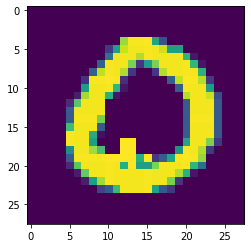

In [119]:
plt.imshow(tf.reshape(adversarials[0][sample], (28,28)))
print(np.argmax(model_to_attack(adversarials[0][sample])))
print('label = ',y_to_attack[sample].numpy())

0

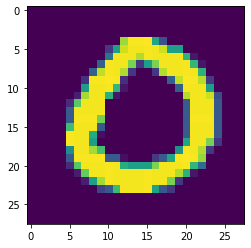

In [118]:
plt.imshow(tf.reshape(x_to_attack[sample], (28,28)))
np.argmax(model_to_attack(x_to_attack[sample]))

In [95]:
#lr 1e7
sum(dists)/1000

14.261

In [98]:
#lr 1e10
sum(dists)/1000

14.258

In [100]:
#lr 1e15
sum(dists)/1000

15.779

In [103]:
#lr 1e3 mit l0 dist datasetattack
sum(dists)/1000

18.635

In [105]:
#lr 1e3
sum(dists)/1000

16.218

In [103]:
#lr 1e7 mit l0 dist datasetattack
sum(dists)/1000

18.635

In [107]:
#lr 1e7 mit l2 dist datasetattack
sum(dists)/1000

15.352

In [110]:
#lr 1e7 mit 5000 steps 50 binary steps
sum(dists)/1000

15.402

In [112]:
#lr 1e5 mit 5000 steps 50 binary steps
sum(dists)/1000

15.19

In [114]:
#lr 1e3 mit 5000 steps 50 binary steps
sum(dists)/1000

14.014

In [121]:
#lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

15.332

In [123]:
#lr num decay=5, lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

16.215

In [125]:
#lr num decay=40, lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

11.85

In [127]:
#lr num decay=40, lr 1e7 mit 5000 steps 10 binary steps
sum(dists)/1000

13.066

In [12]:
#lr num decay=30, lr 1e3 mit 1000 steps 10 binary steps
sum(dists)/1000

9.63

In [14]:
#lr num decay=30, lr 1e2 mit 1000 steps 10 binary steps
sum(dists)/1000

10.005

In [16]:
#lr num decay=20, lr 1e4 mit 1000 steps 10 binary steps
sum(dists)/1000

8.635

In [18]:
#lr num decay=20, lr 1e4 mit 1000 steps 10 binary steps
sum(dists)/1000

8.667

In [20]:
#lr num decay=20, lr 1e4 mit 1000 steps 20 binary steps
sum(dists)/1000

8.0

In [22]:
#lr num decay=20, lr 1e5 mit 2000 steps 10 binary steps
sum(dists)/1000

8.125

In [24]:
#lr num decay=20, lr 1e5 mit 500 steps 30 binary steps
sum(dists)/1000

8.041

In [27]:
#lr num decay=20, lr 1e6 mit 500 steps 30 binary steps
sum(dists)/1000

7.655

In [29]:
#lr num decay=20, lr 1e7 mit 500 steps 30 binary steps
sum(dists)/1000

7.211

In [44]:
#lr num decay=40, lr 1e6 mit 500 steps 30 binary steps
sum(dists)/1000

8.208

In [31]:
#lr num decay=20, lr 1e7 mit 500 steps 40 binary steps
sum(dists)/1000

12.12

In [45]:
success

<tf.Tensor: shape=(1, 1000), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, 